In [1]:
# setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from statannot import add_stat_annotation
from itertools import count
import os, mne

# calculate the Cohen's d between two samples
from numpy.random import randn
from numpy.random import seed
from numpy import mean
from numpy import var
from math import sqrt

# function to calculate Cohen's d for independent samples
def cohend(d1, d2):
    n1, n2 = len(d1), len(d2)
    s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
    s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    u1, u2 = mean(d1), mean(d2)
    return (u1 - u2) / s

    
class EEGChannel:
    '''innitilized by info chs'''
    _ids = count(0)
    
    def __init__(self, x, y,name="None"):
        self.id = next(self._ids)
        self.x = x
        self.y = y
        self.name = name
    def plot(self,ax,center):
        circle = plt.Circle((center[0]+self.x, center[1]+self.y), radius=0.2,fill = True)
        ax.add_patch(circle)
        label = ax.annotate(self.name, xy=(center[0]+self.x, center[1]+self.y), fontsize=18, ha="center")
        return ax 
    
class EMGChannel:
    '''with polar coordinates as inputs'''
    
    _ids = count(0)
    
    def __init__(self, rho, phi,name="None"):
        self.id = next(self._ids)
        self.rho = rho
        self.phi = phi
        self.name = name
        self.x = rho * np.cos(phi/180*np.pi)
        self.y = rho * np.sin(phi/180*np.pi)
        
    def plot(self,ax,center):
        circle = plt.Circle((center[0]+self.x, center[1]+self.y), radius=0.2,fill = True)
        ax.add_patch(circle)
        label = ax.annotate(self.name, xy=(center[0]+self.x, center[1]+self.y), fontsize=18, ha="center")
        return ax        
    
    def cartesianC(self):
        return(self.x, self.y)
    
    def polarC(self):
        return(self.rho,self.phi)

    
chs_list_preImage_lParetic = ['Fp1','AF3','F3','F7','FC1','FC5','C3','T7','CP1','CP5','P3','P7','PO3','O1',
                              'Fz','Cz','Pz','Oz',
                   'Fp2','AF4','F4','F8','FC2','FC6','C4','T8','CP2','CP6','P4','P8','PO4','O2',
                             'emg1','emg2','emg3','emg4','emg5','emg6','emg7','emg8']

chs_list_preImage_rParetic = ['Fp2','AF4','F4','F8','FC2','FC6','C4','T8','CP2','CP6','P4','P8','PO4','O2',
                              'Fz','Cz','Pz','Oz',
                   'Fp1','AF3','F3','F7','FC1','FC5','C3','T7','CP1','CP5','P3','P7','PO3','O1',
                             'emg1','emg2','emg3','emg4','emg5','emg6','emg7','emg8']

chs_list_image = ['Fp1i','AF3i','F3i','F7i','FC1i','FC5i','C3i','T7i','CP1i','CP5i','P3i','P7i','PO3i','O1i',
                      'Fz','Cz','Pz','Oz',
                       'Fp1c','AF3c','F3c','F7c','FC1c','FC5c','C3c','T8c','CP1c','CP5c','P3c','P7c','PO3c','O1c',
                      'emg1','emg2','emg3','emg4','emg5','emg6','emg7','emg8']


################## Dataset Loading ##################
data_dir = 'D:/Data/MultiEEGEMG_stroke/'
strokeVsHealthy_results_dir = os.path.join(data_dir,'results','strokeVsHealthy')
if not os.path.exists(strokeVsHealthy_results_dir):
    os.makedirs(strokeVsHealthy_results_dir)
# data_dir = 'E:/important file/Projects/CM-graph/sample_data' #PC dir
subj_idx = '15'
contraction_type = 'iMC'
session_idx = 's01'
subjInfo_fName = os.path.join(data_dir,'subj_info.txt')
subjInfo = pd.read_csv(subjInfo_fName, skiprows=0,
                       sep = ',',engine = 'python')
affected_h = subjInfo[subjInfo['subj_idx']==int(subj_idx)]['affected_h'].values[0]

results_dir = os.path.join(data_dir,'subj'+subj_idx,'results')
if not os.path.exists(results_dir):
    os.makedirs(results_dir)

epochs_hybrid_dir = os.path.join(data_dir,'subj'+subj_idx,'epochs_hybrid')
epochs_hybrid_fName = os.path.join(data_dir,'subj'+subj_idx,'epochs_hybrid',
                                      'subj'+subj_idx+'_'+contraction_type+'_'+session_idx+'_hybrid_epo.fif')
epochs_hybrid = mne.read_epochs(epochs_hybrid_fName,preload=True)

EMGs=[EMGChannel(2,150,'emg1'),EMGChannel(2,170,'emg2'),EMGChannel(2, 240,'emg3'),EMGChannel(2,350,'emg4'),
      EMGChannel(2, 80,'emg5'),EMGChannel(4,140,'emg6'),EMGChannel(4, 310,'emg7'),
      EMGChannel(4,90,'emg8')]

EEGs = [EEGChannel(x=epochs_hybrid.info['chs'][epochs_hybrid.info['ch_names'].index(chs_list_preImage_rParetic[chs_list_image.index(ch)])]['loc'][0]*50,
           y=epochs_hybrid.info['chs'][epochs_hybrid.info['ch_names'].index(chs_list_preImage_rParetic[chs_list_image.index(ch)])]['loc'][1]*50,
           name=ch) for ch in chs_list_image[:32]]  

Reading D:/Data/MultiEEGEMG_stroke/subj15\epochs_hybrid\subj15_iMC_s01_hybrid_epo.fif ...
    Found the data of interest:
        t =       0.00 ...    2000.00 ms
        0 CTF compensation matrices available
45 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


# Multivariate analysis - correlation between CMN and stroke scale
## Optional: tendency (e.g. FMA-node_connectivity_wholeG/wiener_idx_weight, density-wiener_idx)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002555F108>,
      dtype=object)

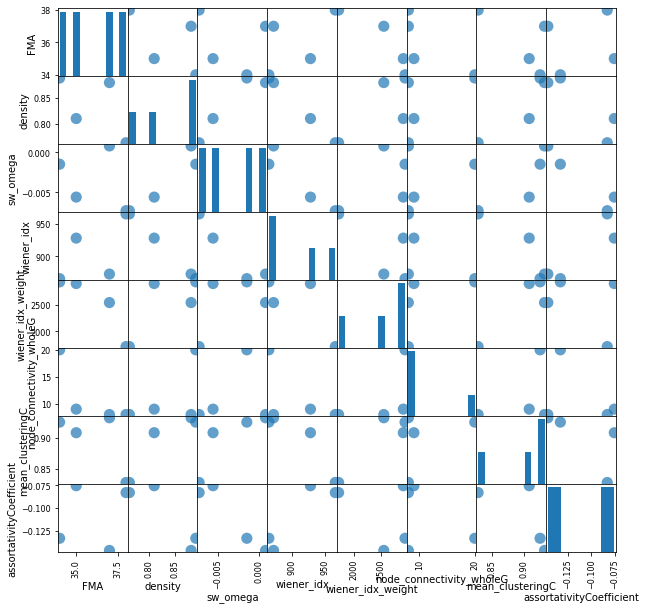

In [39]:
dataset_fName = r"D:\Data\MultiEEGEMG_stroke\temp\corr_recovery_stat.xlsx"
df = pd.read_excel(dataset_fName)
pd.plotting.scatter_matrix(df.loc[:,['FMA','density','sw_omega','wiener_idx','wiener_idx_weight',
                                     'node_connectivity_wholeG','mean_clusteringC','assortativityCoefficient']],
                           figsize = (10,10), alpha =0.7, s=500)

# Between group analysis
- t-test, regression for correlative analysis
- BoxPlot
## step 1: Dataframe engineering
### step 1-1: dataframe generation

In [2]:
import os
healthy_subj = ['14','15','17','18','19','21']
# healthy_subj = ['14','15','17','18','19','21']
stroke_subj = ['35','34','32','30','25','24','20','10']
# data_dir = 'E:/important file/Projects/CM-graph/sample_data' #PC dir
global_results_dir = os.path.join(data_dir,'results')
contraction_type = 'iMC'
session_idx = 's01'
if not os.path.exists(global_results_dir):
    os.makedirs(global_results_dir)
    
subjInfo_fName = os.path.join(data_dir,'subj_info.txt')
subjInfo = pd.read_csv(subjInfo_fName, skiprows=0,
                       sep = ',',engine = 'python')    
df_healthy2concat=[]
for subj_idx in healthy_subj:
    df_g_fName = os.path.join(data_dir,'subj'+subj_idx,'temp',
                            'subj'+subj_idx+contraction_type+'_'+session_idx+'_gProperties.xlsx')
    df_g = pd.read_excel(df_g_fName)
    df_info = subjInfo[subjInfo['subj_idx']==int(subj_idx)]
    df_g.reset_index(drop=True,inplace=True)
    df_info.reset_index(drop=True,inplace=True)
    df = pd.concat([df_info,df_g],axis=1)
    df_healthy2concat.append(df)
df_healthy = pd.concat(df_healthy2concat,sort=False)    
group = ['healthy']*df_healthy.shape[0]
df_healthy['group'] = group
    
df_stroke2concat=[]
for subj_idx in stroke_subj:
    df_g_fName = os.path.join(data_dir,'subj'+subj_idx,'temp',
                            'subj'+subj_idx+contraction_type+'_'+session_idx+'_gProperties.xlsx')
    df_g = pd.read_excel(df_g_fName)
    df_info = subjInfo[subjInfo['subj_idx']==int(subj_idx)]
    df_g.reset_index(drop=True,inplace=True)
    df_info.reset_index(drop=True,inplace=True)
    df = pd.concat([df_info,df_g],axis=1)
    df_stroke2concat.append(df)    
df_stroke = pd.concat(df_stroke2concat,sort=False)
group = ['stroke']*df_stroke.shape[0]
df_stroke['group'] = group

df_betweenGroup = pd.concat([df_stroke,df_healthy],sort=False)

In [14]:
# visualize cols
df_betweenGroup.loc[:,['subj_idx','FMA','F7c_cost_ecc_weight']]

,subj_idx,FMA,F7c_cost_ecc_weight
0,35,40.0,0.352114
0,34,62.0,0.349831
0,32,49.0,0.366494
0,30,59.0,0.263311
0,25,38.0,0.411197
0,24,37.0,0.513804
0,20,35.0,0.536022
0,10,34.0,0.392451
0,14,NaN,0.453129
0,15,NaN,0.693122


## step 2: significant test (2-sided t-/u-test) and effect size
### step 2-1: global properties 

In [3]:
# redundancy 
#'cost_average_shortestP_length_weight', 'cost_average_shortestP_length','average_shortestPathLength_weight',
list_gProperties =['diameter', 'density', 's_metric', 'transitivity', 'local_efficiency', 'global_efficiency',
                   'sw_omega', 'node_connectivity_wholeG',
                   'wiener_idx', 'wiener_idx_weight', 'size','size_weight','assortativityCoefficient',
                   'cost_size_weight', 'cost_wiener_index_weight',
                   'mean_clusteringC', 'g_cliqueNumber', 'g_numberOfMaxClique','non_randomness','relative_nonRandomness',
                   'wiener_idx_minST_weight', 'wiener_idx_maxST_weight','size_minST_weight','size_maxST_weight'
                  ] 
for gProperty in list_gProperties:    
    t_stat,pvalue = scipy.stats.ttest_ind((df_betweenGroup[df_betweenGroup['group']=='healthy'])[gProperty],
                          (df_betweenGroup[df_betweenGroup['group']=='stroke'])[gProperty], equal_var=False)
    cohen_s_d = round(cohend((df_betweenGroup[df_betweenGroup['group']=='healthy'])[gProperty],
                 (df_betweenGroup[df_betweenGroup['group']=='stroke'])[gProperty]),2)
#     p_eigenvectorC[gProperty.split('_')[0]]=pvalue
    print(gProperty + ": pvalue = {}, cohen's d = {}, t_stat = {}".format(round(pvalue,2),cohen_s_d,round(t_stat,2)))
    

diameter: pvalue = 0.08, cohen's d = 1.41, t_stat = 2.24
density: pvalue = 0.03, cohen's d = -1.53, t_stat = -2.68
s_metric: pvalue = 0.03, cohen's d = -1.37, t_stat = -2.47
transitivity: pvalue = 0.69, cohen's d = -0.24, t_stat = -0.41
local_efficiency: pvalue = 0.07, cohen's d = -1.26, t_stat = -2.13
global_efficiency: pvalue = 0.03, cohen's d = -1.54, t_stat = -2.69
sw_omega: pvalue = 0.35, cohen's d = -0.46, t_stat = -1.0
node_connectivity_wholeG: pvalue = 0.01, cohen's d = -1.6, t_stat = -3.01
wiener_idx: pvalue = 0.03, cohen's d = 1.55, t_stat = 2.66
wiener_idx_weight: pvalue = 0.14, cohen's d = 0.88, t_stat = 1.59
size: pvalue = 0.03, cohen's d = -1.53, t_stat = -2.68
size_weight: pvalue = 0.41, cohen's d = 0.52, t_stat = 0.88
assortativityCoefficient: pvalue = 0.16, cohen's d = 1.02, t_stat = 1.63
cost_size_weight: pvalue = 0.03, cohen's d = -1.21, t_stat = -2.44
cost_wiener_index_weight: pvalue = 0.38, cohen's d = 0.57, t_stat = 0.95
mean_clusteringC: pvalue = 0.09, cohen's d 

In [4]:
# small-worldness - absoluteValue
t_stat,pvalue = scipy.stats.ttest_ind(np.abs((df_betweenGroup[df_betweenGroup['group']=='healthy'])['sw_omega']),
                          np.abs((df_betweenGroup[df_betweenGroup['group']=='stroke'])['sw_omega']), equal_var=False)
cohen_s_d = round(cohend(np.abs((df_betweenGroup[df_betweenGroup['group']=='healthy'])['sw_omega']),
                 np.abs((df_betweenGroup[df_betweenGroup['group']=='stroke'])['sw_omega'])),2)
print("abs(sw_omega): pvalue = {}, cohen's d = {}, t_stat = {}".format(round(pvalue,2),cohen_s_d,round(t_stat,2)))
    

abs(sw_omega): pvalue = 0.35, cohen's d = 0.46, t_stat = 1.0


## step 2-4: regression

In [5]:
import statsmodels.api as sm
list_gProperties =['diameter', 'density', 's_metric', 'transitivity', 'local_efficiency', 'global_efficiency',
                   'sw_omega', 'node_connectivity_wholeG',
                   'wiener_idx', 'wiener_idx_weight', 'size','size_weight','assortativityCoefficient',
                   'cost_size_weight', 'cost_wiener_index_weight',
                   'mean_clusteringC', 'g_cliqueNumber', 'g_numberOfMaxClique','non_randomness','relative_nonRandomness',
                   'wiener_idx_minST_weight', 'wiener_idx_maxST_weight','size_minST_weight','size_maxST_weight'
                  ] 

for gProperty in list_gProperties:
    X = df_stroke[gProperty]
    Y = df_stroke['FMA']
    X=sm.add_constant(X)
    model = sm.OLS(Y,X).fit()
    predictions = model.predict(X)
    if model.f_pvalue<0.1:
        print(gProperty)
        print(model.summary())
        print('\n')

node_connectivity_wholeG
                            OLS Regression Results                            
Dep. Variable:                    FMA   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     4.527
Date:                Thu, 28 Jan 2021   Prob (F-statistic):             0.0775
Time:                        10:30:16   Log-Likelihood:                -27.792
No. Observations:                   8   AIC:                             59.58
Df Residuals:                       6   BIC:                             59.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

d:\software\1python3.75amd64\envs\eegemg\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()
d:\software\1python3.75amd64\envs\eegemg\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


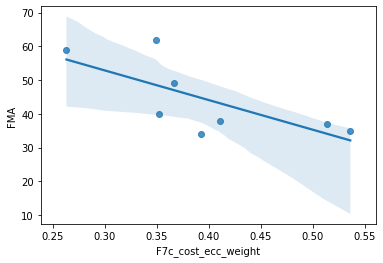

In [13]:
import seaborn as sns
X = df_stroke['F7c_cost_ecc_weight']
Y = df_stroke['FMA']
ax = sns.regplot(x=X, y=Y)

# save fig
# fName = os.path.join(strokeVsHealthy_results_dir,'nodeConReg.eps')
# plt.savefig(fName)

### step 2-2: local properties: degreeC

In [7]:
p_degreeC = {key:None for key in chs_list_image}
list_gProperties =['Fp1i_degree_centrality', 'AF3i_degree_centrality', 'F3i_degree_centrality',
                   'F7i_degree_centrality', 'FC1i_degree_centrality', 'FC5i_degree_centrality',
                   'C3i_degree_centrality', 'T7i_degree_centrality', 'CP1i_degree_centrality',
                   'CP5i_degree_centrality', 'P3i_degree_centrality', 'P7i_degree_centrality',
                   'PO3i_degree_centrality', 'O1i_degree_centrality', 'Fz_degree_centrality',
                   'Cz_degree_centrality', 'Pz_degree_centrality', 'Oz_degree_centrality',
                   'Fp1c_degree_centrality', 'AF3c_degree_centrality', 'F3c_degree_centrality', 
                   'F7c_degree_centrality', 'FC1c_degree_centrality', 'FC5c_degree_centrality', 
                   'C3c_degree_centrality', 'T8c_degree_centrality', 'CP1c_degree_centrality', 
                   'CP5c_degree_centrality', 'P3c_degree_centrality', 'P7c_degree_centrality',
                   'PO3c_degree_centrality', 'O1c_degree_centrality','emg1_degree_centrality',
                   'emg2_degree_centrality','emg3_degree_centrality','emg4_degree_centrality',
                   'emg5_degree_centrality','emg6_degree_centrality','emg7_degree_centrality',
                   'emg8_degree_centrality'] 
for gProperty in list_gProperties:    
    t_stat,pvalue = scipy.stats.ttest_ind((df_betweenGroup[df_betweenGroup['group']=='stroke'])[gProperty],
                          (df_betweenGroup[df_betweenGroup['group']=='healthy'])[gProperty], equal_var=False)
    cohen_s_d = round(cohend((df_betweenGroup[df_betweenGroup['group']=='stroke'])[gProperty],
                 (df_betweenGroup[df_betweenGroup['group']=='healthy'])[gProperty]),2)
    p_degreeC[gProperty.split('_')[0]]=pvalue
    print(gProperty + ": pvalue = {}, cohen's d = {}, t_stat = {}".format(round(pvalue,2),cohen_s_d,round(t_stat,2)))
    

Fp1i_degree_centrality: pvalue = 0.19, cohen's d = 0.89, t_stat = 1.46
AF3i_degree_centrality: pvalue = 0.41, cohen's d = 0.46, t_stat = 0.85
F3i_degree_centrality: pvalue = 0.2, cohen's d = 0.84, t_stat = 1.41
F7i_degree_centrality: pvalue = 0.3, cohen's d = 0.65, t_stat = 1.12
FC1i_degree_centrality: pvalue = 0.08, cohen's d = 1.23, t_stat = 2.08
FC5i_degree_centrality: pvalue = 0.07, cohen's d = 1.29, t_stat = 2.16
C3i_degree_centrality: pvalue = 0.17, cohen's d = 0.79, t_stat = 1.47
T7i_degree_centrality: pvalue = 0.08, cohen's d = 1.07, t_stat = 1.93
CP1i_degree_centrality: pvalue = 0.03, cohen's d = 1.75, t_stat = 2.89
CP5i_degree_centrality: pvalue = 0.01, cohen's d = 2.14, t_stat = 3.6
P3i_degree_centrality: pvalue = 0.02, cohen's d = 1.87, t_stat = 3.11
P7i_degree_centrality: pvalue = 0.85, cohen's d = 0.09, t_stat = 0.2
PO3i_degree_centrality: pvalue = 0.04, cohen's d = 1.35, t_stat = 2.4
O1i_degree_centrality: pvalue = 0.01, cohen's d = 2.13, t_stat = 3.71
Fz_degree_centrali

Text(10, 10.8, '<0.001')

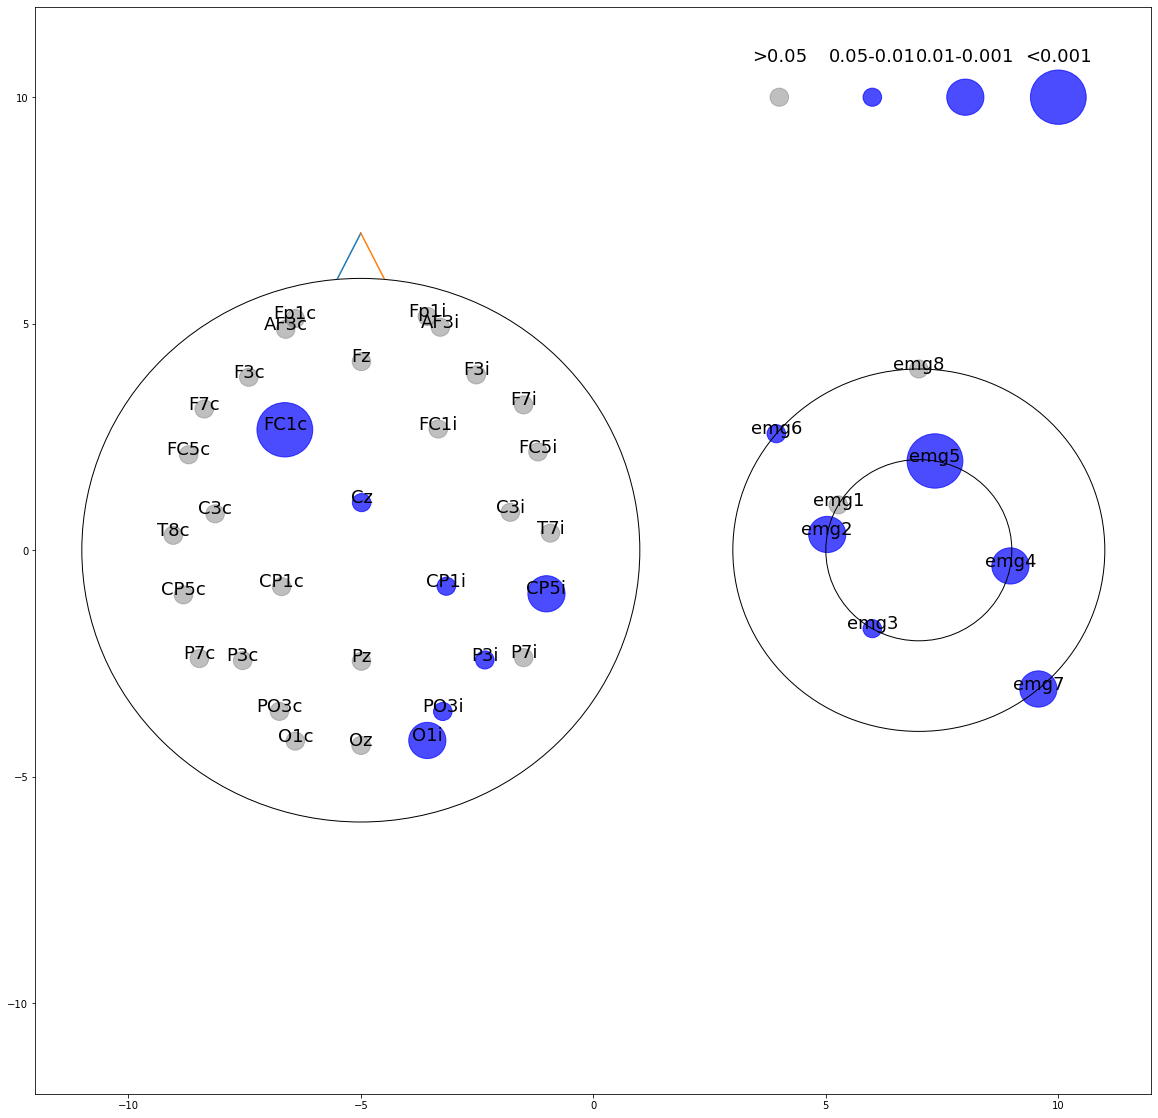

In [8]:
#visualisation
pvalue_levels = [0.05,0.01,0.001]
def radiusBasedOnP (pvalue, defaultR=0.2):
    radius = None
    for level_idx in range(len(pvalue_levels)):
        if pvalue <= pvalue_levels[level_idx]:
            if radius == None:
                radius = defaultR
            else: 
                radius += defaultR
        else:
            return radius
    return radius


fig,ax = plt.subplots(figsize=(20, 20))
ax = plt.gca()
# EEG
center=[-5,0]
radius=6
circle = plt.Circle((center[0],center[1]),radius,fill = False)
ax.plot([center[0]-0.5,center[0]],[radius+center[1],radius+center[1]+1])
ax.plot([center[0]+0.5,center[0]],[radius+center[1],radius+center[1]+1])
ax.add_artist(circle)
#EEG_chs
for EEG in EEGs:
    radius = radiusBasedOnP(p_degreeC[EEG.name])
    if radius == None:
        circle = plt.Circle((center[0]+EEG.x, center[1]+EEG.y), radius=0.2,fill = True, color = 'grey',alpha=0.5)
    else:
        circle = plt.Circle((center[0]+EEG.x, center[1]+EEG.y), radius=radius,fill = True, color = 'blue',alpha=0.7)
    ax.add_patch(circle)
    label = ax.annotate(EEG.name, xy=(center[0]+EEG.x, center[1]+EEG.y), fontsize=18, color ='black', ha="center")

#EMG
center=[7,0]
for i in range(2):
    circle = plt.Circle((center[0],center[1]), 2*(i+1),fill = False)
    ax.add_artist(circle)
#EMG_chs
for EMG in EMGs:
    radius = radiusBasedOnP(p_degreeC[EMG.name])
    if radius == None:
        circle = plt.Circle((center[0]+EMG.x, center[1]+EMG.y), radius=0.2,fill = True, color = 'grey',alpha=0.5)
    else:
        circle = plt.Circle((center[0]+EMG.x, center[1]+EMG.y), radius=radius,fill = True, color = 'blue',alpha=0.7)
    ax.add_patch(circle)
    label = ax.annotate(EMG.name, xy=(center[0]+EMG.x, center[1]+EMG.y), fontsize=18, color ='black', ha="center")
    
plt.xlim(-12,12)
plt.ylim(-12,12)


circle = plt.Circle((4,10), radius=0.2,fill = True, color = 'grey',alpha=0.5)
ax.add_patch(circle)
ax.annotate('>'+str(pvalue_levels[0]), xy=(4,10.8), fontsize=18, color ='black', ha="center")
increment = 0
for pvalue_level in pvalue_levels[1:]:
    increment+=1
    circle = plt.Circle((4+increment*2,10), radius=0.2*increment,fill = True, color = 'blue',alpha=0.7)
    ax.add_patch(circle)
    ax.annotate(str(pvalue_levels[increment-1])+'-'+str(pvalue_levels[increment]),
                xy=(4+increment*2,10.8), fontsize=18, color ='black', ha="center")
    
increment+=1    
circle = plt.Circle((4+2*increment,10), radius=0.2*increment,fill = True, color = 'blue',alpha=0.7)
ax.add_patch(circle)
ax.annotate('<'+str(pvalue_levels[-1]), xy=(4+2*increment,10.8), 
            fontsize=18, color ='black', ha="center")

# save fig
# fName = os.path.join(strokeVsHealthy_results_dir,'degreeC_topo.eps')
# plt.savefig(fName)

In [29]:
#regression
import statsmodels.api as sm
list_gProperties =['Fp1i_degree_centrality', 'AF3i_degree_centrality', 'F3i_degree_centrality',
                   'F7i_degree_centrality', 'FC1i_degree_centrality', 'FC5i_degree_centrality',
                   'C3i_degree_centrality', 'T7i_degree_centrality', 'CP1i_degree_centrality',
                   'CP5i_degree_centrality', 'P3i_degree_centrality', 'P7i_degree_centrality',
                   'PO3i_degree_centrality', 'O1i_degree_centrality', 'Fz_degree_centrality',
                   'Cz_degree_centrality', 'Pz_degree_centrality', 'Oz_degree_centrality',
                   'Fp1c_degree_centrality', 'AF3c_degree_centrality', 'F3c_degree_centrality', 
                   'F7c_degree_centrality', 'FC1c_degree_centrality', 'FC5c_degree_centrality', 
                   'C3c_degree_centrality', 'T8c_degree_centrality', 'CP1c_degree_centrality', 
                   'CP5c_degree_centrality', 'P3c_degree_centrality', 'P7c_degree_centrality',
                   'PO3c_degree_centrality', 'O1c_degree_centrality','emg1_degree_centrality',
                   'emg2_degree_centrality','emg3_degree_centrality','emg4_degree_centrality',
                   'emg5_degree_centrality','emg6_degree_centrality','emg7_degree_centrality',
                   'emg8_degree_centrality'] 

for gProperty in list_gProperties:
    X = df_stroke[gProperty]
    Y = df_stroke['FMA']
    X=sm.add_constant(X)
    model = sm.OLS(Y,X).fit()
    predictions = model.predict(X)
    if model.f_pvalue<0.05:
        print(gProperty)
        print(model.summary())
        print('\n')

P3i_degree_centrality
                            OLS Regression Results                            
Dep. Variable:                    FMA   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     8.124
Date:                Sat, 09 Jan 2021   Prob (F-statistic):             0.0292
Time:                        21:59:24   Log-Likelihood:                -26.616
No. Observations:                   8   AIC:                             57.23
Df Residuals:                       6   BIC:                             57.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const   

d:\software\1python3.75amd64\envs\eegemg\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


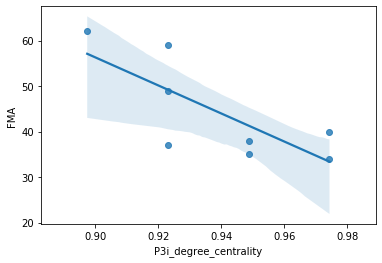

In [10]:
#visualisation
import seaborn as sns
X = df_stroke['P3i_degree_centrality']
Y = df_stroke['FMA']
ax = sns.regplot(x=X, y=Y)
# save fig
# fName = os.path.join(strokeVsHealthy_results_dir,'P3iDegreeCReg.eps')
# plt.savefig(fName)

## surrogate model

In [11]:
X = df_stroke[['P3i_degree_centrality','node_connectivity_wholeG']]
Y = df_stroke['FMA']
X=sm.add_constant(X)
model = sm.OLS(Y,X).fit()
predictions = model.predict(X)
print(model.summary())
print('\n')
print(predictions)
print(Y)

emg8_degree_centrality
                            OLS Regression Results                            
Dep. Variable:                    FMA   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     26.07
Date:                Sat, 09 Jan 2021   Prob (F-statistic):            0.00226
Time:                        21:48:51   Log-Likelihood:                -20.296
No. Observations:                   8   AIC:                             46.59
Df Residuals:                       5   BIC:                             46.83
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
c

d:\software\1python3.75amd64\envs\eegemg\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


### step 2-3: local properties:_cost_ecc_weight

In [15]:
p_cost_ecc_weight = {key:None for key in chs_list_image}
list_gProperties =['Fp1i_cost_ecc_weight', 'AF3i_cost_ecc_weight', 'F3i_cost_ecc_weight',
                   'F7i_cost_ecc_weight', 'FC1i_cost_ecc_weight', 'FC5i_cost_ecc_weight',
                   'C3i_cost_ecc_weight', 'T7i_cost_ecc_weight', 'CP1i_cost_ecc_weight',
                   'CP5i_cost_ecc_weight', 'P3i_cost_ecc_weight', 'P7i_cost_ecc_weight',
                   'PO3i_cost_ecc_weight', 'O1i_cost_ecc_weight', 'Fz_cost_ecc_weight',
                   'Cz_cost_ecc_weight', 'Pz_cost_ecc_weight', 'Oz_cost_ecc_weight',
                   'Fp1c_cost_ecc_weight', 'AF3c_cost_ecc_weight', 'F3c_cost_ecc_weight', 
                   'F7c_cost_ecc_weight', 'FC1c_cost_ecc_weight', 'FC5c_cost_ecc_weight', 
                   'C3c_cost_ecc_weight', 'T8c_cost_ecc_weight', 'CP1c_cost_ecc_weight', 
                   'CP5c_cost_ecc_weight', 'P3c_cost_ecc_weight', 'P7c_cost_ecc_weight',
                   'PO3c_cost_ecc_weight', 'O1c_cost_ecc_weight','emg1_cost_ecc_weight',
                   'emg2_cost_ecc_weight','emg3_cost_ecc_weight','emg4_cost_ecc_weight',
                   'emg5_cost_ecc_weight','emg6_cost_ecc_weight','emg7_cost_ecc_weight',
                   'emg8_cost_ecc_weight'] 
for gProperty in list_gProperties:    
    t_stat,pvalue = scipy.stats.ttest_ind((df_betweenGroup[df_betweenGroup['group']=='stroke'])[gProperty],
                          (df_betweenGroup[df_betweenGroup['group']=='healthy'])[gProperty], equal_var=False)
    cohen_s_d = round(cohend((df_betweenGroup[df_betweenGroup['group']=='stroke'])[gProperty],
                 (df_betweenGroup[df_betweenGroup['group']=='healthy'])[gProperty]),2)
    p_cost_ecc_weight[gProperty.split('_')[0]]=pvalue
    print(gProperty + ": pvalue = {}, cohen's d = {}, t_stat = {}".format(round(pvalue,2),cohen_s_d,round(t_stat,2)))
    

Fp1i_cost_ecc_weight: pvalue = 0.14, cohen's d = -1.1, t_stat = -1.75
AF3i_cost_ecc_weight: pvalue = 0.1, cohen's d = -1.22, t_stat = -1.95
F3i_cost_ecc_weight: pvalue = 0.1, cohen's d = -1.22, t_stat = -1.95
F7i_cost_ecc_weight: pvalue = 0.09, cohen's d = -1.29, t_stat = -2.05
FC1i_cost_ecc_weight: pvalue = 0.08, cohen's d = -1.35, t_stat = -2.15
FC5i_cost_ecc_weight: pvalue = 0.1, cohen's d = -1.22, t_stat = -1.97
C3i_cost_ecc_weight: pvalue = 0.09, cohen's d = -1.27, t_stat = -2.04
T7i_cost_ecc_weight: pvalue = 0.1, cohen's d = -1.22, t_stat = -1.96
CP1i_cost_ecc_weight: pvalue = 0.08, cohen's d = -1.33, t_stat = -2.13
CP5i_cost_ecc_weight: pvalue = 0.11, cohen's d = -1.19, t_stat = -1.91
P3i_cost_ecc_weight: pvalue = 0.11, cohen's d = -1.19, t_stat = -1.91
P7i_cost_ecc_weight: pvalue = 0.1, cohen's d = -1.21, t_stat = -1.96
PO3i_cost_ecc_weight: pvalue = 0.07, cohen's d = -1.37, t_stat = -2.21
O1i_cost_ecc_weight: pvalue = 0.07, cohen's d = -1.39, t_stat = -2.23
Fz_cost_ecc_weight:

Text(10, 10.8, '<0.001')

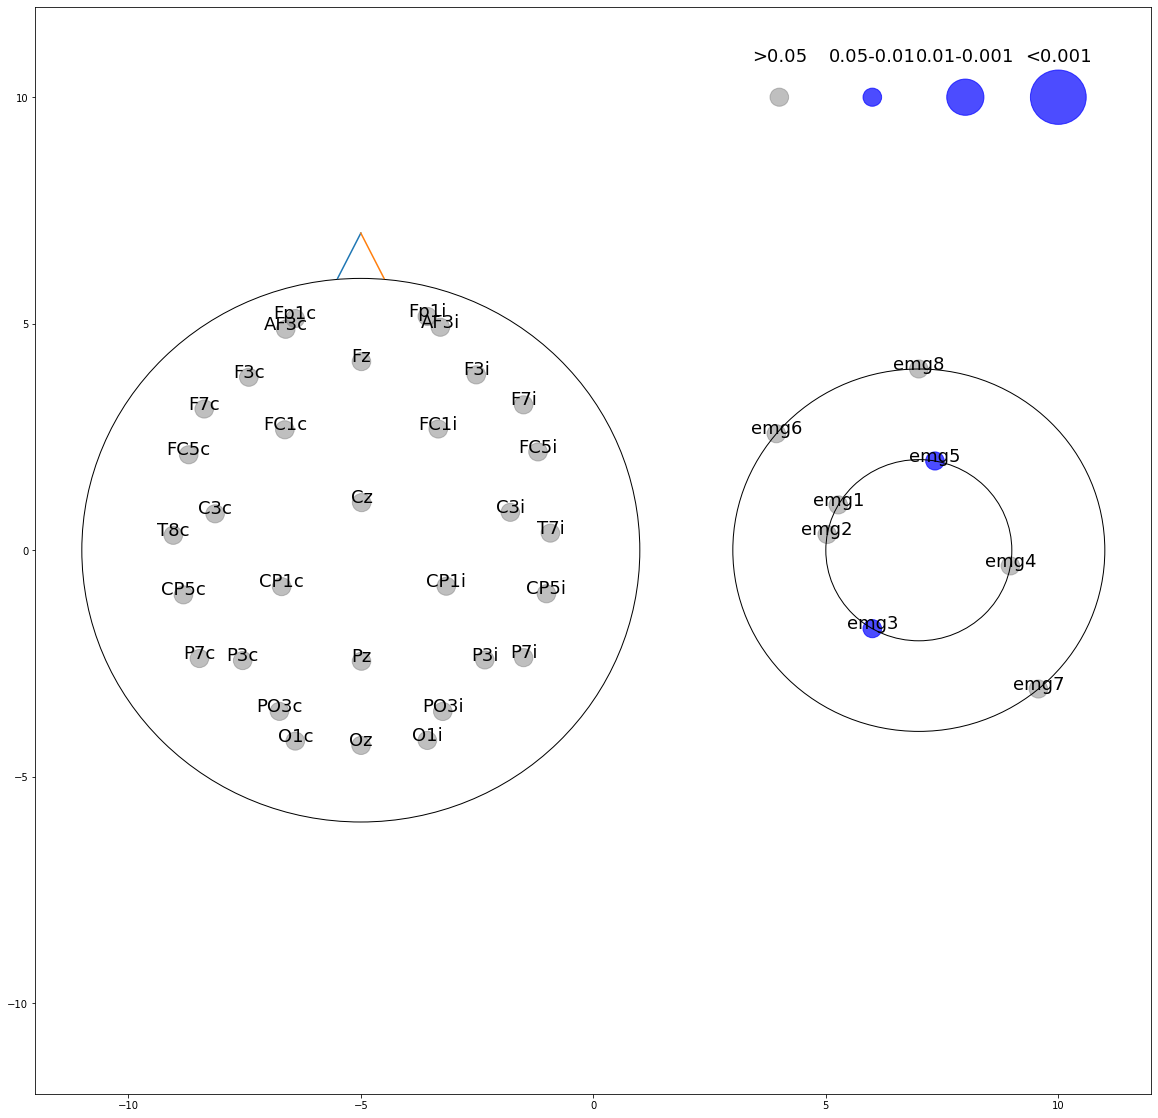

In [25]:
#visualisation
pvalue_levels = [0.05,0.01,0.001]
def radiusBasedOnP (pvalue, defaultR=0.2):
    radius = None
    for level_idx in range(len(pvalue_levels)):
        if pvalue <= pvalue_levels[level_idx]:
            if radius == None:
                radius = defaultR
            else: 
                radius += defaultR
        else:
            return radius
    return radius


fig,ax = plt.subplots(figsize=(20, 20))
ax = plt.gca()
# EEG
center=[-5,0]
radius=6
circle = plt.Circle((center[0],center[1]),radius,fill = False)
ax.plot([center[0]-0.5,center[0]],[radius+center[1],radius+center[1]+1])
ax.plot([center[0]+0.5,center[0]],[radius+center[1],radius+center[1]+1])
ax.add_artist(circle)
#EEG_chs
for EEG in EEGs:
    radius = radiusBasedOnP(p_cost_ecc_weight[EEG.name])
    if radius == None:
        circle = plt.Circle((center[0]+EEG.x, center[1]+EEG.y), radius=0.2,fill = True, color = 'grey',alpha=0.5)
    else:
        circle = plt.Circle((center[0]+EEG.x, center[1]+EEG.y), radius=radius,fill = True, color = 'blue',alpha=0.7)
    ax.add_patch(circle)
    label = ax.annotate(EEG.name, xy=(center[0]+EEG.x, center[1]+EEG.y), fontsize=18, color ='black', ha="center")

#EMG
center=[7,0]
for i in range(2):
    circle = plt.Circle((center[0],center[1]), 2*(i+1),fill = False)
    ax.add_artist(circle)
#EMG_chs
for EMG in EMGs:
    radius = radiusBasedOnP(p_cost_ecc_weight[EMG.name])
    if radius == None:
        circle = plt.Circle((center[0]+EMG.x, center[1]+EMG.y), radius=0.2,fill = True, color = 'grey',alpha=0.5)
    else:
        circle = plt.Circle((center[0]+EMG.x, center[1]+EMG.y), radius=radius,fill = True, color = 'blue',alpha=0.7)
    ax.add_patch(circle)
    label = ax.annotate(EMG.name, xy=(center[0]+EMG.x, center[1]+EMG.y), fontsize=18, color ='black', ha="center")
    
plt.xlim(-12,12)
plt.ylim(-12,12)


circle = plt.Circle((4,10), radius=0.2,fill = True, color = 'grey',alpha=0.5)
ax.add_patch(circle)
ax.annotate('>'+str(pvalue_levels[0]), xy=(4,10.8), fontsize=18, color ='black', ha="center")
increment = 0
for pvalue_level in pvalue_levels[1:]:
    increment+=1
    circle = plt.Circle((4+increment*2,10), radius=0.2*increment,fill = True, color = 'blue',alpha=0.7)
    ax.add_patch(circle)
    ax.annotate(str(pvalue_levels[increment-1])+'-'+str(pvalue_levels[increment]),
                xy=(4+increment*2,10.8), fontsize=18, color ='black', ha="center")
    
increment+=1    
circle = plt.Circle((4+2*increment,10), radius=0.2*increment,fill = True, color = 'blue',alpha=0.7)
ax.add_patch(circle)
ax.annotate('<'+str(pvalue_levels[-1]), xy=(4+2*increment,10.8), 
            fontsize=18, color ='black', ha="center")

# save fig
# fName = os.path.join(strokeVsHealthy_results_dir,'cost_ecc_weight_topo.eps')
# plt.savefig(fName)

In [28]:
import statsmodels.api as sm
list_gProperties =['Fp1i_cost_ecc_weight', 'AF3i_cost_ecc_weight', 'F3i_cost_ecc_weight',
                   'F7i_cost_ecc_weight', 'FC1i_cost_ecc_weight', 'FC5i_cost_ecc_weight',
                   'C3i_cost_ecc_weight', 'T7i_cost_ecc_weight', 'CP1i_cost_ecc_weight',
                   'CP5i_cost_ecc_weight', 'P3i_cost_ecc_weight', 'P7i_cost_ecc_weight',
                   'PO3i_cost_ecc_weight', 'O1i_cost_ecc_weight', 'Fz_cost_ecc_weight',
                   'Cz_cost_ecc_weight', 'Pz_cost_ecc_weight', 'Oz_cost_ecc_weight',
                   'Fp1c_cost_ecc_weight', 'AF3c_cost_ecc_weight', 'F3c_cost_ecc_weight', 
                   'F7c_cost_ecc_weight', 'FC1c_cost_ecc_weight', 'FC5c_cost_ecc_weight', 
                   'C3c_cost_ecc_weight', 'T8c_cost_ecc_weight', 'CP1c_cost_ecc_weight', 
                   'CP5c_cost_ecc_weight', 'P3c_cost_ecc_weight', 'P7c_cost_ecc_weight',
                   'PO3c_cost_ecc_weight', 'O1c_cost_ecc_weight','emg1_cost_ecc_weight',
                   'emg2_cost_ecc_weight','emg3_cost_ecc_weight','emg4_cost_ecc_weight',
                   'emg5_cost_ecc_weight','emg6_cost_ecc_weight','emg7_cost_ecc_weight',
                   'emg8_cost_ecc_weight'] 

for gProperty in list_gProperties:
    X = df_stroke[gProperty]
    Y = df_stroke['FMA']
    X=sm.add_constant(X)
    model = sm.OLS(Y,X).fit()
    predictions = model.predict(X)
    if model.f_pvalue<0.05:
        print(gProperty)
        print(model.summary())
        print('\n')

F7c_cost_ecc_weight
                            OLS Regression Results                            
Dep. Variable:                    FMA   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     6.170
Date:                Sat, 09 Jan 2021   Prob (F-statistic):             0.0476
Time:                        21:58:51   Log-Likelihood:                -27.212
No. Observations:                   8   AIC:                             58.42
Df Residuals:                       6   BIC:                             58.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const         

d:\software\1python3.75amd64\envs\eegemg\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))
d:\software\1python3.75amd64\envs\eegemg\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


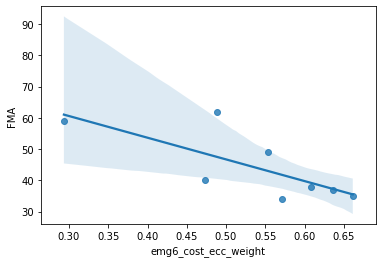

In [34]:
import seaborn as sns
X = df_stroke['emg6_cost_ecc_weight']
Y = df_stroke['FMA']
ax = sns.regplot(x=X, y=Y)
# fName = os.path.join(strokeVsHealthy_results_dir,'emg6CostEccWeight.eps')
# plt.savefig(fName)

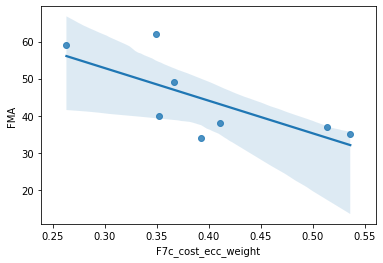

In [36]:
import seaborn as sns
X = df_stroke['F7c_cost_ecc_weight']
Y = df_stroke['FMA']
ax = sns.regplot(x=X, y=Y)
# fName = os.path.join(strokeVsHealthy_results_dir,'F7cCostEccWeight.eps')
# plt.savefig(fName)

## surrogate model

In [32]:
X = df_stroke[['P3i_degree_centrality','node_connectivity_wholeG','emg6_cost_ecc_weight','F7c_cost_ecc_weight']]
Y = df_stroke['FMA']
X=sm.add_constant(X)
model = sm.OLS(Y,X).fit()
predictions = model.predict(X)
if model.f_pvalue<0.1:
    print(model.summary())
    print('\n')
    print(predictions)
    print(Y)

emg8_degree_centrality
                            OLS Regression Results                            
Dep. Variable:                    FMA   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     17.43
Date:                Sat, 09 Jan 2021   Prob (F-statistic):             0.0204
Time:                        22:01:10   Log-Likelihood:                -17.288
No. Observations:                   8   AIC:                             44.58
Df Residuals:                       3   BIC:                             44.97
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
c

d:\software\1python3.75amd64\envs\eegemg\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


### eigenvector C

In [60]:
p_eigenvectorC = {key:None for key in chs_list_image}
list_gProperties =['Fp1i_eigenvector_centrality', 'AF3i_eigenvector_centrality', 'F3i_eigenvector_centrality',
                   'F7i_eigenvector_centrality', 'FC1i_eigenvector_centrality', 'FC5i_eigenvector_centrality',
                   'C3i_eigenvector_centrality', 'T7i_eigenvector_centrality', 'CP1i_eigenvector_centrality',
                   'CP5i_eigenvector_centrality', 'P3i_eigenvector_centrality', 'P7i_eigenvector_centrality',
                   'PO3i_eigenvector_centrality', 'O1i_eigenvector_centrality', 'Fz_eigenvector_centrality',
                   'Cz_eigenvector_centrality', 'Pz_eigenvector_centrality', 'Oz_eigenvector_centrality',
                   'Fp1c_eigenvector_centrality', 'AF3c_eigenvector_centrality', 'F3c_eigenvector_centrality', 
                   'F7c_eigenvector_centrality', 'FC1c_eigenvector_centrality', 'FC5c_eigenvector_centrality', 
                   'C3c_eigenvector_centrality', 'T8c_eigenvector_centrality', 'CP1c_eigenvector_centrality', 
                   'CP5c_eigenvector_centrality', 'P3c_eigenvector_centrality', 'P7c_eigenvector_centrality',
                   'PO3c_eigenvector_centrality', 'O1c_eigenvector_centrality','emg1_eigenvector_centrality',
                   'emg2_eigenvector_centrality','emg3_eigenvector_centrality','emg4_eigenvector_centrality',
                   'emg5_eigenvector_centrality','emg6_eigenvector_centrality','emg7_eigenvector_centrality',
                   'emg8_eigenvector_centrality'] 
for gProperty in list_gProperties:    
    t_stat,pvalue = scipy.stats.ttest_ind((df_betweenGroup[df_betweenGroup['group']=='stroke'])[gProperty],
                          (df_betweenGroup[df_betweenGroup['group']=='healthy'])[gProperty], equal_var=False)
    cohen_s_d = round(cohend((df_betweenGroup[df_betweenGroup['group']=='stroke'])[gProperty],
                 (df_betweenGroup[df_betweenGroup['group']=='healthy'])[gProperty]),2)
    p_eigenvectorC[gProperty.split('_')[0]]=pvalue
    print(gProperty + ": pvalue = {}, cohen's d = {}, t_stat = {}".format(round(pvalue,2),cohen_s_d,round(t_stat,2)))
    

Fp1i_eigenvector_centrality: pvalue = 0.74, cohen's d = 0.21, t_stat = 0.34
AF3i_eigenvector_centrality: pvalue = 0.82, cohen's d = 0.14, t_stat = 0.24
F3i_eigenvector_centrality: pvalue = 0.54, cohen's d = -0.35, t_stat = -0.65
F7i_eigenvector_centrality: pvalue = 0.43, cohen's d = 0.6, t_stat = 0.86
FC1i_eigenvector_centrality: pvalue = 0.45, cohen's d = 0.47, t_stat = 0.79
FC5i_eigenvector_centrality: pvalue = 0.1, cohen's d = 1.25, t_stat = 1.92
C3i_eigenvector_centrality: pvalue = 0.53, cohen's d = -0.48, t_stat = -0.67
T7i_eigenvector_centrality: pvalue = 0.77, cohen's d = -0.16, t_stat = -0.3
CP1i_eigenvector_centrality: pvalue = 0.07, cohen's d = 1.17, t_stat = 2.22
CP5i_eigenvector_centrality: pvalue = 0.01, cohen's d = 2.07, t_stat = 3.44
P3i_eigenvector_centrality: pvalue = 0.36, cohen's d = 0.53, t_stat = 1.0
P7i_eigenvector_centrality: pvalue = 0.13, cohen's d = -1.03, t_stat = -1.71
PO3i_eigenvector_centrality: pvalue = 0.82, cohen's d = -0.14, t_stat = -0.24
O1i_eigenvec

Text(10, 10.8, '<0.05')

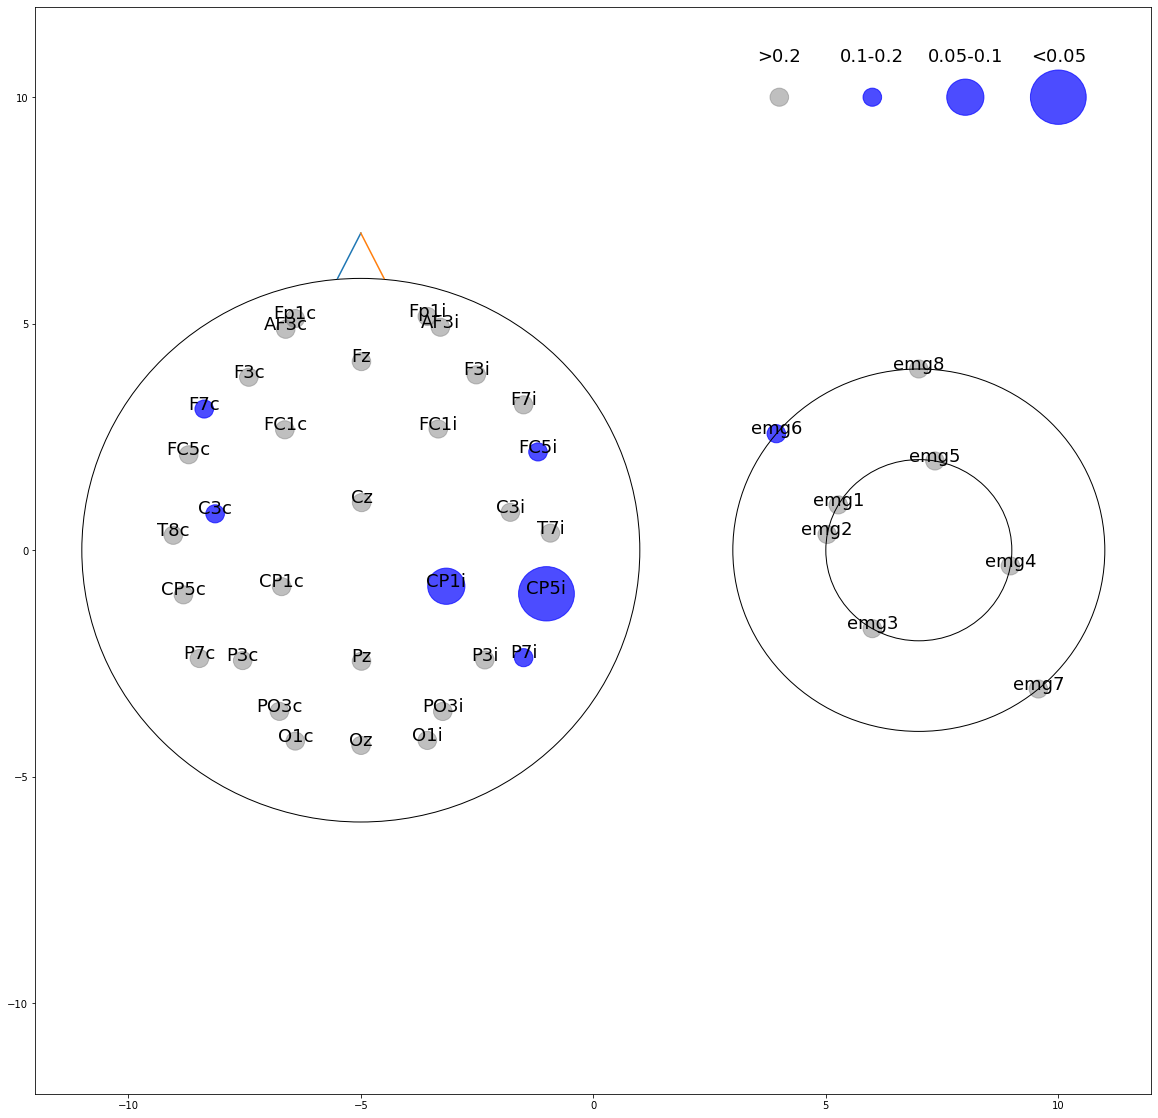

In [61]:
#visualisation
pvalue_levels = [0.2,0.1,0.05]
def radiusBasedOnP (pvalue, defaultR=0.2):
    radius = None
    for level_idx in range(len(pvalue_levels)):
        if pvalue <= pvalue_levels[level_idx]:
            if radius == None:
                radius = defaultR
            else: 
                radius += defaultR
        else:
            return radius
    return radius


fig,ax = plt.subplots(figsize=(20, 20))
ax = plt.gca()
# EEG
center=[-5,0]
radius=6
circle = plt.Circle((center[0],center[1]),radius,fill = False)
ax.plot([center[0]-0.5,center[0]],[radius+center[1],radius+center[1]+1])
ax.plot([center[0]+0.5,center[0]],[radius+center[1],radius+center[1]+1])
ax.add_artist(circle)
#EEG_chs
for EEG in EEGs:
    radius = radiusBasedOnP(p_eigenvectorC[EEG.name])
    if radius == None:
        circle = plt.Circle((center[0]+EEG.x, center[1]+EEG.y), radius=0.2,fill = True, color = 'grey',alpha=0.5)
    else:
        circle = plt.Circle((center[0]+EEG.x, center[1]+EEG.y), radius=radius,fill = True, color = 'blue',alpha=0.7)
    ax.add_patch(circle)
    label = ax.annotate(EEG.name, xy=(center[0]+EEG.x, center[1]+EEG.y), fontsize=18, color ='black', ha="center")

#EMG
center=[7,0]
for i in range(2):
    circle = plt.Circle((center[0],center[1]), 2*(i+1),fill = False)
    ax.add_artist(circle)
#EMG_chs
for EMG in EMGs:
    radius = radiusBasedOnP(p_eigenvectorC[EMG.name])
    if radius == None:
        circle = plt.Circle((center[0]+EMG.x, center[1]+EMG.y), radius=0.2,fill = True, color = 'grey',alpha=0.5)
    else:
        circle = plt.Circle((center[0]+EMG.x, center[1]+EMG.y), radius=radius,fill = True, color = 'blue',alpha=0.7)
    ax.add_patch(circle)
    label = ax.annotate(EMG.name, xy=(center[0]+EMG.x, center[1]+EMG.y), fontsize=18, color ='black', ha="center")
    
plt.xlim(-12,12)
plt.ylim(-12,12)


circle = plt.Circle((4,10), radius=0.2,fill = True, color = 'grey',alpha=0.5)
ax.add_patch(circle)
ax.annotate('>'+str(pvalue_levels[0]), xy=(4,10.8), fontsize=18, color ='black', ha="center")
increment = 0
for pvalue_level in pvalue_levels[1:]:
    increment+=1
    circle = plt.Circle((4+increment*2,10), radius=0.2*increment,fill = True, color = 'blue',alpha=0.7)
    ax.add_patch(circle)
    ax.annotate(str(pvalue_levels[increment])+'-'+str(pvalue_levels[increment-1]),
                xy=(4+increment*2,10.8), fontsize=18, color ='black', ha="center")
    
increment+=1    
circle = plt.Circle((4+2*increment,10), radius=0.2*increment,fill = True, color = 'blue',alpha=0.7)
ax.add_patch(circle)
ax.annotate('<'+str(pvalue_levels[-1]), xy=(4+2*increment,10.8), 
            fontsize=18, color ='black', ha="center")

# save fig
# fName = os.path.join(strokeVsHealthy_results_dir,'betweenness_centrality_topo.eps')
# plt.savefig(fName)

### step 2-2: betweennessC

In [62]:
p_betweennessC = {key:None for key in chs_list_image}
list_gProperties =['Fp1i_betweenness_centrality', 'AF3i_betweenness_centrality', 'F3i_betweenness_centrality',
                   'F7i_betweenness_centrality', 'FC1i_betweenness_centrality', 'FC5i_betweenness_centrality',
                   'C3i_betweenness_centrality', 'T7i_betweenness_centrality', 'CP1i_betweenness_centrality',
                   'CP5i_betweenness_centrality', 'P3i_betweenness_centrality', 'P7i_betweenness_centrality',
                   'PO3i_betweenness_centrality', 'O1i_betweenness_centrality', 'Fz_betweenness_centrality',
                   'Cz_betweenness_centrality', 'Pz_betweenness_centrality', 'Oz_betweenness_centrality',
                   'Fp1c_betweenness_centrality', 'AF3c_betweenness_centrality', 'F3c_betweenness_centrality', 
                   'F7c_betweenness_centrality', 'FC1c_betweenness_centrality', 'FC5c_betweenness_centrality', 
                   'C3c_betweenness_centrality', 'T8c_betweenness_centrality', 'CP1c_betweenness_centrality', 
                   'CP5c_betweenness_centrality', 'P3c_betweenness_centrality', 'P7c_betweenness_centrality',
                   'PO3c_betweenness_centrality', 'O1c_betweenness_centrality','emg1_betweenness_centrality',
                   'emg2_betweenness_centrality','emg3_betweenness_centrality','emg4_betweenness_centrality',
                   'emg5_betweenness_centrality','emg6_betweenness_centrality','emg7_betweenness_centrality',
                   'emg8_betweenness_centrality'] 
for gProperty in list_gProperties:    
    t_stat,pvalue = scipy.stats.ttest_ind((df_betweenGroup[df_betweenGroup['group']=='stroke'])[gProperty],
                          (df_betweenGroup[df_betweenGroup['group']=='healthy'])[gProperty], equal_var=False)
    cohen_s_d = round(cohend((df_betweenGroup[df_betweenGroup['group']=='stroke'])[gProperty],
                 (df_betweenGroup[df_betweenGroup['group']=='healthy'])[gProperty]),2)
    p_betweennessC[gProperty.split('_')[0]]=pvalue
    print(gProperty + ": pvalue = {}, cohen's d = {}, t_stat = {}".format(round(pvalue,2),cohen_s_d,round(t_stat,2)))
    

Fp1i_betweenness_centrality: pvalue = 0.41, cohen's d = -0.47, t_stat = -0.9
AF3i_betweenness_centrality: pvalue = 0.76, cohen's d = 0.22, t_stat = 0.33
F3i_betweenness_centrality: pvalue = 0.55, cohen's d = -0.34, t_stat = -0.62
F7i_betweenness_centrality: pvalue = 0.31, cohen's d = 0.99, t_stat = 1.22
FC1i_betweenness_centrality: pvalue = 0.59, cohen's d = -0.31, t_stat = -0.57
FC5i_betweenness_centrality: pvalue = 0.56, cohen's d = 0.41, t_stat = 0.61
C3i_betweenness_centrality: pvalue = 0.19, cohen's d = -0.79, t_stat = -1.45
T7i_betweenness_centrality: pvalue = 0.73, cohen's d = -0.22, t_stat = -0.35
CP1i_betweenness_centrality: pvalue = 0.37, cohen's d = 0.66, t_stat = 0.97
CP5i_betweenness_centrality: pvalue = 0.92, cohen's d = 0.05, t_stat = 0.1
P3i_betweenness_centrality: pvalue = 0.94, cohen's d = -0.05, t_stat = -0.08
P7i_betweenness_centrality: pvalue = 0.26, cohen's d = 0.88, t_stat = 1.26
PO3i_betweenness_centrality: pvalue = 0.69, cohen's d = -0.23, t_stat = -0.42
O1i_be

Text(10, 10.8, '<0.05')

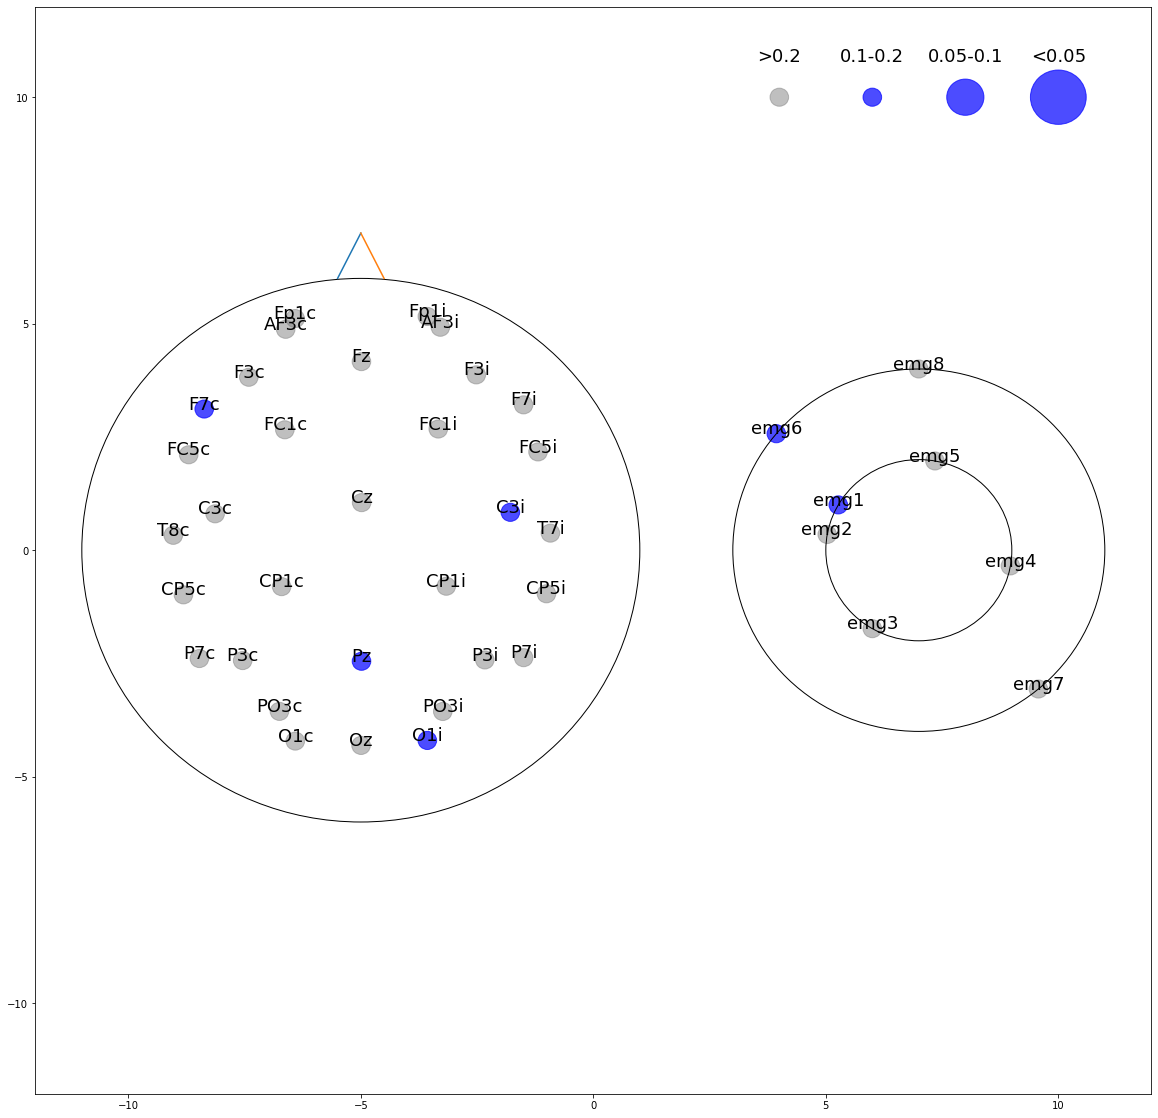

In [63]:
#visualisation
pvalue_levels = [0.2,0.1,0.05]
def radiusBasedOnP (pvalue, defaultR=0.2):
    radius = None
    for level_idx in range(len(pvalue_levels)):
        if pvalue <= pvalue_levels[level_idx]:
            if radius == None:
                radius = defaultR
            else: 
                radius += defaultR
        else:
            return radius
    return radius


fig,ax = plt.subplots(figsize=(20, 20))
ax = plt.gca()
# EEG
center=[-5,0]
radius=6
circle = plt.Circle((center[0],center[1]),radius,fill = False)
ax.plot([center[0]-0.5,center[0]],[radius+center[1],radius+center[1]+1])
ax.plot([center[0]+0.5,center[0]],[radius+center[1],radius+center[1]+1])
ax.add_artist(circle)
#EEG_chs
for EEG in EEGs:
    radius = radiusBasedOnP(p_betweennessC[EEG.name])
    if radius == None:
        circle = plt.Circle((center[0]+EEG.x, center[1]+EEG.y), radius=0.2,fill = True, color = 'grey',alpha=0.5)
    else:
        circle = plt.Circle((center[0]+EEG.x, center[1]+EEG.y), radius=radius,fill = True, color = 'blue',alpha=0.7)
    ax.add_patch(circle)
    label = ax.annotate(EEG.name, xy=(center[0]+EEG.x, center[1]+EEG.y), fontsize=18, color ='black', ha="center")

#EMG
center=[7,0]
for i in range(2):
    circle = plt.Circle((center[0],center[1]), 2*(i+1),fill = False)
    ax.add_artist(circle)
#EMG_chs
for EMG in EMGs:
    radius = radiusBasedOnP(p_betweennessC[EMG.name])
    if radius == None:
        circle = plt.Circle((center[0]+EMG.x, center[1]+EMG.y), radius=0.2,fill = True, color = 'grey',alpha=0.5)
    else:
        circle = plt.Circle((center[0]+EMG.x, center[1]+EMG.y), radius=radius,fill = True, color = 'blue',alpha=0.7)
    ax.add_patch(circle)
    label = ax.annotate(EMG.name, xy=(center[0]+EMG.x, center[1]+EMG.y), fontsize=18, color ='black', ha="center")
    
plt.xlim(-12,12)
plt.ylim(-12,12)


circle = plt.Circle((4,10), radius=0.2,fill = True, color = 'grey',alpha=0.5)
ax.add_patch(circle)
ax.annotate('>'+str(pvalue_levels[0]), xy=(4,10.8), fontsize=18, color ='black', ha="center")
increment = 0
for pvalue_level in pvalue_levels[1:]:
    increment+=1
    circle = plt.Circle((4+increment*2,10), radius=0.2*increment,fill = True, color = 'blue',alpha=0.7)
    ax.add_patch(circle)
    ax.annotate(str(pvalue_levels[increment])+'-'+str(pvalue_levels[increment-1]),
                xy=(4+increment*2,10.8), fontsize=18, color ='black', ha="center")
    
increment+=1    
circle = plt.Circle((4+2*increment,10), radius=0.2*increment,fill = True, color = 'blue',alpha=0.7)
ax.add_patch(circle)
ax.annotate('<'+str(pvalue_levels[-1]), xy=(4+2*increment,10.8), 
            fontsize=18, color ='black', ha="center")

# save fig
# fName = os.path.join(strokeVsHealthy_results_dir,'betweenness_centrality_topo.eps')
# plt.savefig(fName)

### step 2-3: closenessC

In [64]:
p_closenessC = {key:None for key in chs_list_image}
list_gProperties =['Fp1i_closeness_centrality', 'AF3i_closeness_centrality', 'F3i_closeness_centrality',
                   'F7i_closeness_centrality', 'FC1i_closeness_centrality', 'FC5i_closeness_centrality',
                   'C3i_closeness_centrality', 'T7i_closeness_centrality', 'CP1i_closeness_centrality',
                   'CP5i_closeness_centrality', 'P3i_closeness_centrality', 'P7i_closeness_centrality',
                   'PO3i_closeness_centrality', 'O1i_closeness_centrality', 'Fz_closeness_centrality',
                   'Cz_closeness_centrality', 'Pz_closeness_centrality', 'Oz_closeness_centrality',
                   'Fp1c_closeness_centrality', 'AF3c_closeness_centrality', 'F3c_closeness_centrality', 
                   'F7c_closeness_centrality', 'FC1c_closeness_centrality', 'FC5c_closeness_centrality', 
                   'C3c_closeness_centrality', 'T8c_closeness_centrality', 'CP1c_closeness_centrality', 
                   'CP5c_closeness_centrality', 'P3c_closeness_centrality', 'P7c_closeness_centrality',
                   'PO3c_closeness_centrality', 'O1c_closeness_centrality','emg1_closeness_centrality',
                   'emg2_closeness_centrality','emg3_closeness_centrality','emg4_closeness_centrality',
                   'emg5_closeness_centrality','emg6_closeness_centrality','emg7_closeness_centrality',
                   'emg8_closeness_centrality'] 
for gProperty in list_gProperties:    
    t_stat,pvalue = scipy.stats.ttest_ind((df_betweenGroup[df_betweenGroup['group']=='stroke'])[gProperty],
                          (df_betweenGroup[df_betweenGroup['group']=='healthy'])[gProperty], equal_var=False)
    cohen_s_d = round(cohend((df_betweenGroup[df_betweenGroup['group']=='stroke'])[gProperty],
                 (df_betweenGroup[df_betweenGroup['group']=='healthy'])[gProperty]),2)
    p_closenessC[gProperty.split('_')[0]]=pvalue
    print(gProperty + ": pvalue = {}, cohen's d = {}, t_stat = {}".format(round(pvalue,2),cohen_s_d,round(t_stat,2)))
    

Fp1i_closeness_centrality: pvalue = 0.3, cohen's d = 0.88, t_stat = 1.19
AF3i_closeness_centrality: pvalue = 0.49, cohen's d = 0.63, t_stat = 0.79
F3i_closeness_centrality: pvalue = 0.48, cohen's d = 0.61, t_stat = 0.79
F7i_closeness_centrality: pvalue = 0.32, cohen's d = 0.89, t_stat = 1.15
FC1i_closeness_centrality: pvalue = 0.1, cohen's d = 1.38, t_stat = 1.99
FC5i_closeness_centrality: pvalue = 0.2, cohen's d = 1.11, t_stat = 1.51
C3i_closeness_centrality: pvalue = 0.85, cohen's d = 0.15, t_stat = 0.21
T7i_closeness_centrality: pvalue = 0.44, cohen's d = 0.64, t_stat = 0.85
CP1i_closeness_centrality: pvalue = 0.06, cohen's d = 1.53, t_stat = 2.28
CP5i_closeness_centrality: pvalue = 0.1, cohen's d = 1.32, t_stat = 1.97
P3i_closeness_centrality: pvalue = 0.26, cohen's d = 0.81, t_stat = 1.24
P7i_closeness_centrality: pvalue = 0.52, cohen's d = 0.38, t_stat = 0.68
PO3i_closeness_centrality: pvalue = 0.4, cohen's d = 0.69, t_stat = 0.94
O1i_closeness_centrality: pvalue = 0.68, cohen's 

Text(10, 10.8, '<0.05')

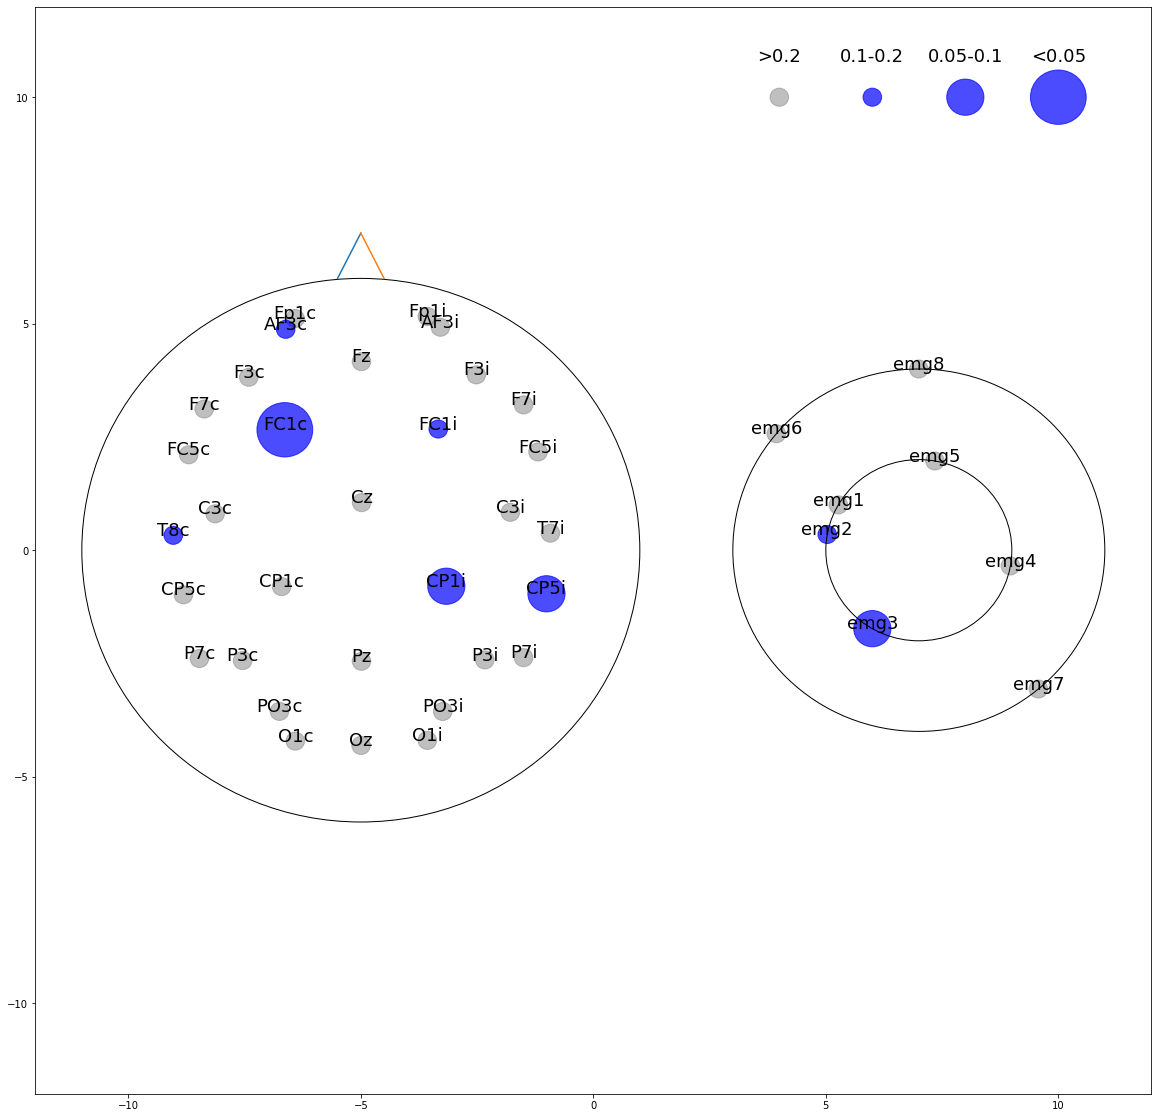

In [65]:
#visualisation
pvalue_levels = [0.2,0.1,0.05]
def radiusBasedOnP (pvalue, defaultR=0.2):
    radius = None
    for level_idx in range(len(pvalue_levels)):
        if pvalue <= pvalue_levels[level_idx]:
            if radius == None:
                radius = defaultR
            else: 
                radius += defaultR
        else:
            return radius
    return radius


fig,ax = plt.subplots(figsize=(20, 20))
ax = plt.gca()
# EEG
center=[-5,0]
radius=6
circle = plt.Circle((center[0],center[1]),radius,fill = False)
ax.plot([center[0]-0.5,center[0]],[radius+center[1],radius+center[1]+1])
ax.plot([center[0]+0.5,center[0]],[radius+center[1],radius+center[1]+1])
ax.add_artist(circle)
#EEG_chs
for EEG in EEGs:
    radius = radiusBasedOnP(p_closenessC[EEG.name])
    if radius == None:
        circle = plt.Circle((center[0]+EEG.x, center[1]+EEG.y), radius=0.2,fill = True, color = 'grey',alpha=0.5)
    else:
        circle = plt.Circle((center[0]+EEG.x, center[1]+EEG.y), radius=radius,fill = True, color = 'blue',alpha=0.7)
    ax.add_patch(circle)
    label = ax.annotate(EEG.name, xy=(center[0]+EEG.x, center[1]+EEG.y), fontsize=18, color ='black', ha="center")

#EMG
center=[7,0]
for i in range(2):
    circle = plt.Circle((center[0],center[1]), 2*(i+1),fill = False)
    ax.add_artist(circle)
#EMG_chs
for EMG in EMGs:
    radius = radiusBasedOnP(p_closenessC[EMG.name])
    if radius == None:
        circle = plt.Circle((center[0]+EMG.x, center[1]+EMG.y), radius=0.2,fill = True, color = 'grey',alpha=0.5)
    else:
        circle = plt.Circle((center[0]+EMG.x, center[1]+EMG.y), radius=radius,fill = True, color = 'blue',alpha=0.7)
    ax.add_patch(circle)
    label = ax.annotate(EMG.name, xy=(center[0]+EMG.x, center[1]+EMG.y), fontsize=18, color ='black', ha="center")
    
plt.xlim(-12,12)
plt.ylim(-12,12)


circle = plt.Circle((4,10), radius=0.2,fill = True, color = 'grey',alpha=0.5)
ax.add_patch(circle)
ax.annotate('>'+str(pvalue_levels[0]), xy=(4,10.8), fontsize=18, color ='black', ha="center")
increment = 0
for pvalue_level in pvalue_levels[1:]:
    increment+=1
    circle = plt.Circle((4+increment*2,10), radius=0.2*increment,fill = True, color = 'blue',alpha=0.7)
    ax.add_patch(circle)
    ax.annotate(str(pvalue_levels[increment])+'-'+str(pvalue_levels[increment-1]),
                xy=(4+increment*2,10.8), fontsize=18, color ='black', ha="center")
    
increment+=1    
circle = plt.Circle((4+2*increment,10), radius=0.2*increment,fill = True, color = 'blue',alpha=0.7)
ax.add_patch(circle)
ax.annotate('<'+str(pvalue_levels[-1]), xy=(4+2*increment,10.8), 
            fontsize=18, color ='black', ha="center")

# save fig
# fName = os.path.join(strokeVsHealthy_results_dir,'betweenness_centrality_topo.eps')
# plt.savefig(fName)

### step 2-5: cost_betweenness C

In [68]:
p_cost_betweennessC = {key:None for key in chs_list_image}
list_gProperties =['Fp1i_cost_betweenness_centrality', 'AF3i_cost_betweenness_centrality', 'F3i_cost_betweenness_centrality',
                   'F7i_cost_betweenness_centrality', 'FC1i_cost_betweenness_centrality', 'FC5i_cost_betweenness_centrality',
                   'C3i_cost_betweenness_centrality', 'T7i_cost_betweenness_centrality', 'CP1i_cost_betweenness_centrality',
                   'CP5i_cost_betweenness_centrality', 'P3i_cost_betweenness_centrality', 'P7i_cost_betweenness_centrality',
                   'PO3i_cost_betweenness_centrality', 'O1i_cost_betweenness_centrality', 'Fz_cost_betweenness_centrality',
                   'Cz_cost_betweenness_centrality', 'Pz_cost_betweenness_centrality', 'Oz_cost_betweenness_centrality',
                   'Fp1c_cost_betweenness_centrality', 'AF3c_cost_betweenness_centrality', 'F3c_cost_betweenness_centrality', 
                   'F7c_cost_betweenness_centrality', 'FC1c_cost_betweenness_centrality', 'FC5c_cost_betweenness_centrality', 
                   'C3c_cost_betweenness_centrality', 'T8c_cost_betweenness_centrality', 'CP1c_cost_betweenness_centrality', 
                   'CP5c_cost_betweenness_centrality', 'P3c_cost_betweenness_centrality', 'P7c_cost_betweenness_centrality',
                   'PO3c_cost_betweenness_centrality', 'O1c_cost_betweenness_centrality','emg1_cost_betweenness_centrality',
                   'emg2_cost_betweenness_centrality','emg3_cost_betweenness_centrality','emg4_cost_betweenness_centrality',
                   'emg5_cost_betweenness_centrality','emg6_cost_betweenness_centrality','emg7_cost_betweenness_centrality',
                   'emg8_cost_betweenness_centrality'] 
for gProperty in list_gProperties:    
    t_stat,pvalue = scipy.stats.ttest_ind((df_betweenGroup[df_betweenGroup['group']=='stroke'])[gProperty],
                          (df_betweenGroup[df_betweenGroup['group']=='healthy'])[gProperty], equal_var=False)
    cohen_s_d = round(cohend((df_betweenGroup[df_betweenGroup['group']=='stroke'])[gProperty],
                 (df_betweenGroup[df_betweenGroup['group']=='healthy'])[gProperty]),2)
    p_cost_betweennessC[gProperty.split('_')[0]]=pvalue
    print(gProperty + ": pvalue = {}, cohen's d = {}, t_stat = {}".format(round(pvalue,2),cohen_s_d,round(t_stat,2)))
    

Fp1i_cost_betweenness_centrality: pvalue = 0.31, cohen's d = -0.6, t_stat = -1.11
AF3i_cost_betweenness_centrality: pvalue = 0.78, cohen's d = 0.22, t_stat = 0.3
F3i_cost_betweenness_centrality: pvalue = 0.54, cohen's d = -0.36, t_stat = -0.64
F7i_cost_betweenness_centrality: pvalue = 0.14, cohen's d = 1.63, t_stat = 1.99
FC1i_cost_betweenness_centrality: pvalue = 0.69, cohen's d = -0.23, t_stat = -0.41
FC5i_cost_betweenness_centrality: pvalue = 0.36, cohen's d = -0.53, t_stat = -1.01
C3i_cost_betweenness_centrality: pvalue = 0.36, cohen's d = -0.52, t_stat = -1.0
T7i_cost_betweenness_centrality: pvalue = 0.61, cohen's d = 0.38, t_stat = 0.54
CP1i_cost_betweenness_centrality: pvalue = 0.24, cohen's d = -0.69, t_stat = -1.34
CP5i_cost_betweenness_centrality: pvalue = 0.83, cohen's d = 0.15, t_stat = 0.22
P3i_cost_betweenness_centrality: pvalue = 0.26, cohen's d = -0.69, t_stat = -1.23
P7i_cost_betweenness_centrality: pvalue = 0.34, cohen's d = 0.92, t_stat = 1.14
PO3i_cost_betweenness_c

d:\software\1python3.75amd64\envs\eegemg\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
d:\software\1python3.75amd64\envs\eegemg\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


Text(10, 10.8, '<0.05')

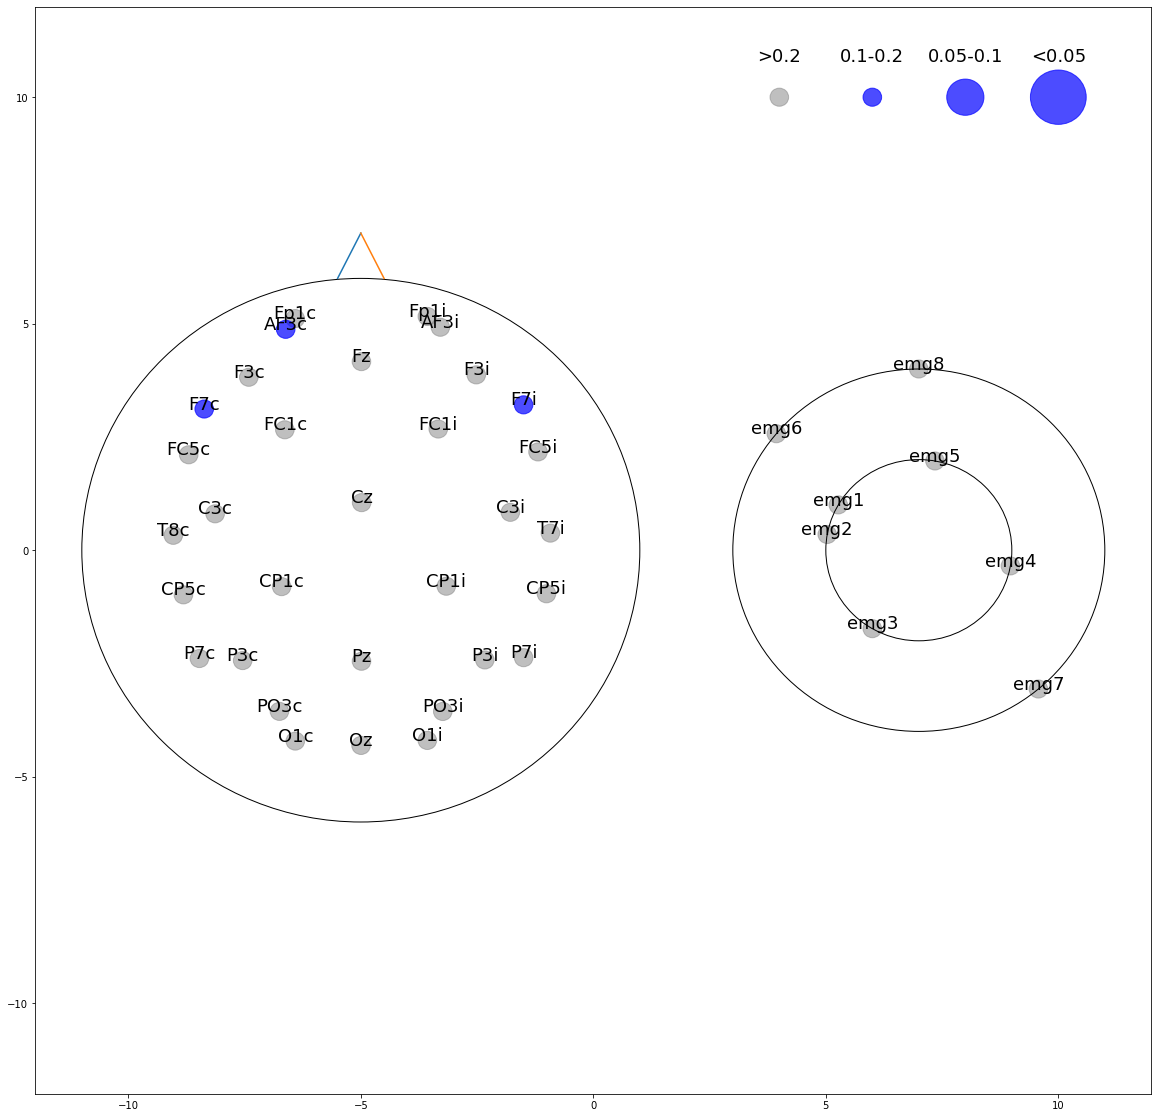

In [118]:
#visualisation
pvalue_levels = [0.2,0.1,0.05]
def radiusBasedOnP (pvalue, defaultR=0.2):
    radius = None
    for level_idx in range(len(pvalue_levels)):
        if pvalue <= pvalue_levels[level_idx]:
            if radius == None:
                radius = defaultR
            else: 
                radius += defaultR
        else:
            return radius
    return radius


fig,ax = plt.subplots(figsize=(20, 20))
ax = plt.gca()
# EEG
center=[-5,0]
radius=6
circle = plt.Circle((center[0],center[1]),radius,fill = False)
ax.plot([center[0]-0.5,center[0]],[radius+center[1],radius+center[1]+1])
ax.plot([center[0]+0.5,center[0]],[radius+center[1],radius+center[1]+1])
ax.add_artist(circle)
#EEG_chs
for EEG in EEGs:
    radius = radiusBasedOnP(p_cost_betweennessC[EEG.name])
    if radius == None:
        circle = plt.Circle((center[0]+EEG.x, center[1]+EEG.y), radius=0.2,fill = True, color = 'grey',alpha=0.5)
    else:
        circle = plt.Circle((center[0]+EEG.x, center[1]+EEG.y), radius=radius,fill = True, color = 'blue',alpha=0.7)
    ax.add_patch(circle)
    label = ax.annotate(EEG.name, xy=(center[0]+EEG.x, center[1]+EEG.y), fontsize=18, color ='black', ha="center")

#EMG
center=[7,0]
for i in range(2):
    circle = plt.Circle((center[0],center[1]), 2*(i+1),fill = False)
    ax.add_artist(circle)
#EMG_chs
for EMG in EMGs:
    radius = radiusBasedOnP(p_cost_betweennessC[EMG.name])
    if radius == None:
        circle = plt.Circle((center[0]+EMG.x, center[1]+EMG.y), radius=0.2,fill = True, color = 'grey',alpha=0.5)
    else:
        circle = plt.Circle((center[0]+EMG.x, center[1]+EMG.y), radius=radius,fill = True, color = 'blue',alpha=0.7)
    ax.add_patch(circle)
    label = ax.annotate(EMG.name, xy=(center[0]+EMG.x, center[1]+EMG.y), fontsize=18, color ='black', ha="center")
    
plt.xlim(-12,12)
plt.ylim(-12,12)


circle = plt.Circle((4,10), radius=0.2,fill = True, color = 'grey',alpha=0.5)
ax.add_patch(circle)
ax.annotate('>'+str(pvalue_levels[0]), xy=(4,10.8), fontsize=18, color ='black', ha="center")
increment = 0
for pvalue_level in pvalue_levels[1:]:
    increment+=1
    circle = plt.Circle((4+increment*2,10), radius=0.2*increment,fill = True, color = 'blue',alpha=0.7)
    ax.add_patch(circle)
    ax.annotate(str(pvalue_levels[increment])+'-'+str(pvalue_levels[increment-1]),
                xy=(4+increment*2,10.8), fontsize=18, color ='black', ha="center")
    
increment+=1    
circle = plt.Circle((4+2*increment,10), radius=0.2*increment,fill = True, color = 'blue',alpha=0.7)
ax.add_patch(circle)
ax.annotate('<'+str(pvalue_levels[-1]), xy=(4+2*increment,10.8), 
            fontsize=18, color ='black', ha="center")

# save fig
# fName = os.path.join(strokeVsHealthy_results_dir,'cost_betweenness_centrality_topo.eps')
# plt.savefig(fName)

### step 2-6: cost_closeness C

In [71]:
p_cost_closenessC = {key:None for key in chs_list_image}
list_gProperties =['Fp1i_cost_closeness_centrality', 'AF3i_cost_closeness_centrality', 'F3i_cost_closeness_centrality',
                   'F7i_cost_closeness_centrality', 'FC1i_cost_closeness_centrality', 'FC5i_cost_closeness_centrality',
                   'C3i_cost_closeness_centrality', 'T7i_cost_closeness_centrality', 'CP1i_cost_closeness_centrality',
                   'CP5i_cost_closeness_centrality', 'P3i_cost_closeness_centrality', 'P7i_cost_closeness_centrality',
                   'PO3i_cost_closeness_centrality', 'O1i_cost_closeness_centrality', 'Fz_cost_closeness_centrality',
                   'Cz_cost_closeness_centrality', 'Pz_cost_closeness_centrality', 'Oz_cost_closeness_centrality',
                   'Fp1c_cost_closeness_centrality', 'AF3c_cost_closeness_centrality', 'F3c_cost_closeness_centrality', 
                   'F7c_cost_closeness_centrality', 'FC1c_cost_closeness_centrality', 'FC5c_cost_closeness_centrality', 
                   'C3c_cost_closeness_centrality', 'T8c_cost_closeness_centrality', 'CP1c_cost_closeness_centrality', 
                   'CP5c_cost_closeness_centrality', 'P3c_cost_closeness_centrality', 'P7c_cost_closeness_centrality',
                   'PO3c_cost_closeness_centrality', 'O1c_cost_closeness_centrality','emg1_cost_closeness_centrality',
                   'emg2_cost_closeness_centrality','emg3_cost_closeness_centrality','emg4_cost_closeness_centrality',
                   'emg5_cost_closeness_centrality','emg6_cost_closeness_centrality','emg7_cost_closeness_centrality',
                   'emg8_cost_closeness_centrality'] 
for gProperty in list_gProperties:    
    t_stat,pvalue = scipy.stats.ttest_ind((df_betweenGroup[df_betweenGroup['group']=='stroke'])[gProperty],
                          (df_betweenGroup[df_betweenGroup['group']=='healthy'])[gProperty], equal_var=False)
    cohen_s_d = round(cohend((df_betweenGroup[df_betweenGroup['group']=='stroke'])[gProperty],
                 (df_betweenGroup[df_betweenGroup['group']=='healthy'])[gProperty]),2)
    p_cost_closenessC[gProperty.split('_')[0]]=pvalue
    print(gProperty + ": pvalue = {}, cohen's d = {}, t_stat = {}".format(round(pvalue,2),cohen_s_d,round(t_stat,2)))
    

Fp1i_cost_closeness_centrality: pvalue = 0.74, cohen's d = -0.21, t_stat = -0.35
AF3i_cost_closeness_centrality: pvalue = 0.48, cohen's d = -0.43, t_stat = -0.74
F3i_cost_closeness_centrality: pvalue = 0.53, cohen's d = -0.39, t_stat = -0.66
F7i_cost_closeness_centrality: pvalue = 0.81, cohen's d = -0.16, t_stat = -0.25
FC1i_cost_closeness_centrality: pvalue = 0.73, cohen's d = -0.24, t_stat = -0.36
FC5i_cost_closeness_centrality: pvalue = 0.61, cohen's d = -0.33, t_stat = -0.54
C3i_cost_closeness_centrality: pvalue = 0.53, cohen's d = -0.39, t_stat = -0.65
T7i_cost_closeness_centrality: pvalue = 0.7, cohen's d = -0.25, t_stat = -0.4
CP1i_cost_closeness_centrality: pvalue = 0.7, cohen's d = -0.25, t_stat = -0.4
CP5i_cost_closeness_centrality: pvalue = 0.54, cohen's d = -0.4, t_stat = -0.64
P3i_cost_closeness_centrality: pvalue = 0.27, cohen's d = -0.68, t_stat = -1.2
P7i_cost_closeness_centrality: pvalue = 0.72, cohen's d = -0.21, t_stat = -0.37
PO3i_cost_closeness_centrality: pvalue =

Text(10, 10.8, '<0.05')

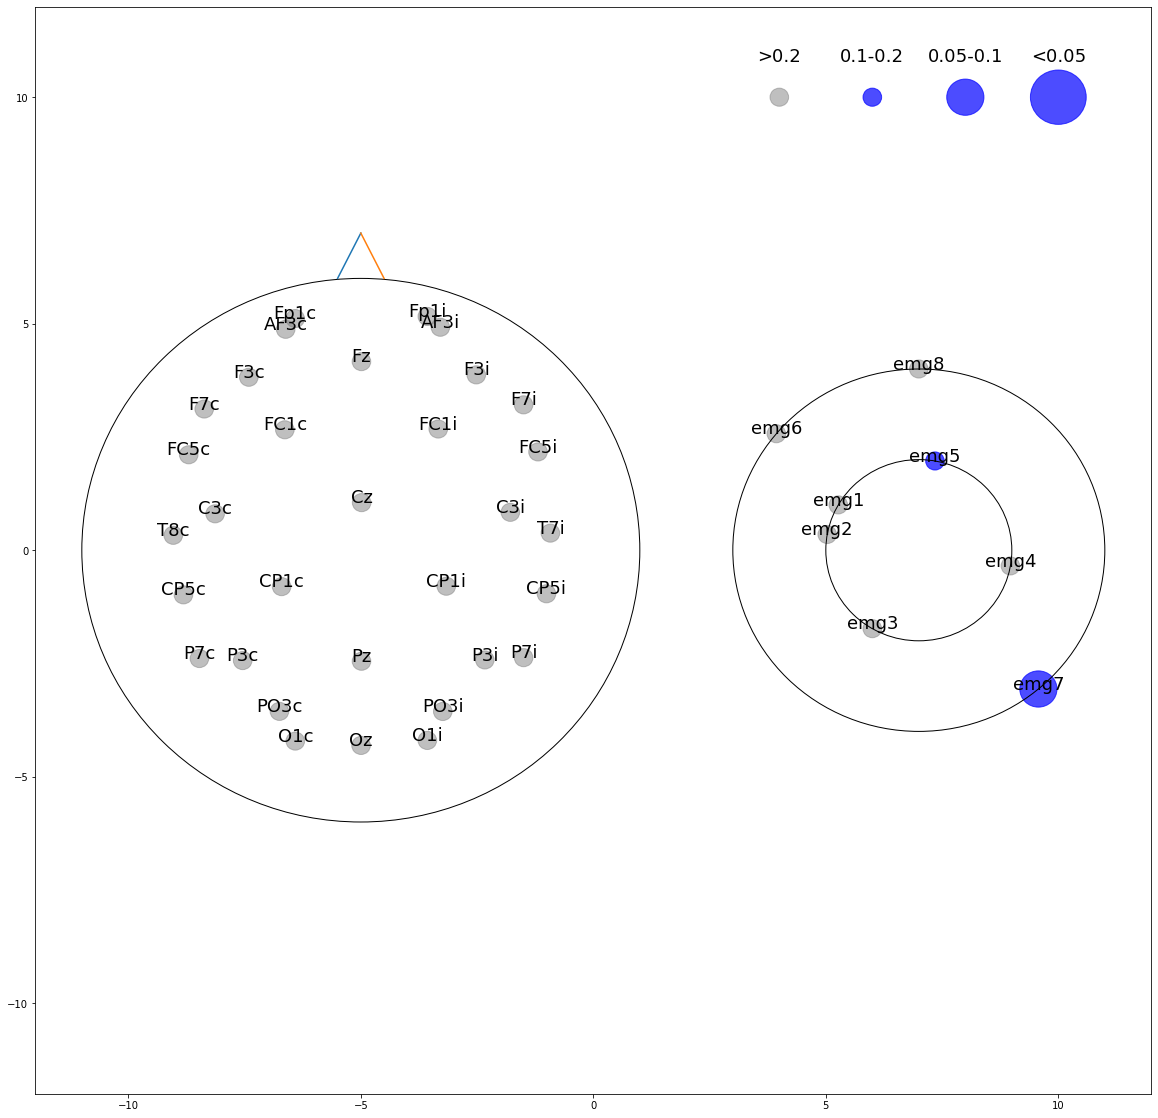

In [72]:
#visualisation
pvalue_levels = [0.2,0.1,0.05]
def radiusBasedOnP (pvalue, defaultR=0.2):
    radius = None
    for level_idx in range(len(pvalue_levels)):
        if pvalue <= pvalue_levels[level_idx]:
            if radius == None:
                radius = defaultR
            else: 
                radius += defaultR
        else:
            return radius
    return radius


fig,ax = plt.subplots(figsize=(20, 20))
ax = plt.gca()
# EEG
center=[-5,0]
radius=6
circle = plt.Circle((center[0],center[1]),radius,fill = False)
ax.plot([center[0]-0.5,center[0]],[radius+center[1],radius+center[1]+1])
ax.plot([center[0]+0.5,center[0]],[radius+center[1],radius+center[1]+1])
ax.add_artist(circle)
#EEG_chs
for EEG in EEGs:
    radius = radiusBasedOnP(p_cost_closenessC[EEG.name])
    if radius == None:
        circle = plt.Circle((center[0]+EEG.x, center[1]+EEG.y), radius=0.2,fill = True, color = 'grey',alpha=0.5)
    else:
        circle = plt.Circle((center[0]+EEG.x, center[1]+EEG.y), radius=radius,fill = True, color = 'blue',alpha=0.7)
    ax.add_patch(circle)
    label = ax.annotate(EEG.name, xy=(center[0]+EEG.x, center[1]+EEG.y), fontsize=18, color ='black', ha="center")

#EMG
center=[7,0]
for i in range(2):
    circle = plt.Circle((center[0],center[1]), 2*(i+1),fill = False)
    ax.add_artist(circle)
#EMG_chs
for EMG in EMGs:
    radius = radiusBasedOnP(p_cost_closenessC[EMG.name])
    if radius == None:
        circle = plt.Circle((center[0]+EMG.x, center[1]+EMG.y), radius=0.2,fill = True, color = 'grey',alpha=0.5)
    else:
        circle = plt.Circle((center[0]+EMG.x, center[1]+EMG.y), radius=radius,fill = True, color = 'blue',alpha=0.7)
    ax.add_patch(circle)
    label = ax.annotate(EMG.name, xy=(center[0]+EMG.x, center[1]+EMG.y), fontsize=18, color ='black', ha="center")
    
plt.xlim(-12,12)
plt.ylim(-12,12)


circle = plt.Circle((4,10), radius=0.2,fill = True, color = 'grey',alpha=0.5)
ax.add_patch(circle)
ax.annotate('>'+str(pvalue_levels[0]), xy=(4,10.8), fontsize=18, color ='black', ha="center")
increment = 0
for pvalue_level in pvalue_levels[1:]:
    increment+=1
    circle = plt.Circle((4+increment*2,10), radius=0.2*increment,fill = True, color = 'blue',alpha=0.7)
    ax.add_patch(circle)
    ax.annotate(str(pvalue_levels[increment])+'-'+str(pvalue_levels[increment-1]),
                xy=(4+increment*2,10.8), fontsize=18, color ='black', ha="center")
    
increment+=1    
circle = plt.Circle((4+2*increment,10), radius=0.2*increment,fill = True, color = 'blue',alpha=0.7)
ax.add_patch(circle)
ax.annotate('<'+str(pvalue_levels[-1]), xy=(4+2*increment,10.8), 
            fontsize=18, color ='black', ha="center")

# save fig
# fName = os.path.join(strokeVsHealthy_results_dir,'betweenness_centrality_topo.eps')
# plt.savefig(fName)

### step 2-7: cost_eigenvector C

In [73]:
p_cost_eigenvectorC = {key:None for key in chs_list_image}
list_gProperties =['Fp1i_cost_eigenvector_centrality', 'AF3i_cost_eigenvector_centrality', 'F3i_cost_eigenvector_centrality',
                   'F7i_cost_eigenvector_centrality', 'FC1i_cost_eigenvector_centrality', 'FC5i_cost_eigenvector_centrality',
                   'C3i_cost_eigenvector_centrality', 'T7i_cost_eigenvector_centrality', 'CP1i_cost_eigenvector_centrality',
                   'CP5i_cost_eigenvector_centrality', 'P3i_cost_eigenvector_centrality', 'P7i_cost_eigenvector_centrality',
                   'PO3i_cost_eigenvector_centrality', 'O1i_cost_eigenvector_centrality', 'Fz_cost_eigenvector_centrality',
                   'Cz_cost_eigenvector_centrality', 'Pz_cost_eigenvector_centrality', 'Oz_cost_eigenvector_centrality',
                   'Fp1c_cost_eigenvector_centrality', 'AF3c_cost_eigenvector_centrality', 'F3c_cost_eigenvector_centrality', 
                   'F7c_cost_eigenvector_centrality', 'FC1c_cost_eigenvector_centrality', 'FC5c_cost_eigenvector_centrality', 
                   'C3c_cost_eigenvector_centrality', 'T8c_cost_eigenvector_centrality', 'CP1c_cost_eigenvector_centrality', 
                   'CP5c_cost_eigenvector_centrality', 'P3c_cost_eigenvector_centrality', 'P7c_cost_eigenvector_centrality',
                   'PO3c_cost_eigenvector_centrality', 'O1c_cost_eigenvector_centrality','emg1_cost_eigenvector_centrality',
                   'emg2_cost_eigenvector_centrality','emg3_cost_eigenvector_centrality','emg4_cost_eigenvector_centrality',
                   'emg5_cost_eigenvector_centrality','emg6_cost_eigenvector_centrality','emg7_cost_eigenvector_centrality',
                   'emg8_cost_eigenvector_centrality'] 
for gProperty in list_gProperties:    
    t_stat,pvalue = scipy.stats.ttest_ind((df_betweenGroup[df_betweenGroup['group']=='stroke'])[gProperty],
                          (df_betweenGroup[df_betweenGroup['group']=='healthy'])[gProperty], equal_var=False)
    cohen_s_d = round(cohend((df_betweenGroup[df_betweenGroup['group']=='stroke'])[gProperty],
                 (df_betweenGroup[df_betweenGroup['group']=='healthy'])[gProperty]),2)
    p_cost_eigenvectorC[gProperty.split('_')[0]]=pvalue
    print(gProperty + ": pvalue = {}, cohen's d = {}, t_stat = {}".format(round(pvalue,2),cohen_s_d,round(t_stat,2)))
    

Fp1i_cost_eigenvector_centrality: pvalue = 0.74, cohen's d = 0.21, t_stat = 0.34
AF3i_cost_eigenvector_centrality: pvalue = 0.82, cohen's d = 0.14, t_stat = 0.24
F3i_cost_eigenvector_centrality: pvalue = 0.54, cohen's d = -0.35, t_stat = -0.65
F7i_cost_eigenvector_centrality: pvalue = 0.43, cohen's d = 0.6, t_stat = 0.86
FC1i_cost_eigenvector_centrality: pvalue = 0.45, cohen's d = 0.47, t_stat = 0.79
FC5i_cost_eigenvector_centrality: pvalue = 0.1, cohen's d = 1.25, t_stat = 1.92
C3i_cost_eigenvector_centrality: pvalue = 0.53, cohen's d = -0.48, t_stat = -0.67
T7i_cost_eigenvector_centrality: pvalue = 0.77, cohen's d = -0.16, t_stat = -0.3
CP1i_cost_eigenvector_centrality: pvalue = 0.07, cohen's d = 1.17, t_stat = 2.22
CP5i_cost_eigenvector_centrality: pvalue = 0.01, cohen's d = 2.07, t_stat = 3.44
P3i_cost_eigenvector_centrality: pvalue = 0.36, cohen's d = 0.53, t_stat = 1.0
P7i_cost_eigenvector_centrality: pvalue = 0.13, cohen's d = -1.03, t_stat = -1.71
PO3i_cost_eigenvector_centrali

Text(10, 10.8, '<0.05')

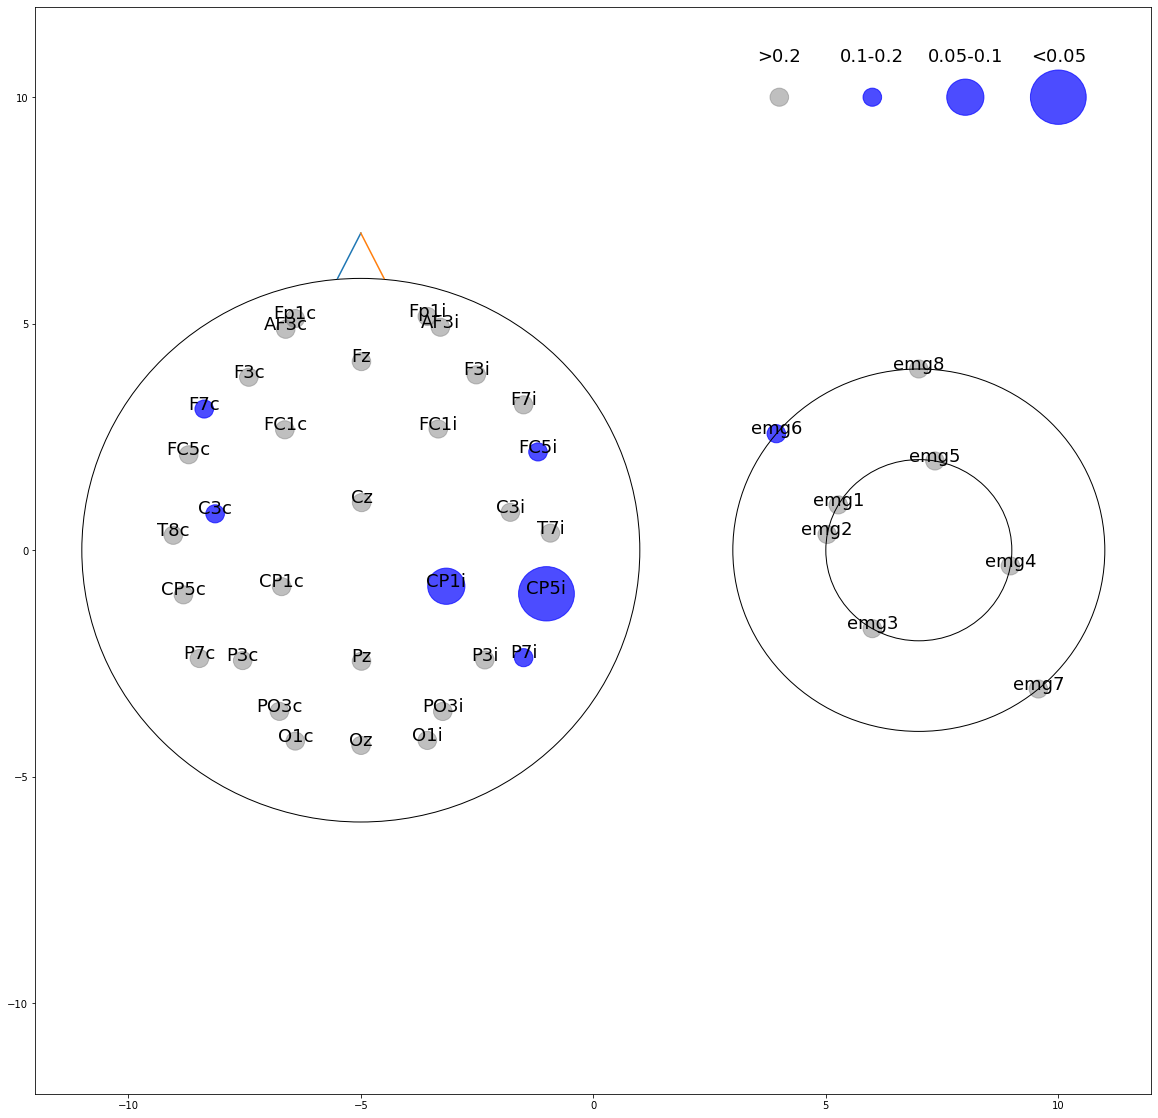

In [74]:
#visualisation
pvalue_levels = [0.2,0.1,0.05]
def radiusBasedOnP (pvalue, defaultR=0.2):
    radius = None
    for level_idx in range(len(pvalue_levels)):
        if pvalue <= pvalue_levels[level_idx]:
            if radius == None:
                radius = defaultR
            else: 
                radius += defaultR
        else:
            return radius
    return radius


fig,ax = plt.subplots(figsize=(20, 20))
ax = plt.gca()
# EEG
center=[-5,0]
radius=6
circle = plt.Circle((center[0],center[1]),radius,fill = False)
ax.plot([center[0]-0.5,center[0]],[radius+center[1],radius+center[1]+1])
ax.plot([center[0]+0.5,center[0]],[radius+center[1],radius+center[1]+1])
ax.add_artist(circle)
#EEG_chs
for EEG in EEGs:
    radius = radiusBasedOnP(p_cost_eigenvectorC[EEG.name])
    if radius == None:
        circle = plt.Circle((center[0]+EEG.x, center[1]+EEG.y), radius=0.2,fill = True, color = 'grey',alpha=0.5)
    else:
        circle = plt.Circle((center[0]+EEG.x, center[1]+EEG.y), radius=radius,fill = True, color = 'blue',alpha=0.7)
    ax.add_patch(circle)
    label = ax.annotate(EEG.name, xy=(center[0]+EEG.x, center[1]+EEG.y), fontsize=18, color ='black', ha="center")

#EMG
center=[7,0]
for i in range(2):
    circle = plt.Circle((center[0],center[1]), 2*(i+1),fill = False)
    ax.add_artist(circle)
#EMG_chs
for EMG in EMGs:
    radius = radiusBasedOnP(p_cost_eigenvectorC[EMG.name])
    if radius == None:
        circle = plt.Circle((center[0]+EMG.x, center[1]+EMG.y), radius=0.2,fill = True, color = 'grey',alpha=0.5)
    else:
        circle = plt.Circle((center[0]+EMG.x, center[1]+EMG.y), radius=radius,fill = True, color = 'blue',alpha=0.7)
    ax.add_patch(circle)
    label = ax.annotate(EMG.name, xy=(center[0]+EMG.x, center[1]+EMG.y), fontsize=18, color ='black', ha="center")
    
plt.xlim(-12,12)
plt.ylim(-12,12)


circle = plt.Circle((4,10), radius=0.2,fill = True, color = 'grey',alpha=0.5)
ax.add_patch(circle)
ax.annotate('>'+str(pvalue_levels[0]), xy=(4,10.8), fontsize=18, color ='black', ha="center")
increment = 0
for pvalue_level in pvalue_levels[1:]:
    increment+=1
    circle = plt.Circle((4+increment*2,10), radius=0.2*increment,fill = True, color = 'blue',alpha=0.7)
    ax.add_patch(circle)
    ax.annotate(str(pvalue_levels[increment])+'-'+str(pvalue_levels[increment-1]),
                xy=(4+increment*2,10.8), fontsize=18, color ='black', ha="center")
    
increment+=1    
circle = plt.Circle((4+2*increment,10), radius=0.2*increment,fill = True, color = 'blue',alpha=0.7)
ax.add_patch(circle)
ax.annotate('<'+str(pvalue_levels[-1]), xy=(4+2*increment,10.8), 
            fontsize=18, color ='black', ha="center")

# save fig
# fName = os.path.join(strokeVsHealthy_results_dir,'betweenness_centrality_topo.eps')
# plt.savefig(fName)

### step 2-9: clusteringC_weight

In [77]:
p_clusteringC_weight = {key:None for key in chs_list_image}
list_gProperties =['Fp1i_clusteringC_weight', 'AF3i_clusteringC_weight', 'F3i_clusteringC_weight',
                   'F7i_clusteringC_weight', 'FC1i_clusteringC_weight', 'FC5i_clusteringC_weight',
                   'C3i_clusteringC_weight', 'T7i_clusteringC_weight', 'CP1i_clusteringC_weight',
                   'CP5i_clusteringC_weight', 'P3i_clusteringC_weight', 'P7i_clusteringC_weight',
                   'PO3i_clusteringC_weight', 'O1i_clusteringC_weight', 'Fz_clusteringC_weight',
                   'Cz_clusteringC_weight', 'Pz_clusteringC_weight', 'Oz_clusteringC_weight',
                   'Fp1c_clusteringC_weight', 'AF3c_clusteringC_weight', 'F3c_clusteringC_weight', 
                   'F7c_clusteringC_weight', 'FC1c_clusteringC_weight', 'FC5c_clusteringC_weight', 
                   'C3c_clusteringC_weight', 'T8c_clusteringC_weight', 'CP1c_clusteringC_weight', 
                   'CP5c_clusteringC_weight', 'P3c_clusteringC_weight', 'P7c_clusteringC_weight',
                   'PO3c_clusteringC_weight', 'O1c_clusteringC_weight','emg1_clusteringC_weight',
                   'emg2_clusteringC_weight','emg3_clusteringC_weight','emg4_clusteringC_weight',
                   'emg5_clusteringC_weight','emg6_clusteringC_weight','emg7_clusteringC_weight',
                   'emg8_clusteringC_weight'] 
for gProperty in list_gProperties:    
    t_stat,pvalue = scipy.stats.ttest_ind((df_betweenGroup[df_betweenGroup['group']=='stroke'])[gProperty],
                          (df_betweenGroup[df_betweenGroup['group']=='healthy'])[gProperty], equal_var=False)
    cohen_s_d = round(cohend((df_betweenGroup[df_betweenGroup['group']=='stroke'])[gProperty],
                 (df_betweenGroup[df_betweenGroup['group']=='healthy'])[gProperty]),2)
    p_clusteringC_weight[gProperty.split('_')[0]]=pvalue
    print(gProperty + ": pvalue = {}, cohen's d = {}, t_stat = {}".format(round(pvalue,2),cohen_s_d,round(t_stat,2)))
    

Fp1i_clusteringC_weight: pvalue = 0.64, cohen's d = 0.36, t_stat = 0.5
AF3i_clusteringC_weight: pvalue = 0.86, cohen's d = -0.15, t_stat = -0.19
F3i_clusteringC_weight: pvalue = 0.7, cohen's d = 0.3, t_stat = 0.41
F7i_clusteringC_weight: pvalue = 0.85, cohen's d = 0.13, t_stat = 0.19
FC1i_clusteringC_weight: pvalue = 0.8, cohen's d = -0.16, t_stat = -0.26
FC5i_clusteringC_weight: pvalue = 0.32, cohen's d = -0.66, t_stat = -1.08
C3i_clusteringC_weight: pvalue = 0.69, cohen's d = 0.29, t_stat = 0.42
T7i_clusteringC_weight: pvalue = 0.89, cohen's d = 0.1, t_stat = 0.15
CP1i_clusteringC_weight: pvalue = 0.83, cohen's d = -0.13, t_stat = -0.22
CP5i_clusteringC_weight: pvalue = 0.56, cohen's d = -0.37, t_stat = -0.61
P3i_clusteringC_weight: pvalue = 0.53, cohen's d = -0.4, t_stat = -0.66
P7i_clusteringC_weight: pvalue = 0.49, cohen's d = 0.53, t_stat = 0.75
PO3i_clusteringC_weight: pvalue = 0.79, cohen's d = 0.2, t_stat = 0.28
O1i_clusteringC_weight: pvalue = 0.51, cohen's d = 0.54, t_stat =

Text(10, 10.8, '<0.05')

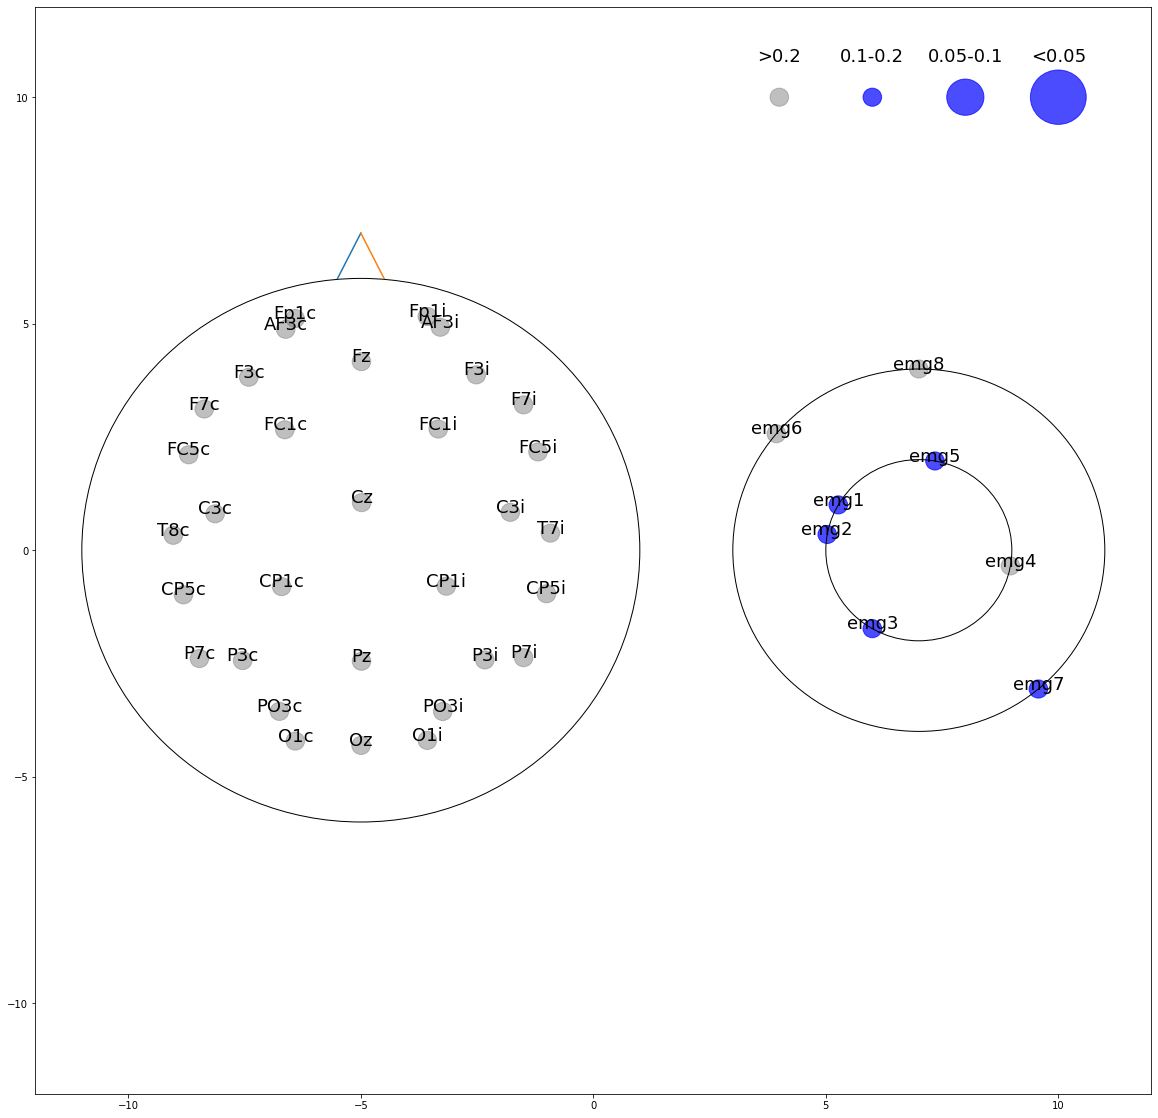

In [81]:
#visualisation

#redefinition
EMGs=[EMGChannel(2,150,'emg1'),EMGChannel(2,170,'emg2'),EMGChannel(2, 240,'emg3'),EMGChannel(2,350,'emg4'),
      EMGChannel(2, 80,'emg5'),EMGChannel(4,140,'emg6'),EMGChannel(4, 310,'emg7'),
      EMGChannel(4,90,'emg8')]

EEGs = [EEGChannel(x=epochs_hybrid.info['chs'][epochs_hybrid.info['ch_names'].index(chs_list_preImage_rParetic[chs_list_image.index(ch)])]['loc'][0]*50,
           y=epochs_hybrid.info['chs'][epochs_hybrid.info['ch_names'].index(chs_list_preImage_rParetic[chs_list_image.index(ch)])]['loc'][1]*50,
           name=ch) for ch in chs_list_image[:32]] 

pvalue_levels = [0.2,0.1,0.05]
def radiusBasedOnP (pvalue, defaultR=0.2):
    radius = None
    for level_idx in range(len(pvalue_levels)):
        if pvalue <= pvalue_levels[level_idx]:
            if radius == None:
                radius = defaultR
            else: 
                radius += defaultR
        else:
            return radius
    return radius


fig,ax = plt.subplots(figsize=(20, 20))
ax = plt.gca()
# EEG
center=[-5,0]
radius=6
circle = plt.Circle((center[0],center[1]),radius,fill = False)
ax.plot([center[0]-0.5,center[0]],[radius+center[1],radius+center[1]+1])
ax.plot([center[0]+0.5,center[0]],[radius+center[1],radius+center[1]+1])
ax.add_artist(circle)
#EEG_chs
for EEG in EEGs:
    radius = radiusBasedOnP(p_clusteringC_weight[EEG.name])
    if radius == None:
        circle = plt.Circle((center[0]+EEG.x, center[1]+EEG.y), radius=0.2,fill = True, color = 'grey',alpha=0.5)
    else:
        circle = plt.Circle((center[0]+EEG.x, center[1]+EEG.y), radius=radius,fill = True, color = 'blue',alpha=0.7)
    ax.add_patch(circle)
    label = ax.annotate(EEG.name, xy=(center[0]+EEG.x, center[1]+EEG.y), fontsize=18, color ='black', ha="center")

#EMG
center=[7,0]
for i in range(2):
    circle = plt.Circle((center[0],center[1]), 2*(i+1),fill = False)
    ax.add_artist(circle)
#EMG_chs
for EMG in EMGs:
    radius = radiusBasedOnP(p_clusteringC_weight[EMG.name])
    if radius == None:
        circle = plt.Circle((center[0]+EMG.x, center[1]+EMG.y), radius=0.2,fill = True, color = 'grey',alpha=0.5)
    else:
        circle = plt.Circle((center[0]+EMG.x, center[1]+EMG.y), radius=radius,fill = True, color = 'blue',alpha=0.7)
    ax.add_patch(circle)
    label = ax.annotate(EMG.name, xy=(center[0]+EMG.x, center[1]+EMG.y), fontsize=18, color ='black', ha="center")
    
plt.xlim(-12,12)
plt.ylim(-12,12)


circle = plt.Circle((4,10), radius=0.2,fill = True, color = 'grey',alpha=0.5)
ax.add_patch(circle)
ax.annotate('>'+str(pvalue_levels[0]), xy=(4,10.8), fontsize=18, color ='black', ha="center")
increment = 0
for pvalue_level in pvalue_levels[1:]:
    increment+=1
    circle = plt.Circle((4+increment*2,10), radius=0.2*increment,fill = True, color = 'blue',alpha=0.7)
    ax.add_patch(circle)
    ax.annotate(str(pvalue_levels[increment])+'-'+str(pvalue_levels[increment-1]),
                xy=(4+increment*2,10.8), fontsize=18, color ='black', ha="center")
    
increment+=1    
circle = plt.Circle((4+2*increment,10), radius=0.2*increment,fill = True, color = 'blue',alpha=0.7)
ax.add_patch(circle)
ax.annotate('<'+str(pvalue_levels[-1]), xy=(4+2*increment,10.8), 
            fontsize=18, color ='black', ha="center")

# save fig
# fName = os.path.join(strokeVsHealthy_results_dir,'betweenness_centrality_topo.eps')
# plt.savefig(fName)

### step 2-10 closeness vitality

In [82]:
p_closeness_vitality = {key:None for key in chs_list_image}
list_gProperties =['Fp1i_closeness_vitality', 'AF3i_closeness_vitality', 'F3i_closeness_vitality',
                   'F7i_closeness_vitality', 'FC1i_closeness_vitality', 'FC5i_closeness_vitality',
                   'C3i_closeness_vitality', 'T7i_closeness_vitality', 'CP1i_closeness_vitality',
                   'CP5i_closeness_vitality', 'P3i_closeness_vitality', 'P7i_closeness_vitality',
                   'PO3i_closeness_vitality', 'O1i_closeness_vitality', 'Fz_closeness_vitality',
                   'Cz_closeness_vitality', 'Pz_closeness_vitality', 'Oz_closeness_vitality',
                   'Fp1c_closeness_vitality', 'AF3c_closeness_vitality', 'F3c_closeness_vitality', 
                   'F7c_closeness_vitality', 'FC1c_closeness_vitality', 'FC5c_closeness_vitality', 
                   'C3c_closeness_vitality', 'T8c_closeness_vitality', 'CP1c_closeness_vitality', 
                   'CP5c_closeness_vitality', 'P3c_closeness_vitality', 'P7c_closeness_vitality',
                   'PO3c_closeness_vitality', 'O1c_closeness_vitality','emg1_closeness_vitality',
                   'emg2_closeness_vitality','emg3_closeness_vitality','emg4_closeness_vitality',
                   'emg5_closeness_vitality','emg6_closeness_vitality','emg7_closeness_vitality',
                   'emg8_closeness_vitality'] 
for gProperty in list_gProperties:    
    t_stat,pvalue = scipy.stats.ttest_ind((df_betweenGroup[df_betweenGroup['group']=='stroke'])[gProperty],
                          (df_betweenGroup[df_betweenGroup['group']=='healthy'])[gProperty], equal_var=False)
    cohen_s_d = round(cohend((df_betweenGroup[df_betweenGroup['group']=='stroke'])[gProperty],
                 (df_betweenGroup[df_betweenGroup['group']=='healthy'])[gProperty]),2)
    p_closeness_vitality[gProperty.split('_')[0]]=pvalue
    print(gProperty + ": pvalue = {}, cohen's d = {}, t_stat = {}".format(round(pvalue,2),cohen_s_d,round(t_stat,2)))
    

Fp1i_closeness_vitality: pvalue = 0.36, cohen's d = -0.54, t_stat = -0.97
AF3i_closeness_vitality: pvalue = 0.73, cohen's d = 0.23, t_stat = 0.36
F3i_closeness_vitality: pvalue = 0.52, cohen's d = -0.38, t_stat = -0.68
F7i_closeness_vitality: pvalue = 0.72, cohen's d = -0.22, t_stat = -0.37
FC1i_closeness_vitality: pvalue = 0.24, cohen's d = -0.72, t_stat = -1.28
FC5i_closeness_vitality: pvalue = 0.21, cohen's d = -0.76, t_stat = -1.39
C3i_closeness_vitality: pvalue = 0.88, cohen's d = -0.09, t_stat = -0.15
T7i_closeness_vitality: pvalue = 0.14, cohen's d = -0.96, t_stat = -1.63
CP1i_closeness_vitality: pvalue = 0.05, cohen's d = -1.27, t_stat = -2.28
CP5i_closeness_vitality: pvalue = 0.16, cohen's d = -0.87, t_stat = -1.61
P3i_closeness_vitality: pvalue = 0.01, cohen's d = -1.85, t_stat = -3.43
P7i_closeness_vitality: pvalue = 0.03, cohen's d = -1.44, t_stat = -2.67
PO3i_closeness_vitality: pvalue = 0.16, cohen's d = -0.89, t_stat = -1.54
O1i_closeness_vitality: pvalue = 0.06, cohen's

d:\software\1python3.75amd64\envs\eegemg\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
d:\software\1python3.75amd64\envs\eegemg\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Text(10, 10.8, '<0.05')

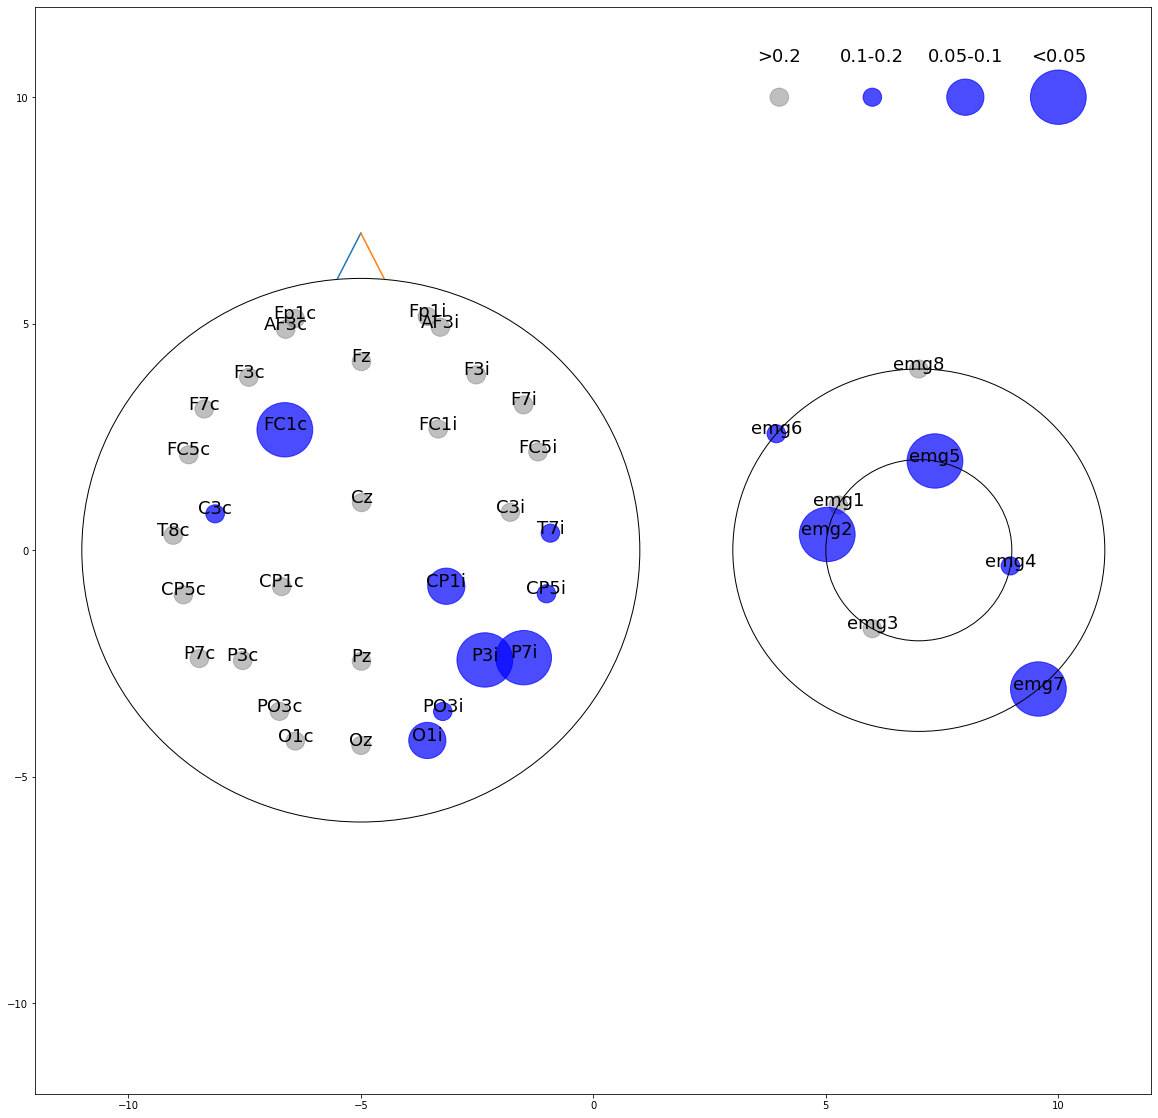

In [83]:
#visualisation
pvalue_levels = [0.2,0.1,0.05]
def radiusBasedOnP (pvalue, defaultR=0.2):
    radius = None
    for level_idx in range(len(pvalue_levels)):
        if pvalue <= pvalue_levels[level_idx]:
            if radius == None:
                radius = defaultR
            else: 
                radius += defaultR
        else:
            return radius
    return radius


fig,ax = plt.subplots(figsize=(20, 20))
ax = plt.gca()
# EEG
center=[-5,0]
radius=6
circle = plt.Circle((center[0],center[1]),radius,fill = False)
ax.plot([center[0]-0.5,center[0]],[radius+center[1],radius+center[1]+1])
ax.plot([center[0]+0.5,center[0]],[radius+center[1],radius+center[1]+1])
ax.add_artist(circle)
#EEG_chs
for EEG in EEGs:
    radius = radiusBasedOnP(p_closeness_vitality[EEG.name])
    if radius == None:
        circle = plt.Circle((center[0]+EEG.x, center[1]+EEG.y), radius=0.2,fill = True, color = 'grey',alpha=0.5)
    else:
        circle = plt.Circle((center[0]+EEG.x, center[1]+EEG.y), radius=radius,fill = True, color = 'blue',alpha=0.7)
    ax.add_patch(circle)
    label = ax.annotate(EEG.name, xy=(center[0]+EEG.x, center[1]+EEG.y), fontsize=18, color ='black', ha="center")

#EMG
center=[7,0]
for i in range(2):
    circle = plt.Circle((center[0],center[1]), 2*(i+1),fill = False)
    ax.add_artist(circle)
#EMG_chs
for EMG in EMGs:
    radius = radiusBasedOnP(p_closeness_vitality[EMG.name])
    if radius == None:
        circle = plt.Circle((center[0]+EMG.x, center[1]+EMG.y), radius=0.2,fill = True, color = 'grey',alpha=0.5)
    else:
        circle = plt.Circle((center[0]+EMG.x, center[1]+EMG.y), radius=radius,fill = True, color = 'blue',alpha=0.7)
    ax.add_patch(circle)
    label = ax.annotate(EMG.name, xy=(center[0]+EMG.x, center[1]+EMG.y), fontsize=18, color ='black', ha="center")
    
plt.xlim(-12,12)
plt.ylim(-12,12)


circle = plt.Circle((4,10), radius=0.2,fill = True, color = 'grey',alpha=0.5)
ax.add_patch(circle)
ax.annotate('>'+str(pvalue_levels[0]), xy=(4,10.8), fontsize=18, color ='black', ha="center")
increment = 0
for pvalue_level in pvalue_levels[1:]:
    increment+=1
    circle = plt.Circle((4+increment*2,10), radius=0.2*increment,fill = True, color = 'blue',alpha=0.7)
    ax.add_patch(circle)
    ax.annotate(str(pvalue_levels[increment])+'-'+str(pvalue_levels[increment-1]),
                xy=(4+increment*2,10.8), fontsize=18, color ='black', ha="center")
    
increment+=1    
circle = plt.Circle((4+2*increment,10), radius=0.2*increment,fill = True, color = 'blue',alpha=0.7)
ax.add_patch(circle)
ax.annotate('<'+str(pvalue_levels[-1]), xy=(4+2*increment,10.8), 
            fontsize=18, color ='black', ha="center")

# save fig
# fName = os.path.join(strokeVsHealthy_results_dir,'betweenness_centrality_topo.eps')
# plt.savefig(fName)

### step 2-11 closeness_vitality_weight

In [84]:
p_closeness_vitality_weight = {key:None for key in chs_list_image}
list_gProperties =['Fp1i_closeness_vitality_weight', 'AF3i_closeness_vitality_weight', 'F3i_closeness_vitality_weight',
                   'F7i_closeness_vitality_weight', 'FC1i_closeness_vitality_weight', 'FC5i_closeness_vitality_weight',
                   'C3i_closeness_vitality_weight', 'T7i_closeness_vitality_weight', 'CP1i_closeness_vitality_weight',
                   'CP5i_closeness_vitality_weight', 'P3i_closeness_vitality', 'P7i_closeness_vitality_weight',
                   'PO3i_closeness_vitality_weight', 'O1i_closeness_vitality', 'Fz_closeness_vitality_weight',
                   'Cz_closeness_vitality_weight', 'Pz_closeness_vitality_weight', 'Oz_closeness_vitality_weight',
                   'Fp1c_closeness_vitality_weight', 'AF3c_closeness_vitality_weight', 'F3c_closeness_vitality_weight', 
                   'F7c_closeness_vitality_weight', 'FC1c_closeness_vitality_weight', 'FC5c_closeness_vitality_weight', 
                   'C3c_closeness_vitality_weight', 'T8c_closeness_vitality_weight', 'CP1c_closeness_vitality_weight', 
                   'CP5c_closeness_vitality_weight', 'P3c_closeness_vitality_weight', 'P7c_closeness_vitality_weight',
                   'PO3c_closeness_vitality_weight', 'O1c_closeness_vitality_weight','emg1_closeness_vitality_weight',
                   'emg2_closeness_vitality_weight','emg3_closeness_vitality_weight','emg4_closeness_vitality_weight',
                   'emg5_closeness_vitality_weight','emg6_closeness_vitality_weight','emg7_closeness_vitality_weight',
                   'emg8_closeness_vitality_weight'] 
for gProperty in list_gProperties:    
    t_stat,pvalue = scipy.stats.ttest_ind((df_betweenGroup[df_betweenGroup['group']=='stroke'])[gProperty],
                          (df_betweenGroup[df_betweenGroup['group']=='healthy'])[gProperty], equal_var=False)
    cohen_s_d = round(cohend((df_betweenGroup[df_betweenGroup['group']=='stroke'])[gProperty],
                 (df_betweenGroup[df_betweenGroup['group']=='healthy'])[gProperty]),2)
    p_closeness_vitality_weight[gProperty.split('_')[0]]=pvalue
    print(gProperty + ": pvalue = {}, cohen's d = {}, t_stat = {}".format(round(pvalue,2),cohen_s_d,round(t_stat,2)))
    

Fp1i_closeness_vitality_weight: pvalue = 0.55, cohen's d = -0.38, t_stat = -0.62
AF3i_closeness_vitality_weight: pvalue = 0.79, cohen's d = -0.22, t_stat = -0.28
F3i_closeness_vitality_weight: pvalue = 0.75, cohen's d = -0.25, t_stat = -0.34
F7i_closeness_vitality_weight: pvalue = 0.23, cohen's d = -0.89, t_stat = -1.34
FC1i_closeness_vitality_weight: pvalue = 0.18, cohen's d = -0.82, t_stat = -1.51
FC5i_closeness_vitality_weight: pvalue = 0.11, cohen's d = -1.07, t_stat = -1.79
C3i_closeness_vitality_weight: pvalue = 0.77, cohen's d = 0.22, t_stat = 0.31
T7i_closeness_vitality_weight: pvalue = 0.62, cohen's d = -0.36, t_stat = -0.53
CP1i_closeness_vitality_weight: pvalue = 0.05, cohen's d = -1.31, t_stat = -2.42
CP5i_closeness_vitality_weight: pvalue = 0.08, cohen's d = -1.14, t_stat = -2.03
P3i_closeness_vitality: pvalue = 0.01, cohen's d = -1.85, t_stat = -3.43
P7i_closeness_vitality_weight: pvalue = 0.36, cohen's d = -0.53, t_stat = -0.98
PO3i_closeness_vitality_weight: pvalue = 0.

Text(10, 10.8, '<0.05')

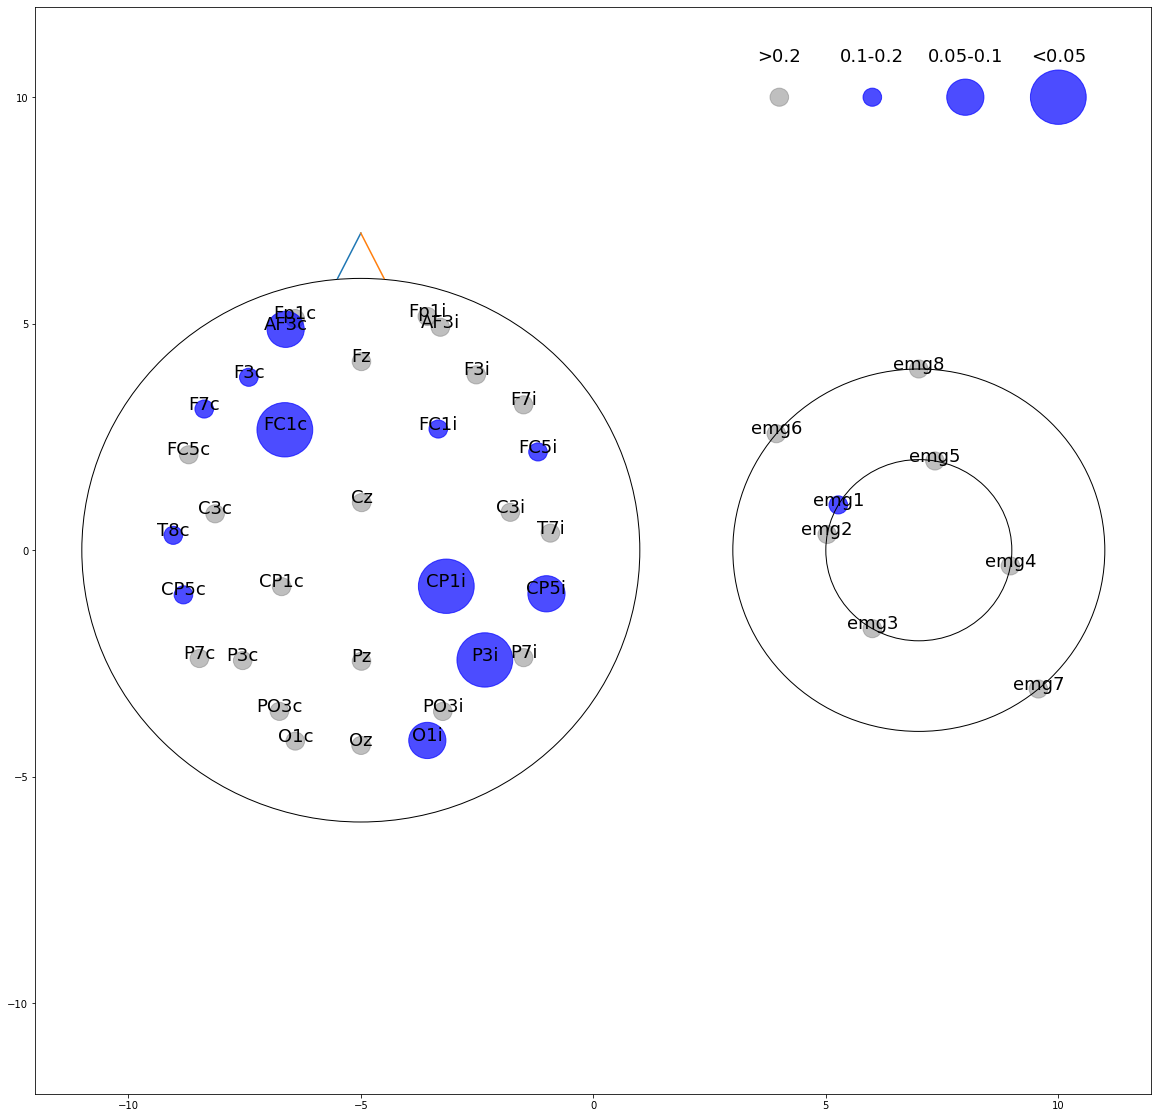

In [85]:
#visualisation
pvalue_levels = [0.2,0.1,0.05]
def radiusBasedOnP (pvalue, defaultR=0.2):
    radius = None
    for level_idx in range(len(pvalue_levels)):
        if pvalue <= pvalue_levels[level_idx]:
            if radius == None:
                radius = defaultR
            else: 
                radius += defaultR
        else:
            return radius
    return radius


fig,ax = plt.subplots(figsize=(20, 20))
ax = plt.gca()
# EEG
center=[-5,0]
radius=6
circle = plt.Circle((center[0],center[1]),radius,fill = False)
ax.plot([center[0]-0.5,center[0]],[radius+center[1],radius+center[1]+1])
ax.plot([center[0]+0.5,center[0]],[radius+center[1],radius+center[1]+1])
ax.add_artist(circle)
#EEG_chs
for EEG in EEGs:
    radius = radiusBasedOnP(p_closeness_vitality_weight[EEG.name])
    if radius == None:
        circle = plt.Circle((center[0]+EEG.x, center[1]+EEG.y), radius=0.2,fill = True, color = 'grey',alpha=0.5)
    else:
        circle = plt.Circle((center[0]+EEG.x, center[1]+EEG.y), radius=radius,fill = True, color = 'blue',alpha=0.7)
    ax.add_patch(circle)
    label = ax.annotate(EEG.name, xy=(center[0]+EEG.x, center[1]+EEG.y), fontsize=18, color ='black', ha="center")

#EMG
center=[7,0]
for i in range(2):
    circle = plt.Circle((center[0],center[1]), 2*(i+1),fill = False)
    ax.add_artist(circle)
#EMG_chs
for EMG in EMGs:
    radius = radiusBasedOnP(p_closeness_vitality_weight[EMG.name])
    if radius == None:
        circle = plt.Circle((center[0]+EMG.x, center[1]+EMG.y), radius=0.2,fill = True, color = 'grey',alpha=0.5)
    else:
        circle = plt.Circle((center[0]+EMG.x, center[1]+EMG.y), radius=radius,fill = True, color = 'blue',alpha=0.7)
    ax.add_patch(circle)
    label = ax.annotate(EMG.name, xy=(center[0]+EMG.x, center[1]+EMG.y), fontsize=18, color ='black', ha="center")
    
plt.xlim(-12,12)
plt.ylim(-12,12)


circle = plt.Circle((4,10), radius=0.2,fill = True, color = 'grey',alpha=0.5)
ax.add_patch(circle)
ax.annotate('>'+str(pvalue_levels[0]), xy=(4,10.8), fontsize=18, color ='black', ha="center")
increment = 0
for pvalue_level in pvalue_levels[1:]:
    increment+=1
    circle = plt.Circle((4+increment*2,10), radius=0.2*increment,fill = True, color = 'blue',alpha=0.7)
    ax.add_patch(circle)
    ax.annotate(str(pvalue_levels[increment])+'-'+str(pvalue_levels[increment-1]),
                xy=(4+increment*2,10.8), fontsize=18, color ='black', ha="center")
    
increment+=1    
circle = plt.Circle((4+2*increment,10), radius=0.2*increment,fill = True, color = 'blue',alpha=0.7)
ax.add_patch(circle)
ax.annotate('<'+str(pvalue_levels[-1]), xy=(4+2*increment,10.8), 
            fontsize=18, color ='black', ha="center")

# save fig
# fName = os.path.join(strokeVsHealthy_results_dir,'betweenness_centrality_topo.eps')
# plt.savefig(fName)

### step 2-12: cost_closeness_vitality_weight

In [87]:
p_cost_closeness_vitality_weight = {key:None for key in chs_list_image}
list_gProperties =['Fp1i_cost_closeness_vitality_weight', 'AF3i_cost_closeness_vitality_weight', 
                   'F3i_cost_closeness_vitality_weight',
                   'F7i_cost_closeness_vitality_weight', 'FC1i_cost_closeness_vitality_weight', 
                   'FC5i_cost_closeness_vitality_weight',
                   'C3i_cost_closeness_vitality_weight', 'T7i_cost_closeness_vitality_weight', 
                   'CP1i_cost_closeness_vitality_weight',
                   'CP5i_cost_closeness_vitality_weight', 'P3i_cost_closeness_vitality_weight', 
                   'P7i_cost_closeness_vitality_weight',
                   'PO3i_cost_closeness_vitality_weight', 'O1i_cost_closeness_vitality_weight', 
                   'Fz_cost_closeness_vitality_weight',
                   'Cz_cost_closeness_vitality_weight', 'Pz_cost_closeness_vitality_weight', 
                   'Oz_cost_closeness_vitality_weight',
                   'Fp1c_cost_closeness_vitality_weight', 'AF3c_cost_closeness_vitality_weight', 
                   'F3c_cost_closeness_vitality_weight', 
                   'F7c_cost_closeness_vitality_weight', 'FC1c_cost_closeness_vitality_weight', 
                   'FC5c_cost_closeness_vitality_weight', 
                   'C3c_cost_closeness_vitality_weight', 'T8c_cost_closeness_vitality_weight',
                   'CP1c_cost_closeness_vitality_weight', 
                   'CP5c_cost_closeness_vitality_weight', 'P3c_cost_closeness_vitality_weight', 
                   'P7c_cost_closeness_vitality_weight',
                   'PO3c_cost_closeness_vitality_weight', 'O1c_cost_closeness_vitality_weight',
                   'emg1_cost_closeness_vitality_weight',
                   'emg2_cost_closeness_vitality_weight','emg3_cost_closeness_vitality_weight',
                   'emg4_cost_closeness_vitality_weight',
                   'emg5_cost_closeness_vitality_weight','emg6_cost_closeness_vitality_weight',
                   'emg7_cost_closeness_vitality_weight',
                   'emg8_cost_closeness_vitality_weight'] 
for gProperty in list_gProperties:    
    t_stat,pvalue = scipy.stats.ttest_ind((df_betweenGroup[df_betweenGroup['group']=='stroke'])[gProperty],
                          (df_betweenGroup[df_betweenGroup['group']=='healthy'])[gProperty], equal_var=False)
    cohen_s_d = round(cohend((df_betweenGroup[df_betweenGroup['group']=='stroke'])[gProperty],
                 (df_betweenGroup[df_betweenGroup['group']=='healthy'])[gProperty]),2)
    p_cost_closeness_vitality_weight[gProperty.split('_')[0]]=pvalue
    print(gProperty + ": pvalue = {}, cohen's d = {}, t_stat = {}".format(round(pvalue,2),cohen_s_d,round(t_stat,2)))
    

Fp1i_cost_closeness_vitality_weight: pvalue = 0.46, cohen's d = 0.42, t_stat = 0.78
AF3i_cost_closeness_vitality_weight: pvalue = 0.79, cohen's d = 0.17, t_stat = 0.28
F3i_cost_closeness_vitality_weight: pvalue = 0.48, cohen's d = 0.42, t_stat = 0.75
F7i_cost_closeness_vitality_weight: pvalue = 0.73, cohen's d = -0.24, t_stat = -0.36
FC1i_cost_closeness_vitality_weight: pvalue = 0.37, cohen's d = 0.5, t_stat = 0.97
FC5i_cost_closeness_vitality_weight: pvalue = 0.63, cohen's d = 0.33, t_stat = 0.5
C3i_cost_closeness_vitality_weight: pvalue = 0.58, cohen's d = 0.35, t_stat = 0.57
T7i_cost_closeness_vitality_weight: pvalue = 0.95, cohen's d = 0.05, t_stat = 0.07
CP1i_cost_closeness_vitality_weight: pvalue = 0.4, cohen's d = 0.61, t_stat = 0.92
CP5i_cost_closeness_vitality_weight: pvalue = 0.54, cohen's d = 0.44, t_stat = 0.66
P3i_cost_closeness_vitality_weight: pvalue = 0.28, cohen's d = 0.73, t_stat = 1.16
P7i_cost_closeness_vitality_weight: pvalue = 0.49, cohen's d = -0.51, t_stat = -0.

Text(10, 10.8, '<0.05')

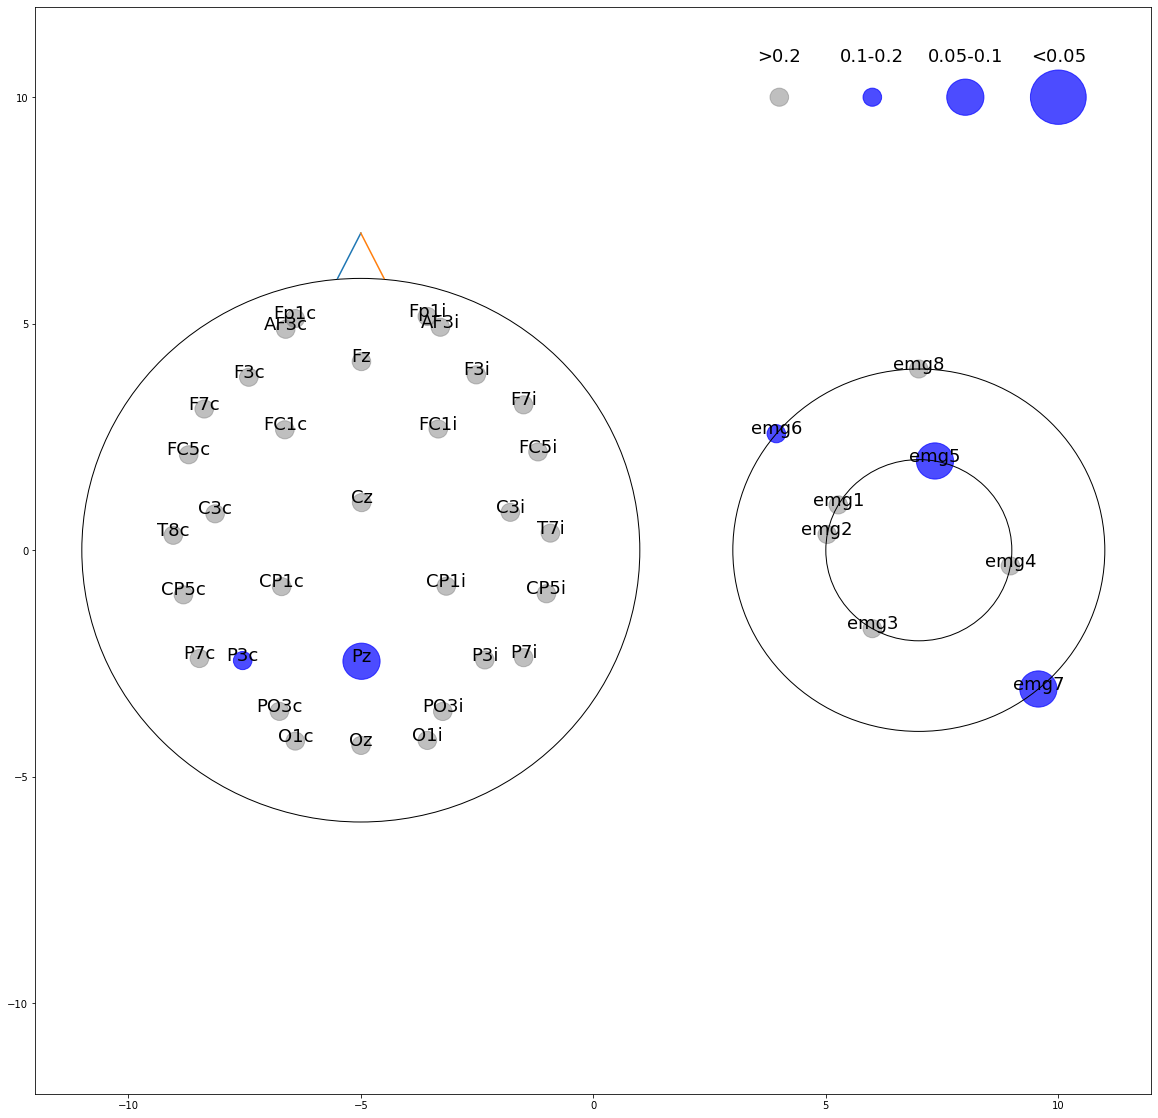

In [88]:
#visualisation
pvalue_levels = [0.2,0.1,0.05]
def radiusBasedOnP (pvalue, defaultR=0.2):
    radius = None
    for level_idx in range(len(pvalue_levels)):
        if pvalue <= pvalue_levels[level_idx]:
            if radius == None:
                radius = defaultR
            else: 
                radius += defaultR
        else:
            return radius
    return radius


fig,ax = plt.subplots(figsize=(20, 20))
ax = plt.gca()
# EEG
center=[-5,0]
radius=6
circle = plt.Circle((center[0],center[1]),radius,fill = False)
ax.plot([center[0]-0.5,center[0]],[radius+center[1],radius+center[1]+1])
ax.plot([center[0]+0.5,center[0]],[radius+center[1],radius+center[1]+1])
ax.add_artist(circle)
#EEG_chs
for EEG in EEGs:
    radius = radiusBasedOnP(p_cost_closeness_vitality_weight[EEG.name])
    if radius == None:
        circle = plt.Circle((center[0]+EEG.x, center[1]+EEG.y), radius=0.2,fill = True, color = 'grey',alpha=0.5)
    else:
        circle = plt.Circle((center[0]+EEG.x, center[1]+EEG.y), radius=radius,fill = True, color = 'blue',alpha=0.7)
    ax.add_patch(circle)
    label = ax.annotate(EEG.name, xy=(center[0]+EEG.x, center[1]+EEG.y), fontsize=18, color ='black', ha="center")

#EMG
center=[7,0]
for i in range(2):
    circle = plt.Circle((center[0],center[1]), 2*(i+1),fill = False)
    ax.add_artist(circle)
#EMG_chs
for EMG in EMGs:
    radius = radiusBasedOnP(p_cost_closeness_vitality_weight[EMG.name])
    if radius == None:
        circle = plt.Circle((center[0]+EMG.x, center[1]+EMG.y), radius=0.2,fill = True, color = 'grey',alpha=0.5)
    else:
        circle = plt.Circle((center[0]+EMG.x, center[1]+EMG.y), radius=radius,fill = True, color = 'blue',alpha=0.7)
    ax.add_patch(circle)
    label = ax.annotate(EMG.name, xy=(center[0]+EMG.x, center[1]+EMG.y), fontsize=18, color ='black', ha="center")
    
plt.xlim(-12,12)
plt.ylim(-12,12)


circle = plt.Circle((4,10), radius=0.2,fill = True, color = 'grey',alpha=0.5)
ax.add_patch(circle)
ax.annotate('>'+str(pvalue_levels[0]), xy=(4,10.8), fontsize=18, color ='black', ha="center")
increment = 0
for pvalue_level in pvalue_levels[1:]:
    increment+=1
    circle = plt.Circle((4+increment*2,10), radius=0.2*increment,fill = True, color = 'blue',alpha=0.7)
    ax.add_patch(circle)
    ax.annotate(str(pvalue_levels[increment])+'-'+str(pvalue_levels[increment-1]),
                xy=(4+increment*2,10.8), fontsize=18, color ='black', ha="center")
    
increment+=1    
circle = plt.Circle((4+2*increment,10), radius=0.2*increment,fill = True, color = 'blue',alpha=0.7)
ax.add_patch(circle)
ax.annotate('<'+str(pvalue_levels[-1]), xy=(4+2*increment,10.8), 
            fontsize=18, color ='black', ha="center")

# save fig
# fName = os.path.join(strokeVsHealthy_results_dir,'betweenness_centrality_topo.eps')
# plt.savefig(fName)

### step 2-8: group centrality

In [24]:
p_groupC = {key:None for key in chs_list_image}
list_gProperties =['ipsiH_betweennessC','ipsiH_degreeC','ipsiH_closenessC','ipsiH_cost_betweennessC',
                   'ipsiH_cost_closenessC',
                   'contraH_betweennessC','contraH_degreeC','contraH_closenessC','contraH_cost_betweennessC',
                   'contraH_cost_closenessC',
                  'forearm_betweennessC','forearm_degreeC','forearm_closenessC','forearm_cost_betweennessC',
                   'forearm_cost_closenessC',
                  'arm_betweennessC','arm_degreeC','arm_closenessC','arm_cost_betweennessC',
                   'arm_cost_closenessC',
                  'ipsiF_betweennessC','ipsiF_degreeC','ipsiF_closenessC','ipsiF_cost_betweennessC',
                   'ipsiF_cost_closenessC',
                  'ipsiMotor_betweennessC','ipsiMotor_degreeC','ipsiMotor_closenessC','ipsiMotor_cost_betweennessC',
                   'ipsiMotor_cost_closenessC',
                  'ipsiPO_betweennessC','ipsiPO_degreeC','ipsiPO_closenessC','ipsiPO_cost_betweennessC',
                   'ipsiPO_cost_closenessC',
                  'mesial_betweennessC','mesial_degreeC','mesial_closenessC','mesial_cost_betweennessC',
                   'mesial_cost_closenessC',
                  'contraF_betweennessC','contraF_degreeC','contraF_closenessC','contraF_cost_betweennessC',
                   'contraF_cost_closenessC',
                  'contraMotor_betweennessC','contraMotor_degreeC','contraMotor_closenessC',
                   'contraMotor_cost_betweennessC','contraMotor_cost_closenessC',
                  'contraPO_betweennessC','contraPO_degreeC','contraPO_closenessC','contraPO_cost_betweennessC',
                   'contraPO_cost_closenessC',] 
for gProperty in list_gProperties:    
    t_stat,pvalue = scipy.stats.ttest_ind((df_betweenGroup[df_betweenGroup['group']=='stroke'])[gProperty],
                          (df_betweenGroup[df_betweenGroup['group']=='healthy'])[gProperty], equal_var=False)
    cohen_s_d = round(cohend((df_betweenGroup[df_betweenGroup['group']=='stroke'])[gProperty],
                 (df_betweenGroup[df_betweenGroup['group']=='healthy'])[gProperty]),2)
    p_groupC[gProperty]=pvalue
    print(gProperty + ": pvalue = {}, cohen's d = {}, t_stat = {}".format(round(pvalue,2),cohen_s_d,round(t_stat,2)))
    

ipsiH_betweennessC: pvalue = 0.38, cohen's d = -0.47, t_stat = -0.91
ipsiH_degreeC: pvalue = 0.14, cohen's d = 1.1, t_stat = 1.75
ipsiH_closenessC: pvalue = 0.44, cohen's d = 0.41, t_stat = 0.81
ipsiH_cost_betweennessC: pvalue = 0.38, cohen's d = -0.47, t_stat = -0.91
ipsiH_cost_closenessC: pvalue = 0.44, cohen's d = 0.41, t_stat = 0.81
contraH_betweennessC: pvalue = 0.44, cohen's d = 0.41, t_stat = 0.8
contraH_degreeC: pvalue = 0.2, cohen's d = 0.93, t_stat = 1.46
contraH_closenessC: pvalue = 0.13, cohen's d = 0.81, t_stat = 1.69
contraH_cost_betweennessC: pvalue = 0.44, cohen's d = 0.41, t_stat = 0.8
contraH_cost_closenessC: pvalue = 0.13, cohen's d = 0.81, t_stat = 1.69
forearm_betweennessC: pvalue = 0.79, cohen's d = 0.15, t_stat = 0.27
forearm_degreeC: pvalue = 0.11, cohen's d = 1.22, t_stat = 1.96
forearm_closenessC: pvalue = 0.28, cohen's d = 0.72, t_stat = 1.18
forearm_cost_betweennessC: pvalue = 0.79, cohen's d = 0.15, t_stat = 0.27
forearm_cost_closenessC: pvalue = 0.28, cohe

Text(10, 10.8, '<0.01')

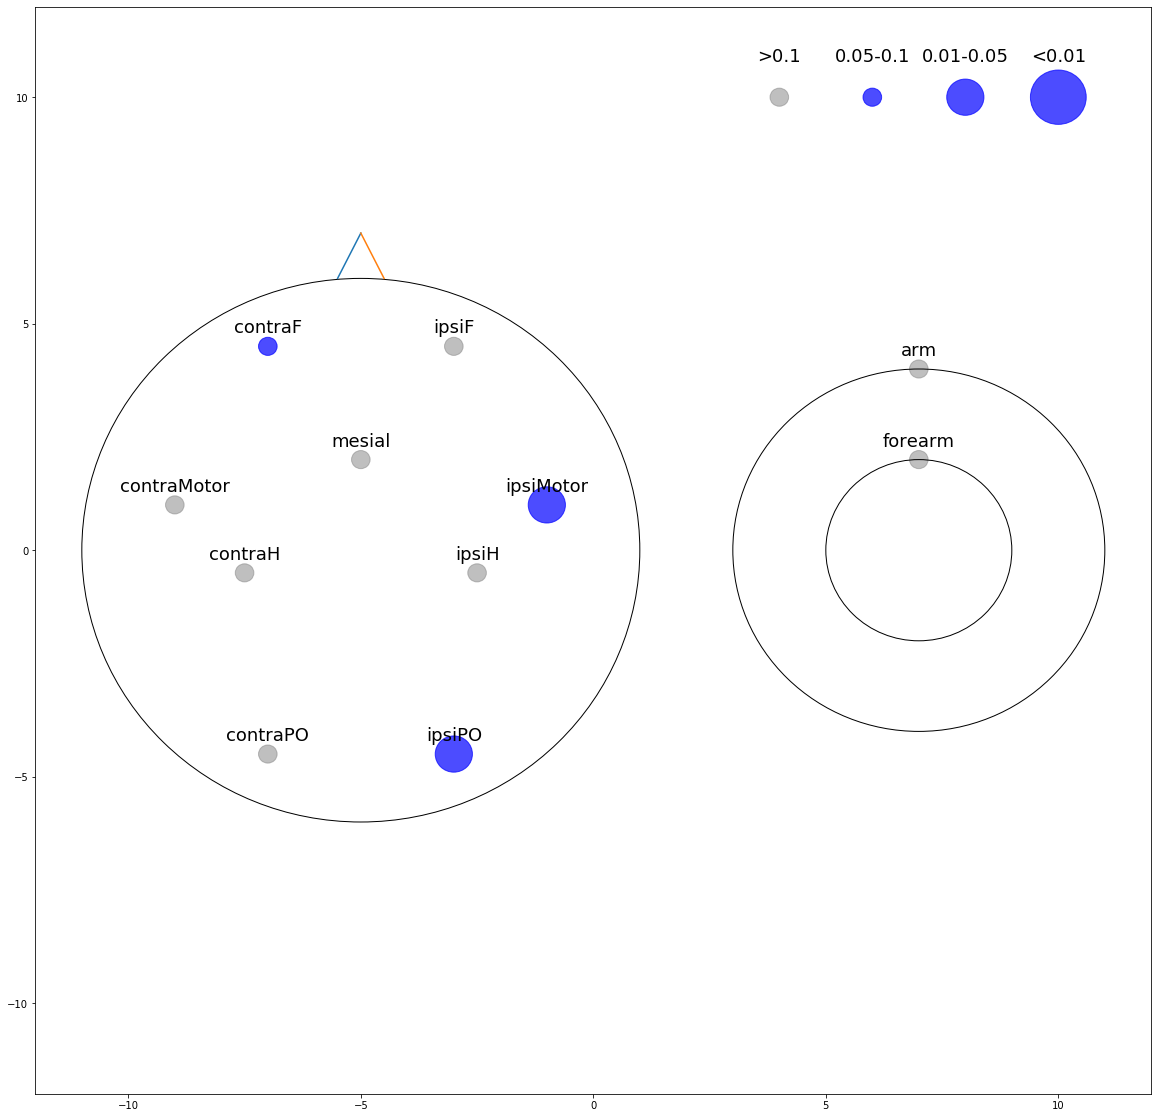

In [26]:
#visualisation - degreeC
pvalue_levels = [0.1,0.05,0.01]
def radiusBasedOnP (pvalue, defaultR=0.2):
    radius = None
    for level_idx in range(len(pvalue_levels)):
        if pvalue <= pvalue_levels[level_idx]:
            if radius == None:
                radius = defaultR
            else: 
                radius += defaultR
        else:
            return radius
    return radius


fig,ax = plt.subplots(figsize=(20, 20))
ax = plt.gca()
# EEG_group
center=[-5,0]
radius=6
circle = plt.Circle((center[0],center[1]),radius,fill = False)
ax.plot([center[0]-0.5,center[0]],[radius+center[1],radius+center[1]+1])
ax.plot([center[0]+0.5,center[0]],[radius+center[1],radius+center[1]+1])
ax.add_artist(circle)
#EEG_chs

EMGs=[EMGChannel(2,90,'forearm'),EMGChannel(4,90,'arm')]

EEGs = [EEGChannel(x=-2, y=4.5, name = 'contraF'), EEGChannel(x=-4, y=1, name = 'contraMotor'), 
        EEGChannel(x=-2, y=-4.5, name = 'contraPO'), EEGChannel(x=0, y=2, name = 'mesial'),
       EEGChannel(x=2, y=4.5, name = 'ipsiF'),EEGChannel(x=4, y=1, name = 'ipsiMotor'),
       EEGChannel(x=2, y=-4.5, name = 'ipsiPO'),EEGChannel(x=2.5, y=-0.5, name = 'ipsiH'),
       EEGChannel(x=-2.5, y=-0.5, name = 'contraH')] 

for EEG in EEGs:
    radius = radiusBasedOnP(p_groupC[EEG.name+'_degreeC'])
    if radius == None:
        circle = plt.Circle((center[0]+EEG.x, center[1]+EEG.y), radius=0.2,fill = True, color = 'grey',alpha=0.5)
    else:
        circle = plt.Circle((center[0]+EEG.x, center[1]+EEG.y), radius=radius,fill = True, color = 'blue',alpha=0.7)
    ax.add_patch(circle)
    label = ax.annotate(EEG.name, xy=(center[0]+EEG.x, center[1]+EEG.y+0.3), fontsize=18, color ='black', ha="center")

#EMG
center=[7,0]
for i in range(2):
    circle = plt.Circle((center[0],center[1]), 2*(i+1),fill = False)
    ax.add_artist(circle)
#EMG_chs
for EMG in EMGs:
    radius = radiusBasedOnP(p_groupC[EMG.name+'_degreeC'])
    if radius == None:
        circle = plt.Circle((center[0]+EMG.x, center[1]+EMG.y), radius=0.2,fill = True, color = 'grey',alpha=0.5)
    else:
        circle = plt.Circle((center[0]+EMG.x, center[1]+EMG.y), radius=radius,fill = True, color = 'blue',alpha=0.7)
    ax.add_patch(circle)
    label = ax.annotate(EMG.name, xy=(center[0]+EMG.x, center[1]+EMG.y+0.3), fontsize=18, color ='black', ha="center")
    
plt.xlim(-12,12)
plt.ylim(-12,12)


circle = plt.Circle((4,10), radius=0.2,fill = True, color = 'grey',alpha=0.5)
ax.add_patch(circle)
ax.annotate('>'+str(pvalue_levels[0]), xy=(4,10.8), fontsize=18, color ='black', ha="center")
increment = 0
for pvalue_level in pvalue_levels[1:]:
    increment+=1
    circle = plt.Circle((4+increment*2,10), radius=0.2*increment,fill = True, color = 'blue',alpha=0.7)
    ax.add_patch(circle)
    ax.annotate(str(pvalue_levels[increment])+'-'+str(pvalue_levels[increment-1]),
                xy=(4+increment*2,10.8), fontsize=18, color ='black', ha="center")
    
increment+=1    
circle = plt.Circle((4+2*increment,10), radius=0.2*increment,fill = True, color = 'blue',alpha=0.7)
ax.add_patch(circle)
ax.annotate('<'+str(pvalue_levels[-1]), xy=(4+2*increment,10.8), 
            fontsize=18, color ='black', ha="center")

# save fig
# fName = os.path.join(strokeVsHealthy_results_dir,'group_degree_centrality_topo.eps')
# plt.savefig(fName)

Text(10, 10.8, '<0.05')

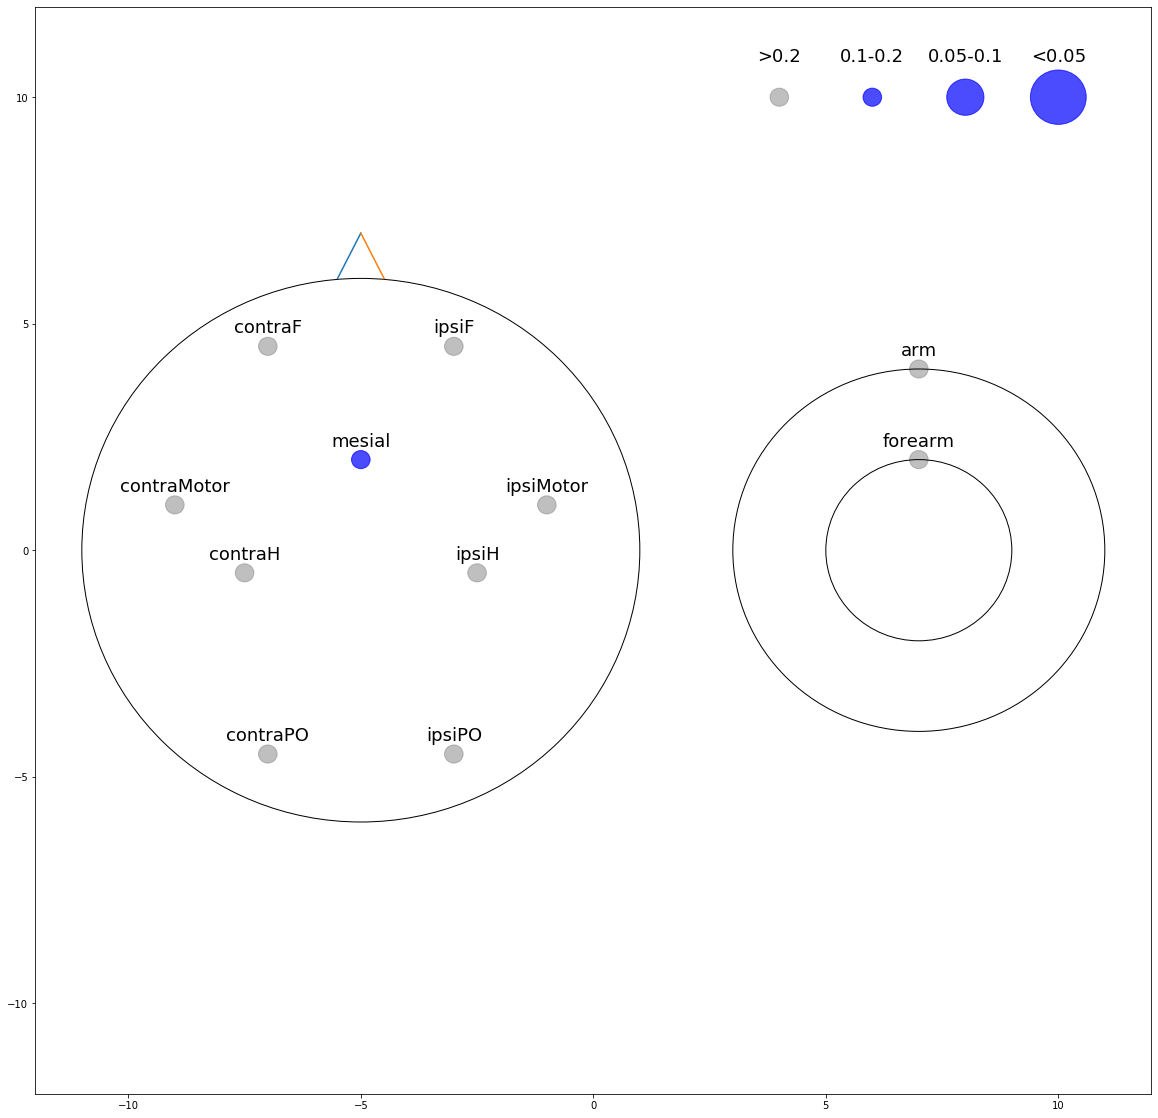

In [124]:
#visualisation - betweenness
pvalue_levels = [0.2,0.1,0.05]
def radiusBasedOnP (pvalue, defaultR=0.2):
    radius = None
    for level_idx in range(len(pvalue_levels)):
        if pvalue <= pvalue_levels[level_idx]:
            if radius == None:
                radius = defaultR
            else: 
                radius += defaultR
        else:
            return radius
    return radius


fig,ax = plt.subplots(figsize=(20, 20))
ax = plt.gca()
# EEG_group
center=[-5,0]
radius=6
circle = plt.Circle((center[0],center[1]),radius,fill = False)
ax.plot([center[0]-0.5,center[0]],[radius+center[1],radius+center[1]+1])
ax.plot([center[0]+0.5,center[0]],[radius+center[1],radius+center[1]+1])
ax.add_artist(circle)
#EEG_chs

EMGs=[EMGChannel(2,90,'forearm'),EMGChannel(4,90,'arm')]

EEGs = [EEGChannel(x=-2, y=4.5, name = 'contraF'), EEGChannel(x=-4, y=1, name = 'contraMotor'), 
        EEGChannel(x=-2, y=-4.5, name = 'contraPO'), EEGChannel(x=0, y=2, name = 'mesial'),
       EEGChannel(x=2, y=4.5, name = 'ipsiF'),EEGChannel(x=4, y=1, name = 'ipsiMotor'),
       EEGChannel(x=2, y=-4.5, name = 'ipsiPO'),EEGChannel(x=2.5, y=-0.5, name = 'ipsiH'),
       EEGChannel(x=-2.5, y=-0.5, name = 'contraH')] 

for EEG in EEGs:
    radius = radiusBasedOnP(p_groupC[EEG.name+'_betweennessC'])
    if radius == None:
        circle = plt.Circle((center[0]+EEG.x, center[1]+EEG.y), radius=0.2,fill = True, color = 'grey',alpha=0.5)
    else:
        circle = plt.Circle((center[0]+EEG.x, center[1]+EEG.y), radius=radius,fill = True, color = 'blue',alpha=0.7)
    ax.add_patch(circle)
    label = ax.annotate(EEG.name, xy=(center[0]+EEG.x, center[1]+EEG.y+0.3), fontsize=18, color ='black', ha="center")

#EMG
center=[7,0]
for i in range(2):
    circle = plt.Circle((center[0],center[1]), 2*(i+1),fill = False)
    ax.add_artist(circle)
#EMG_chs
for EMG in EMGs:
    radius = radiusBasedOnP(p_groupC[EMG.name+'_betweennessC'])
    if radius == None:
        circle = plt.Circle((center[0]+EMG.x, center[1]+EMG.y), radius=0.2,fill = True, color = 'grey',alpha=0.5)
    else:
        circle = plt.Circle((center[0]+EMG.x, center[1]+EMG.y), radius=radius,fill = True, color = 'blue',alpha=0.7)
    ax.add_patch(circle)
    label = ax.annotate(EMG.name, xy=(center[0]+EMG.x, center[1]+EMG.y+0.3), fontsize=18, color ='black', ha="center")
    
plt.xlim(-12,12)
plt.ylim(-12,12)


circle = plt.Circle((4,10), radius=0.2,fill = True, color = 'grey',alpha=0.5)
ax.add_patch(circle)
ax.annotate('>'+str(pvalue_levels[0]), xy=(4,10.8), fontsize=18, color ='black', ha="center")
increment = 0
for pvalue_level in pvalue_levels[1:]:
    increment+=1
    circle = plt.Circle((4+increment*2,10), radius=0.2*increment,fill = True, color = 'blue',alpha=0.7)
    ax.add_patch(circle)
    ax.annotate(str(pvalue_levels[increment])+'-'+str(pvalue_levels[increment-1]),
                xy=(4+increment*2,10.8), fontsize=18, color ='black', ha="center")
    
increment+=1    
circle = plt.Circle((4+2*increment,10), radius=0.2*increment,fill = True, color = 'blue',alpha=0.7)
ax.add_patch(circle)
ax.annotate('<'+str(pvalue_levels[-1]), xy=(4+2*increment,10.8), 
            fontsize=18, color ='black', ha="center")

# save fig
# fName = os.path.join(strokeVsHealthy_results_dir,'betweenness_centrality_topo.eps')
# plt.savefig(fName)

Text(10, 10.8, '<0.05')

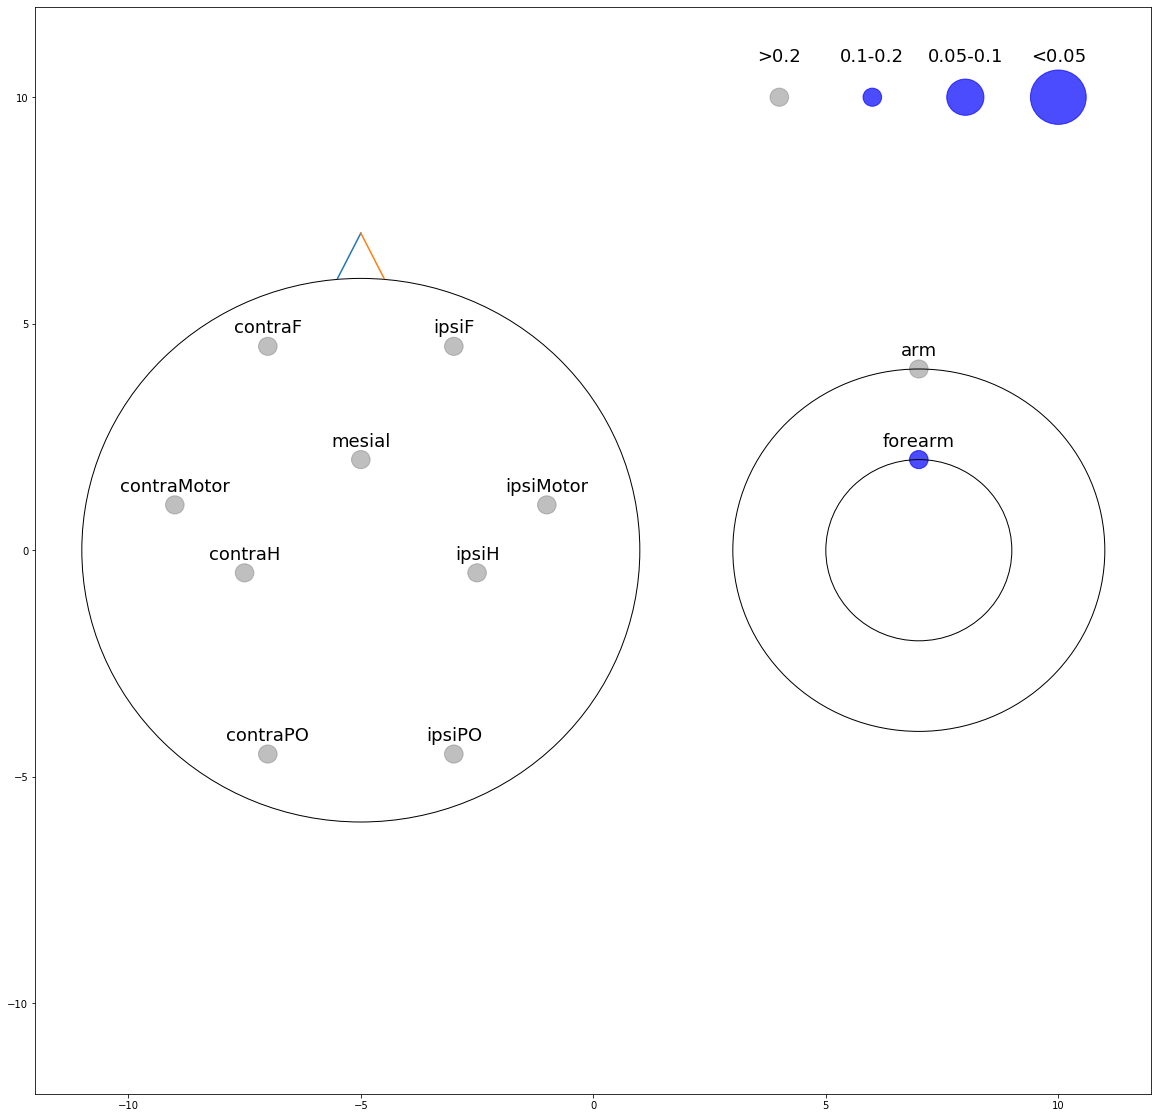

In [123]:
#visualisation - closeness
pvalue_levels = [0.2,0.1,0.05]
def radiusBasedOnP (pvalue, defaultR=0.2):
    radius = None
    for level_idx in range(len(pvalue_levels)):
        if pvalue <= pvalue_levels[level_idx]:
            if radius == None:
                radius = defaultR
            else: 
                radius += defaultR
        else:
            return radius
    return radius


fig,ax = plt.subplots(figsize=(20, 20))
ax = plt.gca()
# EEG_group
center=[-5,0]
radius=6
circle = plt.Circle((center[0],center[1]),radius,fill = False)
ax.plot([center[0]-0.5,center[0]],[radius+center[1],radius+center[1]+1])
ax.plot([center[0]+0.5,center[0]],[radius+center[1],radius+center[1]+1])
ax.add_artist(circle)
#EEG_chs

EMGs=[EMGChannel(2,90,'forearm'),EMGChannel(4,90,'arm')]

EEGs = [EEGChannel(x=-2, y=4.5, name = 'contraF'), EEGChannel(x=-4, y=1, name = 'contraMotor'), 
        EEGChannel(x=-2, y=-4.5, name = 'contraPO'), EEGChannel(x=0, y=2, name = 'mesial'),
       EEGChannel(x=2, y=4.5, name = 'ipsiF'),EEGChannel(x=4, y=1, name = 'ipsiMotor'),
       EEGChannel(x=2, y=-4.5, name = 'ipsiPO'),EEGChannel(x=2.5, y=-0.5, name = 'ipsiH'),
       EEGChannel(x=-2.5, y=-0.5, name = 'contraH')]  

for EEG in EEGs:
    radius = radiusBasedOnP(p_groupC[EEG.name+'_closenessC'])
    if radius == None:
        circle = plt.Circle((center[0]+EEG.x, center[1]+EEG.y), radius=0.2,fill = True, color = 'grey',alpha=0.5)
    else:
        circle = plt.Circle((center[0]+EEG.x, center[1]+EEG.y), radius=radius,fill = True, color = 'blue',alpha=0.7)
    ax.add_patch(circle)
    label = ax.annotate(EEG.name, xy=(center[0]+EEG.x, center[1]+EEG.y+0.3), fontsize=18, color ='black', ha="center")

#EMG
center=[7,0]
for i in range(2):
    circle = plt.Circle((center[0],center[1]), 2*(i+1),fill = False)
    ax.add_artist(circle)
#EMG_chs
for EMG in EMGs:
    radius = radiusBasedOnP(p_groupC[EMG.name+'_closenessC'])
    if radius == None:
        circle = plt.Circle((center[0]+EMG.x, center[1]+EMG.y), radius=0.2,fill = True, color = 'grey',alpha=0.5)
    else:
        circle = plt.Circle((center[0]+EMG.x, center[1]+EMG.y), radius=radius,fill = True, color = 'blue',alpha=0.7)
    ax.add_patch(circle)
    label = ax.annotate(EMG.name, xy=(center[0]+EMG.x, center[1]+EMG.y+0.3), fontsize=18, color ='black', ha="center")
    
plt.xlim(-12,12)
plt.ylim(-12,12)


circle = plt.Circle((4,10), radius=0.2,fill = True, color = 'grey',alpha=0.5)
ax.add_patch(circle)
ax.annotate('>'+str(pvalue_levels[0]), xy=(4,10.8), fontsize=18, color ='black', ha="center")
increment = 0
for pvalue_level in pvalue_levels[1:]:
    increment+=1
    circle = plt.Circle((4+increment*2,10), radius=0.2*increment,fill = True, color = 'blue',alpha=0.7)
    ax.add_patch(circle)
    ax.annotate(str(pvalue_levels[increment])+'-'+str(pvalue_levels[increment-1]),
                xy=(4+increment*2,10.8), fontsize=18, color ='black', ha="center")
    
increment+=1    
circle = plt.Circle((4+2*increment,10), radius=0.2*increment,fill = True, color = 'blue',alpha=0.7)
ax.add_patch(circle)
ax.annotate('<'+str(pvalue_levels[-1]), xy=(4+2*increment,10.8), 
            fontsize=18, color ='black', ha="center")

# save fig
# fName = os.path.join(strokeVsHealthy_results_dir,'betweenness_centrality_topo.eps')
# plt.savefig(fName)

Text(10, 10.8, '<0.05')

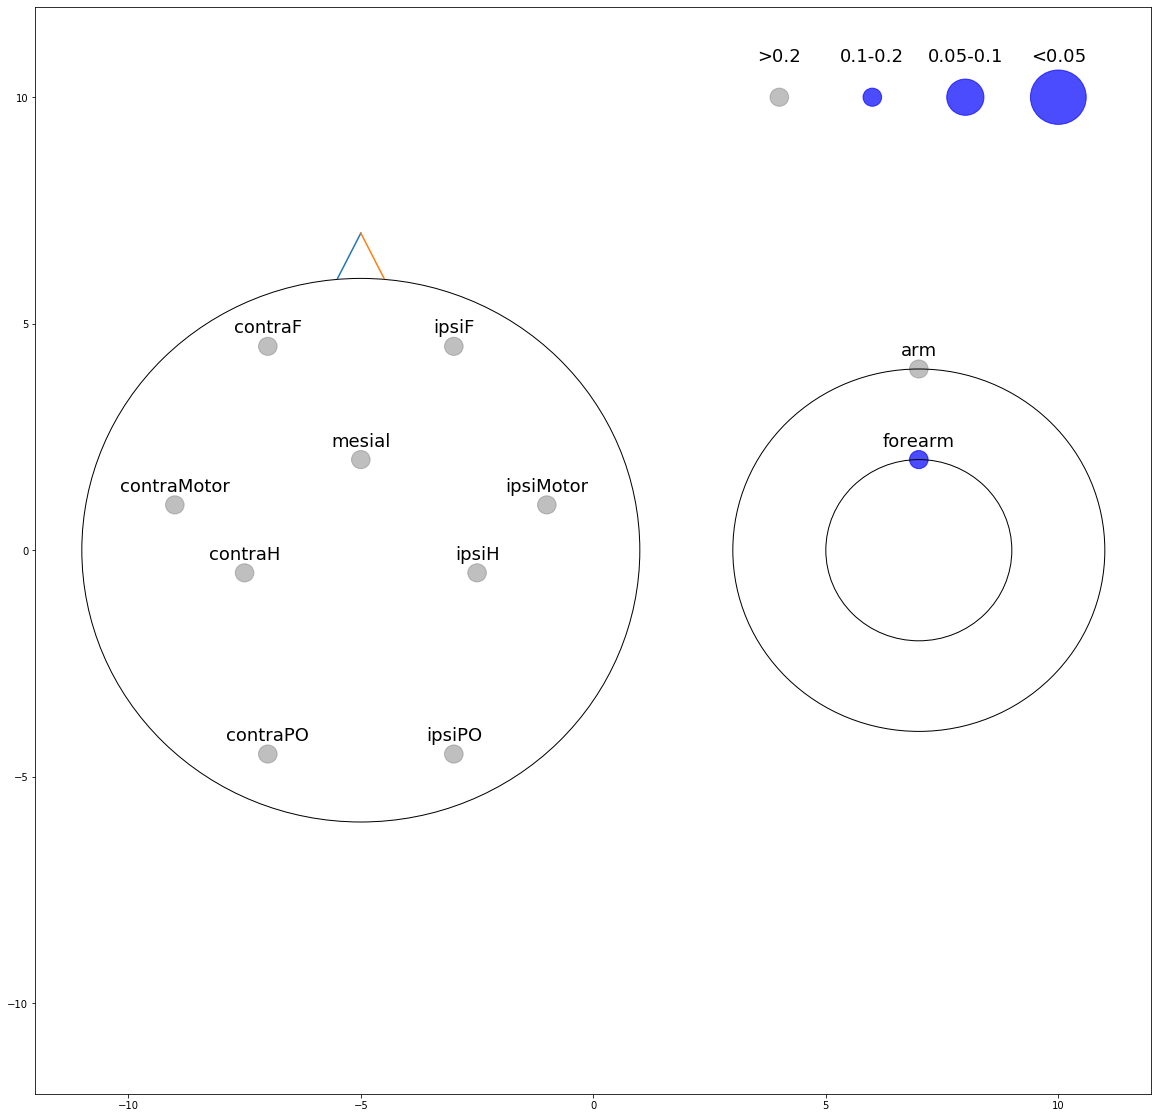

In [126]:
# cost_closeness _cost_closenessC
#visualisation - degreeC
pvalue_levels = [0.2,0.1,0.05]
def radiusBasedOnP (pvalue, defaultR=0.2):
    radius = None
    for level_idx in range(len(pvalue_levels)):
        if pvalue <= pvalue_levels[level_idx]:
            if radius == None:
                radius = defaultR
            else: 
                radius += defaultR
        else:
            return radius
    return radius


fig,ax = plt.subplots(figsize=(20, 20))
ax = plt.gca()
# EEG_group
center=[-5,0]
radius=6
circle = plt.Circle((center[0],center[1]),radius,fill = False)
ax.plot([center[0]-0.5,center[0]],[radius+center[1],radius+center[1]+1])
ax.plot([center[0]+0.5,center[0]],[radius+center[1],radius+center[1]+1])
ax.add_artist(circle)
#EEG_chs

EMGs=[EMGChannel(2,90,'forearm'),EMGChannel(4,90,'arm')]

EEGs = [EEGChannel(x=-2, y=4.5, name = 'contraF'), EEGChannel(x=-4, y=1, name = 'contraMotor'), 
        EEGChannel(x=-2, y=-4.5, name = 'contraPO'), EEGChannel(x=0, y=2, name = 'mesial'),
       EEGChannel(x=2, y=4.5, name = 'ipsiF'),EEGChannel(x=4, y=1, name = 'ipsiMotor'),
       EEGChannel(x=2, y=-4.5, name = 'ipsiPO'),EEGChannel(x=2.5, y=-0.5, name = 'ipsiH'),
       EEGChannel(x=-2.5, y=-0.5, name = 'contraH')]

for EEG in EEGs:
    radius = radiusBasedOnP(p_groupC[EEG.name+'_cost_closenessC'])
    if radius == None:
        circle = plt.Circle((center[0]+EEG.x, center[1]+EEG.y), radius=0.2,fill = True, color = 'grey',alpha=0.5)
    else:
        circle = plt.Circle((center[0]+EEG.x, center[1]+EEG.y), radius=radius,fill = True, color = 'blue',alpha=0.7)
    ax.add_patch(circle)
    label = ax.annotate(EEG.name, xy=(center[0]+EEG.x, center[1]+EEG.y+0.3), fontsize=18, color ='black', ha="center")

#EMG
center=[7,0]
for i in range(2):
    circle = plt.Circle((center[0],center[1]), 2*(i+1),fill = False)
    ax.add_artist(circle)
#EMG_chs
for EMG in EMGs:
    radius = radiusBasedOnP(p_groupC[EMG.name+'_cost_closenessC'])
    if radius == None:
        circle = plt.Circle((center[0]+EMG.x, center[1]+EMG.y), radius=0.2,fill = True, color = 'grey',alpha=0.5)
    else:
        circle = plt.Circle((center[0]+EMG.x, center[1]+EMG.y), radius=radius,fill = True, color = 'blue',alpha=0.7)
    ax.add_patch(circle)
    label = ax.annotate(EMG.name, xy=(center[0]+EMG.x, center[1]+EMG.y+0.3), fontsize=18, color ='black', ha="center")
    
plt.xlim(-12,12)
plt.ylim(-12,12)


circle = plt.Circle((4,10), radius=0.2,fill = True, color = 'grey',alpha=0.5)
ax.add_patch(circle)
ax.annotate('>'+str(pvalue_levels[0]), xy=(4,10.8), fontsize=18, color ='black', ha="center")
increment = 0
for pvalue_level in pvalue_levels[1:]:
    increment+=1
    circle = plt.Circle((4+increment*2,10), radius=0.2*increment,fill = True, color = 'blue',alpha=0.7)
    ax.add_patch(circle)
    ax.annotate(str(pvalue_levels[increment])+'-'+str(pvalue_levels[increment-1]),
                xy=(4+increment*2,10.8), fontsize=18, color ='black', ha="center")
    
increment+=1    
circle = plt.Circle((4+2*increment,10), radius=0.2*increment,fill = True, color = 'blue',alpha=0.7)
ax.add_patch(circle)
ax.annotate('<'+str(pvalue_levels[-1]), xy=(4+2*increment,10.8), 
            fontsize=18, color ='black', ha="center")

# save fig
# fName = os.path.join(strokeVsHealthy_results_dir,'betweenness_centrality_topo.eps')
# plt.savefig(fName)

In [287]:
# local_efficiency
print(scipy.stats.ttest_ind((df_betweenGroup[df_betweenGroup['group']=='stroke'])['local_efficiency'],
                      (df_betweenGroup[df_betweenGroup['group']=='healthy'])['local_efficiency'], equal_var=False))
print("cohen's d = {}".format(cohend((df_betweenGroup[df_betweenGroup['group']=='stroke'])['local_efficiency'],
             (df_betweenGroup[df_betweenGroup['group']=='healthy'])['local_efficiency'])))

Ttest_indResult(statistic=1.3640969289495475, pvalue=0.20968437157251285)
cohen's d = 0.7977316074701667


In [288]:
# global_efficiency
print(scipy.stats.ttest_ind((df_betweenGroup[df_betweenGroup['group']=='stroke'])['global_efficiency'],
                      (df_betweenGroup[df_betweenGroup['group']=='healthy'])['global_efficiency'], equal_var=False))
print("cohen's d = {}".format(cohend((df_betweenGroup[df_betweenGroup['group']=='stroke'])['global_efficiency'],
             (df_betweenGroup[df_betweenGroup['group']=='healthy'])['global_efficiency'])))

Ttest_indResult(statistic=1.5738876758129696, pvalue=0.15447807662981952)
cohen's d = 0.9395572726791508


In [289]:
# non_randomness
print(scipy.stats.ttest_ind((df_betweenGroup[df_betweenGroup['group']=='stroke'])['non_randomness'],
                      (df_betweenGroup[df_betweenGroup['group']=='healthy'])['non_randomness'], equal_var=False))
print("cohen's d = {}".format(cohend((df_betweenGroup[df_betweenGroup['group']=='stroke'])['non_randomness'],
             (df_betweenGroup[df_betweenGroup['group']=='healthy'])['non_randomness'])))

Ttest_indResult(statistic=-0.7175429861746623, pvalue=0.49490520290558226)
cohen's d = -0.4440097001176235


In [290]:
# relative_nonRandomness
print(scipy.stats.ttest_ind((df_betweenGroup[df_betweenGroup['group']=='stroke'])['relative_nonRandomness'],
                      (df_betweenGroup[df_betweenGroup['group']=='healthy'])['relative_nonRandomness'], equal_var=False))
print("cohen's d = {}".format(cohend((df_betweenGroup[df_betweenGroup['group']=='stroke'])['relative_nonRandomness'],
             (df_betweenGroup[df_betweenGroup['group']=='healthy'])['relative_nonRandomness'])))

Ttest_indResult(statistic=-0.5285958116671068, pvalue=0.6119305467022677)
cohen's d = -0.3216550209798378


In [291]:
# average_shortestPathLength_weight
print(scipy.stats.ttest_ind((df_betweenGroup[df_betweenGroup['group']=='stroke'])['average_shortestPathLength_weight'],
                      (df_betweenGroup[df_betweenGroup['group']=='healthy'])['average_shortestPathLength_weight'], equal_var=False))
print("cohen's d = {}".format(cohend((df_betweenGroup[df_betweenGroup['group']=='stroke'])['average_shortestPathLength_weight'],
             (df_betweenGroup[df_betweenGroup['group']=='healthy'])['average_shortestPathLength_weight'])))

Ttest_indResult(statistic=-1.422033736209974, pvalue=0.2065176614939485)
cohen's d = -0.9512438952672965


In [292]:
# s_metric
print(scipy.stats.ttest_ind((df_betweenGroup[df_betweenGroup['group']=='stroke'])['s_metric'],
                      (df_betweenGroup[df_betweenGroup['group']=='healthy'])['s_metric'], equal_var=False))
print("cohen's d = {}".format(cohend((df_betweenGroup[df_betweenGroup['group']=='stroke'])['s_metric'],
             (df_betweenGroup[df_betweenGroup['group']=='healthy'])['s_metric'])))

Ttest_indResult(statistic=1.2238692766698744, pvalue=0.25930554125012106)
cohen's d = 0.7657133282659881


In [293]:
# size_weight
print(scipy.stats.ttest_ind((df_betweenGroup[df_betweenGroup['group']=='stroke'])['size_weight'],
                      (df_betweenGroup[df_betweenGroup['group']=='healthy'])['size_weight'], equal_var=False))
print("cohen's d = {}".format(cohend((df_betweenGroup[df_betweenGroup['group']=='stroke'])['size_weight'],
             (df_betweenGroup[df_betweenGroup['group']=='healthy'])['size_weight'])))

Ttest_indResult(statistic=-0.679213637457819, pvalue=0.5165026198467078)
cohen's d = -0.40880927694943986


In [294]:
# wiener_idx_minST_weight
print(scipy.stats.ttest_ind((df_betweenGroup[df_betweenGroup['group']=='stroke'])['wiener_idx_minST_weight'],
                      (df_betweenGroup[df_betweenGroup['group']=='healthy'])['wiener_idx_minST_weight'], equal_var=False))
print("cohen's d = {}".format(cohend((df_betweenGroup[df_betweenGroup['group']=='stroke'])['wiener_idx_minST_weight'],
             (df_betweenGroup[df_betweenGroup['group']=='healthy'])['wiener_idx_minST_weight'])))

Ttest_indResult(statistic=-0.669407688093674, pvalue=0.5223272963355103)
cohen's d = -0.40146431409941524


In [295]:
# wiener_idx_maxST_weight
print(scipy.stats.ttest_ind((df_betweenGroup[df_betweenGroup['group']=='stroke'])['wiener_idx_maxST_weight'],
                      (df_betweenGroup[df_betweenGroup['group']=='healthy'])['wiener_idx_maxST_weight'], equal_var=False))
print("cohen's d = {}".format(cohend((df_betweenGroup[df_betweenGroup['group']=='stroke'])['wiener_idx_maxST_weight'],
             (df_betweenGroup[df_betweenGroup['group']=='healthy'])['wiener_idx_maxST_weight'])))

Ttest_indResult(statistic=-0.4729174253396852, pvalue=0.6489929455387293)
cohen's d = -0.28187187353303467


In [296]:
# size_minST_weight
print(scipy.stats.ttest_ind((df_betweenGroup[df_betweenGroup['group']=='stroke'])['size_minST_weight'],
                      (df_betweenGroup[df_betweenGroup['group']=='healthy'])['size_minST_weight'], equal_var=False))
print("cohen's d = {}".format(cohend((df_betweenGroup[df_betweenGroup['group']=='stroke'])['size_minST_weight'],
             (df_betweenGroup[df_betweenGroup['group']=='healthy'])['size_minST_weight'])))

Ttest_indResult(statistic=-1.5270307159369187, pvalue=0.18070967655381973)
cohen's d = -1.0291100765907952


In [297]:
# size_maxST_weight
print(scipy.stats.ttest_ind((df_betweenGroup[df_betweenGroup['group']=='stroke'])['size_maxST_weight'],
                      (df_betweenGroup[df_betweenGroup['group']=='healthy'])['size_maxST_weight'], equal_var=False))
print("cohen's d = {}".format(cohend((df_betweenGroup[df_betweenGroup['group']=='stroke'])['size_maxST_weight'],
             (df_betweenGroup[df_betweenGroup['group']=='healthy'])['size_maxST_weight'])))

Ttest_indResult(statistic=-0.7072476846817942, pvalue=0.5026684653728573)
cohen's d = -0.4503761682044892


In [298]:
# cost_average_shortestP_length
print(scipy.stats.ttest_ind((df_betweenGroup[df_betweenGroup['group']=='stroke'])['cost_average_shortestP_length'],
                      (df_betweenGroup[df_betweenGroup['group']=='healthy'])['cost_average_shortestP_length'], equal_var=False))
print("cohen's d = {}".format(cohend((df_betweenGroup[df_betweenGroup['group']=='stroke'])['cost_average_shortestP_length'],
             (df_betweenGroup[df_betweenGroup['group']=='healthy'])['cost_average_shortestP_length'])))

Ttest_indResult(statistic=-1.6291927862629978, pvalue=0.14192222474732727)
cohen's d = -0.956774926273166


In [299]:
# cost_average_shortestP_length_weight
print(scipy.stats.ttest_ind((df_betweenGroup[df_betweenGroup['group']=='stroke'])['cost_average_shortestP_length_weight'],
                      (df_betweenGroup[df_betweenGroup['group']=='healthy'])['cost_average_shortestP_length_weight'], equal_var=False))
print("cohen's d = {}".format(cohend((df_betweenGroup[df_betweenGroup['group']=='stroke'])['cost_average_shortestP_length_weight'],
             (df_betweenGroup[df_betweenGroup['group']=='healthy'])['cost_average_shortestP_length_weight'])))

Ttest_indResult(statistic=-1.751415233563312, pvalue=0.13187019501132505)
cohen's d = -1.169734157481901


In [300]:
# Fp1i_eigenvector_centrality
print(scipy.stats.ttest_ind((df_betweenGroup[df_betweenGroup['group']=='stroke'])['Fp1i_eigenvector_centrality'],
                      (df_betweenGroup[df_betweenGroup['group']=='healthy'])['Fp1i_eigenvector_centrality'], equal_var=False))
print("cohen's d = {}".format(cohend((df_betweenGroup[df_betweenGroup['group']=='stroke'])['Fp1i_eigenvector_centrality'],
             (df_betweenGroup[df_betweenGroup['group']=='healthy'])['Fp1i_eigenvector_centrality'])))

Ttest_indResult(statistic=0.5534537697992025, pvalue=0.5989492718202176)
cohen's d = 0.36131338322423706


In [301]:
# AF3i_eigenvector_centrality
print(scipy.stats.ttest_ind((df_betweenGroup[df_betweenGroup['group']=='stroke'])['AF3i_eigenvector_centrality'],
                      (df_betweenGroup[df_betweenGroup['group']=='healthy'])['AF3i_eigenvector_centrality'], equal_var=False))
print("cohen's d = {}".format(cohend((df_betweenGroup[df_betweenGroup['group']=='stroke'])['AF3i_eigenvector_centrality'],
             (df_betweenGroup[df_betweenGroup['group']=='healthy'])['AF3i_eigenvector_centrality'])))

Ttest_indResult(statistic=-2.168962419951101, pvalue=0.062107189208364944)
cohen's d = -1.2547613489980731


In [343]:
# F3i_eigenvector_centrality
print(scipy.stats.ttest_ind((df_betweenGroup[df_betweenGroup['group']=='stroke'])['F3i_eigenvector_centrality'],
                      (df_betweenGroup[df_betweenGroup['group']=='healthy'])['F3i_eigenvector_centrality'], equal_var=False))
print("cohen's d = {}".format(cohend((df_betweenGroup[df_betweenGroup['group']=='stroke'])['F3i_eigenvector_centrality'],
             (df_betweenGroup[df_betweenGroup['group']=='healthy'])['F3i_eigenvector_centrality'])))

Ttest_indResult(statistic=-0.3879518482043025, pvalue=0.7090630726960576)
cohen's d = -0.2415861070531125


In [344]:
# F7i_eigenvector_centrality
print(scipy.stats.ttest_ind((df_betweenGroup[df_betweenGroup['group']=='stroke'])['F7i_eigenvector_centrality'],
                      (df_betweenGroup[df_betweenGroup['group']=='healthy'])['F7i_eigenvector_centrality'], equal_var=False))
print("cohen's d = {}".format(cohend((df_betweenGroup[df_betweenGroup['group']=='stroke'])['F7i_eigenvector_centrality'],
             (df_betweenGroup[df_betweenGroup['group']=='healthy'])['F7i_eigenvector_centrality'])))

Ttest_indResult(statistic=0.5755427576222193, pvalue=0.5957176661920816)
cohen's d = 0.4268222752924175


In [345]:
# FC1i_eigenvector_centrality
print(scipy.stats.ttest_ind((df_betweenGroup[df_betweenGroup['group']=='stroke'])['FC1i_eigenvector_centrality'],
                      (df_betweenGroup[df_betweenGroup['group']=='healthy'])['FC1i_eigenvector_centrality'], equal_var=False))
print("cohen's d = {}".format(cohend((df_betweenGroup[df_betweenGroup['group']=='stroke'])['FC1i_eigenvector_centrality'],
             (df_betweenGroup[df_betweenGroup['group']=='healthy'])['FC1i_eigenvector_centrality'])))

Ttest_indResult(statistic=-0.27153765789645373, pvalue=0.7931355710165373)
cohen's d = -0.15349399661711938


In [346]:
# FC5i_eigenvector_centrality
print(scipy.stats.ttest_ind((df_betweenGroup[df_betweenGroup['group']=='stroke'])['FC5i_eigenvector_centrality'],
                      (df_betweenGroup[df_betweenGroup['group']=='healthy'])['FC5i_eigenvector_centrality'], equal_var=False))
print("cohen's d = {}".format(cohend((df_betweenGroup[df_betweenGroup['group']=='stroke'])['FC5i_eigenvector_centrality'],
             (df_betweenGroup[df_betweenGroup['group']=='healthy'])['FC5i_eigenvector_centrality'])))

Ttest_indResult(statistic=-1.120761115570109, pvalue=0.3060175258508595)
cohen's d = -0.7465731158936051


In [347]:
# C3i_eigenvector_centrality
print(scipy.stats.ttest_ind((df_betweenGroup[df_betweenGroup['group']=='stroke'])['C3i_eigenvector_centrality'],
                      (df_betweenGroup[df_betweenGroup['group']=='healthy'])['C3i_eigenvector_centrality'], equal_var=False))
print("cohen's d = {}".format(cohend((df_betweenGroup[df_betweenGroup['group']=='stroke'])['C3i_eigenvector_centrality'],
             (df_betweenGroup[df_betweenGroup['group']=='healthy'])['C3i_eigenvector_centrality'])))

Ttest_indResult(statistic=-0.34794068121138455, pvalue=0.7418955065641335)
cohen's d = -0.24150355230083426


In [355]:
# T7i_eigenvector_centrality
t_stat,pvalue = scipy.stats.ttest_ind((df_betweenGroup[df_betweenGroup['group']=='stroke'])['T7i_eigenvector_centrality'],
                      (df_betweenGroup[df_betweenGroup['group']=='healthy'])['T7i_eigenvector_centrality'], equal_var=False)
print("pvalue = {}, t_stat = {}".format(round(pvalue,2),round(t_stat,2)))
print("cohen's d = {}".format(round(cohend((df_betweenGroup[df_betweenGroup['group']=='stroke'])['T7i_eigenvector_centrality'],
             (df_betweenGroup[df_betweenGroup['group']=='healthy'])['T7i_eigenvector_centrality']),2)))

pvalue = 0.83, t_stat = 0.22
cohen's d = 0.13


In [356]:
# CP1i_eigenvector_centrality
t_stat,pvalue = scipy.stats.ttest_ind((df_betweenGroup[df_betweenGroup['group']=='stroke'])['CP1i_eigenvector_centrality'],
                      (df_betweenGroup[df_betweenGroup['group']=='healthy'])['CP1i_eigenvector_centrality'], equal_var=False)
print("pvalue = {}, t_stat = {}".format(round(pvalue,2),round(t_stat,2)))
print("cohen's d = {}".format(round(cohend((df_betweenGroup[df_betweenGroup['group']=='stroke'])['CP1i_eigenvector_centrality'],
             (df_betweenGroup[df_betweenGroup['group']=='healthy'])['CP1i_eigenvector_centrality']),2)))

pvalue = 0.85, t_stat = -0.19
cohen's d = -0.1


In [358]:
# CP5i_eigenvector_centrality
t_stat,pvalue = scipy.stats.ttest_ind((df_betweenGroup[df_betweenGroup['group']=='stroke'])['CP5i_eigenvector_centrality'],
                      (df_betweenGroup[df_betweenGroup['group']=='healthy'])['CP5i_eigenvector_centrality'], equal_var=False)
print("pvalue = {}, t_stat = {}".format(round(pvalue,2),round(t_stat,2)))
print("cohen's d = {}".format(round(cohend((df_betweenGroup[df_betweenGroup['group']=='stroke'])['CP5i_eigenvector_centrality'],
             (df_betweenGroup[df_betweenGroup['group']=='healthy'])['CP5i_eigenvector_centrality']),2)))

pvalue = 0.81, t_stat = -0.25
cohen's d = -0.15


In [357]:
# P3i_eigenvector_centrality
t_stat,pvalue = scipy.stats.ttest_ind((df_betweenGroup[df_betweenGroup['group']=='stroke'])['P3i_eigenvector_centrality'],
                      (df_betweenGroup[df_betweenGroup['group']=='healthy'])['P3i_eigenvector_centrality'], equal_var=False)
print("pvalue = {}, t_stat = {}".format(round(pvalue,2),round(t_stat,2)))
print("cohen's d = {}".format(round(cohend((df_betweenGroup[df_betweenGroup['group']=='stroke'])['P3i_eigenvector_centrality'],
             (df_betweenGroup[df_betweenGroup['group']=='healthy'])['P3i_eigenvector_centrality']),2)))

pvalue = 0.17, t_stat = -1.54
cohen's d = -0.83


In [359]:
list_gProperties = ['P3i_eigenvector_centrality']
for gProperty in list_gProperties:    
    t_stat,pvalue = scipy.stats.ttest_ind((df_betweenGroup[df_betweenGroup['group']=='stroke'])[gProperty],
                          (df_betweenGroup[df_betweenGroup['group']=='healthy'])[gProperty], equal_var=False)
    cohen_s_d = round(cohend((df_betweenGroup[df_betweenGroup['group']=='stroke'])[gProperty],
                 (df_betweenGroup[df_betweenGroup['group']=='healthy'])[gProperty]),2)
    print(gProperty + ": pvalue = {}, cohen's d = {}, t_stat = {}".format(round(pvalue,2),cohen_s_d,round(t_stat,2)))
    

P3i_eigenvector_centrality: pvalue = 0.17, cohen's d = -0.83, t_stat = -1.54


In [265]:
# C3c cost-closeness
print(scipy.stats.ttest_ind((df_betweenGroup[df_betweenGroup['group']=='stroke'])['C3c_cost_closeness_centrality'],
                      (df_betweenGroup[df_betweenGroup['group']=='healthy'])['C3c_cost_closeness_centrality'],equal_var=False))
print("cohen's d = {}".format(cohend((df_betweenGroup[df_betweenGroup['group']=='stroke'])['C3c_cost_closeness_centrality'],
             (df_betweenGroup[df_betweenGroup['group']=='healthy'])['C3c_cost_closeness_centrality'])))

Ttest_indResult(statistic=-0.3210657507277701, pvalue=0.7583702497450862)
cohen's d = -0.20881539034158528


In [266]:
# C3i cost-closeness
print(scipy.stats.ttest_ind((df_betweenGroup[df_betweenGroup['group']=='stroke'])['C3i_cost_closeness_centrality'],
                      (df_betweenGroup[df_betweenGroup['group']=='healthy'])['C3i_cost_closeness_centrality'],equal_var=False))
print("cohen's d = {}".format(cohend((df_betweenGroup[df_betweenGroup['group']=='stroke'])['C3i_cost_closeness_centrality'],
             (df_betweenGroup[df_betweenGroup['group']=='healthy'])['C3i_cost_closeness_centrality'])))

Ttest_indResult(statistic=0.32208092528268745, pvalue=0.7644183440948346)
cohen's d = 0.24313821829339913


In [267]:
# contraMotor_betweennessC
print(scipy.stats.ttest_ind((df_betweenGroup[df_betweenGroup['group']=='stroke'])['contraMotor_betweennessC'],
                      (df_betweenGroup[df_betweenGroup['group']=='healthy'])['contraMotor_betweennessC'],equal_var=False))
print("cohen's d = {}".format(cohend((df_betweenGroup[df_betweenGroup['group']=='stroke'])['contraMotor_betweennessC'],
             (df_betweenGroup[df_betweenGroup['group']=='healthy'])['contraMotor_betweennessC'])))

Ttest_indResult(statistic=1.419904585617662, pvalue=0.21175559430271237)
cohen's d = 0.9735126790014161


In [268]:
# ipsiMotor_betweennessC
print(scipy.stats.ttest_ind((df_betweenGroup[df_betweenGroup['group']=='stroke'])['ipsiMotor_betweennessC'],
                      (df_betweenGroup[df_betweenGroup['group']=='healthy'])['ipsiMotor_betweennessC'],equal_var=False))
print("cohen's d = {}".format(cohend((df_betweenGroup[df_betweenGroup['group']=='stroke'])['ipsiMotor_betweennessC'],
             (df_betweenGroup[df_betweenGroup['group']=='healthy'])['ipsiMotor_betweennessC'])))

Ttest_indResult(statistic=0.42451416841889805, pvalue=0.6847553085015234)
cohen's d = 0.27420210322379707


## step 3: visualization
### step 3-1: topology of betweenness centrality

stroke v.s. healthy: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.295e-02 U_stat=4.200e+01


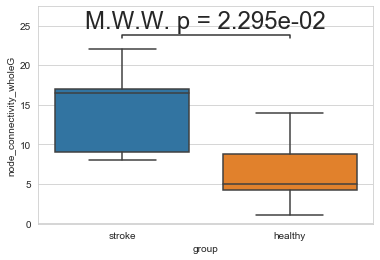

In [160]:
#transitivity
sns.set_style('whitegrid')
order = ['stroke', 'healthy']
ax = sns.boxplot(x='group',y='node_connectivity_wholeG',order=order,data = df_betweenGroup)
ax,test_results = add_stat_annotation(ax,data=df_betweenGroup, x='group', y='node_connectivity_wholeG', 
                                      box_pairs=[('stroke','healthy')],
                            test='Mann-Whitney',text_format='full',fontsize=24,verbose=1)

stroke v.s. healthy: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.658e-01 U_stat=5.000e+00


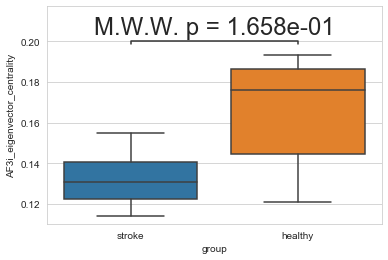

In [303]:
#AF3i_eigenvector_centrality
sns.set_style('whitegrid')
order = ['stroke', 'healthy']
ax = sns.boxplot(x='group',y='AF3i_eigenvector_centrality',order=order,data = df_betweenGroup)
ax,test_results = add_stat_annotation(ax,data=df_betweenGroup, x='group', y='AF3i_eigenvector_centrality', 
                                      box_pairs=[('stroke','healthy')],
                            test='Mann-Whitney',text_format='full',fontsize=24,verbose=1)
fName = os.path.join(strokeVsHealthy_results_dir,'AF3i_eigenvector_centrality_bp.eps')
plt.savefig(fName)

stroke v.s. healthy: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.410e-01 U_stat=6.000e+00


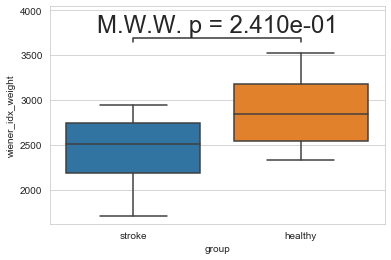

In [271]:
# wiener_idx_weight - interesting
sns.set_style('whitegrid')
order = ['stroke', 'healthy']
ax = sns.boxplot(x='group',y='wiener_idx_weight',order=order,data = df_betweenGroup)
ax,test_results = add_stat_annotation(ax,data=df_betweenGroup, x='group', y='wiener_idx_weight',
                                      box_pairs=[('stroke','healthy')],
                            test='Mann-Whitney',text_format='full',fontsize=24,verbose=1)

stroke v.s. healthy: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.374e-01 U_stat=7.000e+00


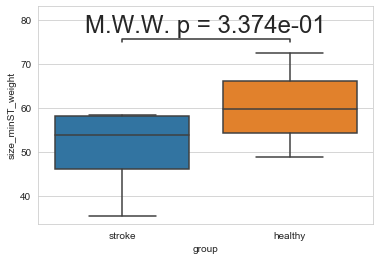

In [275]:
# size_minST_weight
sns.set_style('whitegrid')
order = ['stroke', 'healthy']
ax = sns.boxplot(x='group',y='size_minST_weight',order=order,data = df_betweenGroup)
ax,test_results = add_stat_annotation(ax,data=df_betweenGroup, x='group', y='size_minST_weight', 
                                      box_pairs=[('stroke','healthy')],
                            test='Mann-Whitney',text_format='full',fontsize=24,verbose=1)

stroke v.s. healthy: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.921e-01 U_stat=4.500e+00


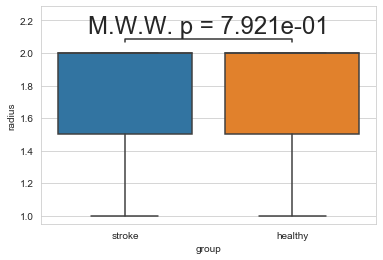

In [85]:
# radius
sns.set_style('whitegrid')
order = ['stroke', 'healthy']
ax = sns.boxplot(x='group',y='radius',order=order,data = df_betweenGroup)
ax,test_results = add_stat_annotation(ax,data=df_betweenGroup, x='group', y='radius', box_pairs=[('stroke','healthy')],
                            test='Mann-Whitney',text_format='full',fontsize=24,verbose=1)

stroke v.s. healthy: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.416e-01 U_stat=6.000e+00


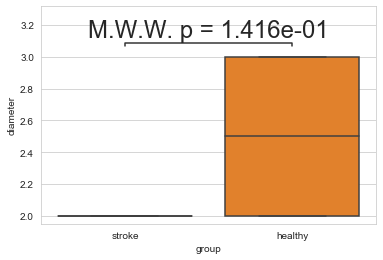

In [274]:
# diameter
fName = os.path.join(strokeVsHealthy_results_dir,'diameter_bp.eps')
sns.set_style('whitegrid')
order = ['stroke', 'healthy']
ax = sns.boxplot(x='group',y='diameter',order=order,data = df_betweenGroup)
ax,test_results = add_stat_annotation(ax,data=df_betweenGroup, x='group', y='diameter', box_pairs=[('stroke','healthy')],
                            test='Mann-Whitney',text_format='full',fontsize=24,verbose=1)
# ax.savefig(fName)
plt.savefig(fName)

stroke v.s. healthy: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.625e-01 U_stat=6.000e+00


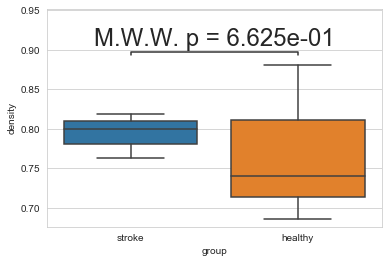

In [86]:
# density
sns.set_style('whitegrid')
order = ['stroke', 'healthy']
ax = sns.boxplot(x='group',y='density',order=order,data = df_betweenGroup)
ax,test_results = add_stat_annotation(ax,data=df_betweenGroup, x='group', y='density', box_pairs=[('stroke','healthy')],
                            test='Mann-Whitney',text_format='full',fontsize=24,verbose=1)

stroke v.s. healthy: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.625e-01 U_stat=6.000e+00


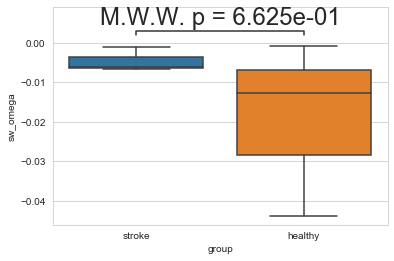

In [87]:
# sw_omega
sns.set_style('whitegrid')
order = ['stroke', 'healthy']
ax = sns.boxplot(x='group',y='sw_omega',order=order,data = df_betweenGroup)
ax,test_results = add_stat_annotation(ax,data=df_betweenGroup, x='group', y='sw_omega', box_pairs=[('stroke','healthy')],
                            test='Mann-Whitney',text_format='full',fontsize=24,verbose=1)

stroke v.s. healthy: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.381e-01 U_stat=1.800e+01


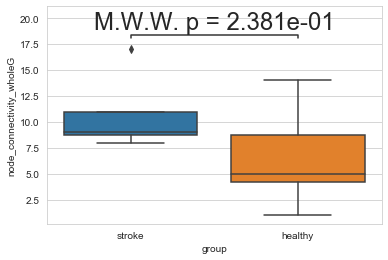

In [281]:

# node_connectivity_wholeG
sns.set_style('whitegrid')
order = ['stroke', 'healthy']
ax = sns.boxplot(x='group',y='node_connectivity_wholeG',order=order,data = df_betweenGroup)
ax,test_results = add_stat_annotation(ax,data=df_betweenGroup, x='group', y='node_connectivity_wholeG', box_pairs=[('stroke','healthy')],
                            test='Mann-Whitney',text_format='full',fontsize=24,verbose=1)

stroke v.s. healthy: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.904e-01 U_stat=8.000e+00


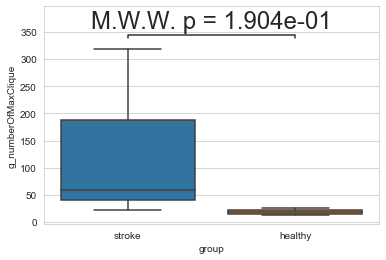

In [89]:
#g_numberOfMaxClique
sns.set_style('whitegrid')
order = ['stroke', 'healthy']
ax = sns.boxplot(x='group',y='g_numberOfMaxClique',order=order,data = df_betweenGroup)
ax,test_results = add_stat_annotation(ax,data=df_betweenGroup, x='group', y='g_numberOfMaxClique', 
                                      box_pairs=[('stroke','healthy')],
                            test='Mann-Whitney',text_format='full',fontsize=24,verbose=1)

stroke v.s. healthy: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.625e-01 U_stat=3.000e+00


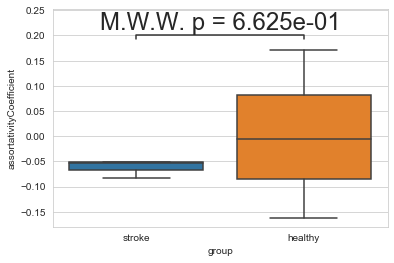

In [96]:
# assortativityCoefficient
sns.set_style('whitegrid')
order = ['stroke', 'healthy']
ax = sns.boxplot(x='group',y='assortativityCoefficient',order=order,data = df_betweenGroup)
ax,test_results = add_stat_annotation(ax,data=df_betweenGroup, x='group', y='assortativityCoefficient', 
                                      box_pairs=[('stroke','healthy')],
                            test='Mann-Whitney',text_format='full',fontsize=24,verbose=1)

stroke v.s. healthy: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.625e-01 U_stat=6.000e+00


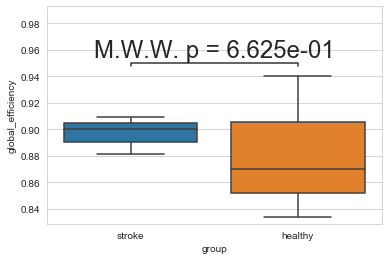

In [97]:
# global_efficiency
sns.set_style('whitegrid')
order = ['stroke', 'healthy']
ax = sns.boxplot(x='group',y='global_efficiency',order=order,data = df_betweenGroup)
ax,test_results = add_stat_annotation(ax,data=df_betweenGroup, x='group', y='global_efficiency', 
                                      box_pairs=[('stroke','healthy')],
                            test='Mann-Whitney',text_format='full',fontsize=24,verbose=1)

stroke v.s. healthy: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=5.000e+00


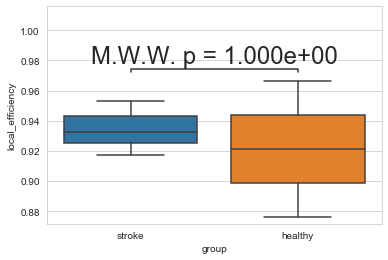

In [98]:
# local_efficiency
sns.set_style('whitegrid')
order = ['stroke', 'healthy']
ax = sns.boxplot(x='group',y='local_efficiency',order=order,data = df_betweenGroup)
ax,test_results = add_stat_annotation(ax,data=df_betweenGroup, x='group', y='local_efficiency', 
                                      box_pairs=[('stroke','healthy')],
                            test='Mann-Whitney',text_format='full',fontsize=24,verbose=1)

stroke v.s. healthy: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.625e-01 U_stat=3.000e+00


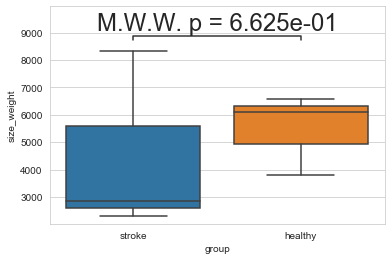

In [101]:
# size_weight
sns.set_style('whitegrid')
order = ['stroke', 'healthy']
ax = sns.boxplot(x='group',y='size_weight',order=order,data = df_betweenGroup)
ax,test_results = add_stat_annotation(ax,data=df_betweenGroup, x='group', y='size_weight', 
                                      box_pairs=[('stroke','healthy')],
                            test='Mann-Whitney',text_format='full',fontsize=24,verbose=1)

stroke v.s. healthy: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.625e-01 U_stat=3.000e+00


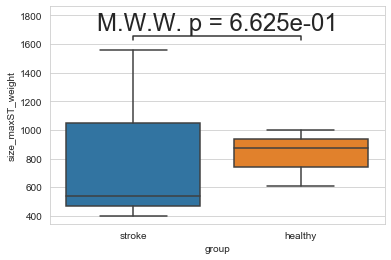

In [103]:
# size_maxST_weight
sns.set_style('whitegrid')
order = ['stroke', 'healthy']
ax = sns.boxplot(x='group',y='size_maxST_weight',order=order,data = df_betweenGroup)
ax,test_results = add_stat_annotation(ax,data=df_betweenGroup, x='group', y='size_maxST_weight', 
                                      box_pairs=[('stroke','healthy')],
                            test='Mann-Whitney',text_format='full',fontsize=24,verbose=1)

# Correlative analysis
## step 1: stroke FMA-properties

In [164]:
# linear model

import statsmodels.api as sm
X = df_stroke[['node_connectivity_wholeG']]
Y = df_stroke['FMA']
X=sm.add_constant(X)
model = sm.OLS(Y,X).fit()
predictions = model.predict(X)
model.summary()

d:\software\1python3.75amd64\envs\eegemg\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FMA   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     4.527
Date:                Sat, 02 Jan 2021   Prob (F-statistic):             0.0775
Time:                        14:05:57   Log-Likelihood:                -27.792
No. Observations:                   8   AIC:                             59.58
Df Residuals:                       6   BIC:                             59.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       23.6915     10.174      2.329      0.059      -1.204      48.587
node_connectivity_wholeG     1.4302      0.672      2.128      0.077      -0.215       3.075
==============================================================================
Omnibus:                        0.545   Durbin-Watson:                   1.611
Prob(Omnibus):                  0.761   Jarque-Bera (JB):                0.040
Skew:                          -0.112   Prob(JB):                        0.980
Kurtosis:                       2.734   Cond. No.                         48.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

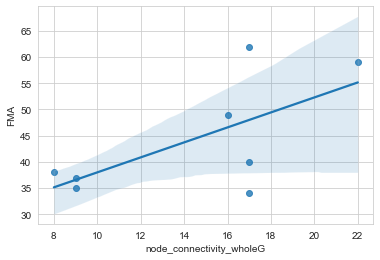

In [163]:
import seaborn as sns
ax = sns.regplot(x=X, y=Y)

In [109]:
# linear model

import statsmodels.api as sm
X = df_stroke[['FC1i_ecc_weight','P3i_ecc_weight']].to_numpy()
Y = df_stroke['FMA']
X=sm.add_constant(X)
model = sm.OLS(Y,X).fit()
predictions = model.predict(X)
model.summary()

d:\software\1python3.75amd64\envs\eegemg\lib\site-packages\statsmodels\stats\stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FMA   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     51.01
Date:                Wed, 16 Dec 2020   Prob (F-statistic):             0.0985
Time:                        11:00:44   Log-Likelihood:                 1.7614
No. Observations:                   4   AIC:                             2.477
Df Residuals:                       1   BIC:                            0.6360
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.2673      0.743     56.923      0.011      32.833      51.702
x1             3.9138      0.526      7.443      0.085      -2.768      10.595
x2            -4.9439      0.556     -8.885      0.071     -12.014       2.126
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.656
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.575
Skew:                           0.823   Prob(JB):                        0.750
Kurtosis:                       2.138   Cond. No.                         41.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
predictions

array([38.16088489, 36.74324314, 35.02965918, 34.06621279])

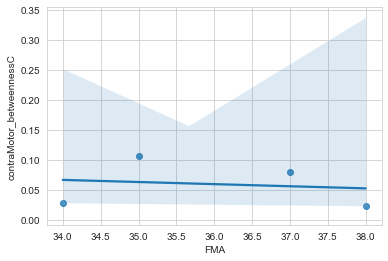

In [306]:
import seaborn as sns
ax = sns.regplot(x="FMA", y="contraMotor_betweennessC", data=df_stroke)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


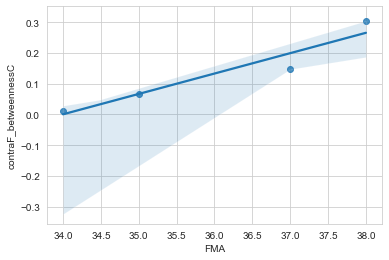

In [308]:
import seaborn as sns
ax = sns.regplot(x="FMA", y="contraF_betweennessC", data=df_stroke)
fName = os.path.join(strokeVsHealthy_results_dir,'FMA_contraF_betweennessC_reg.eps')
plt.savefig(fName)

## ANOVA for lesion site (independent variables, groups) and properties